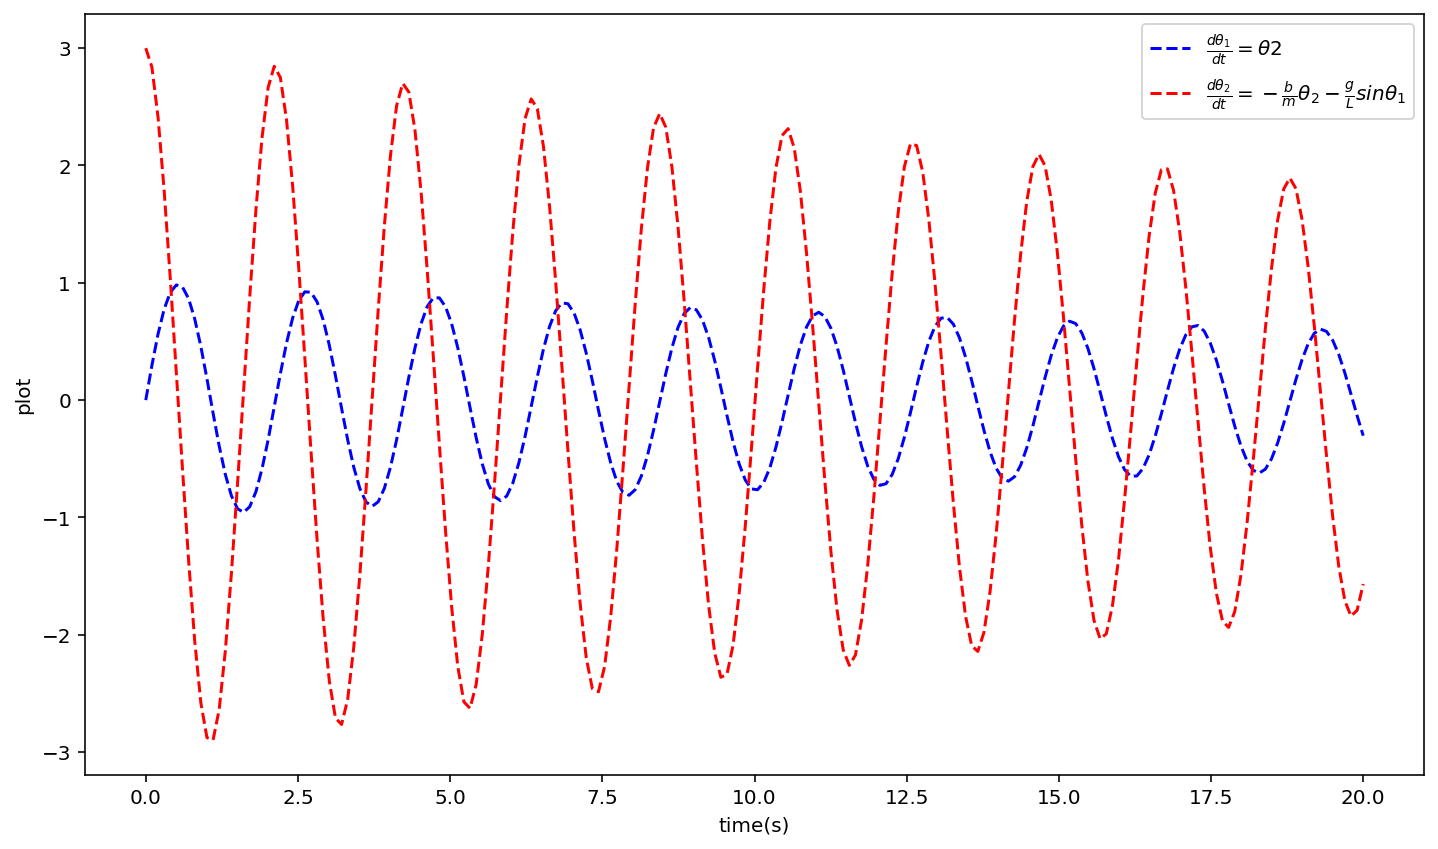

/ext/anaconda2020.02/lib/python3.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


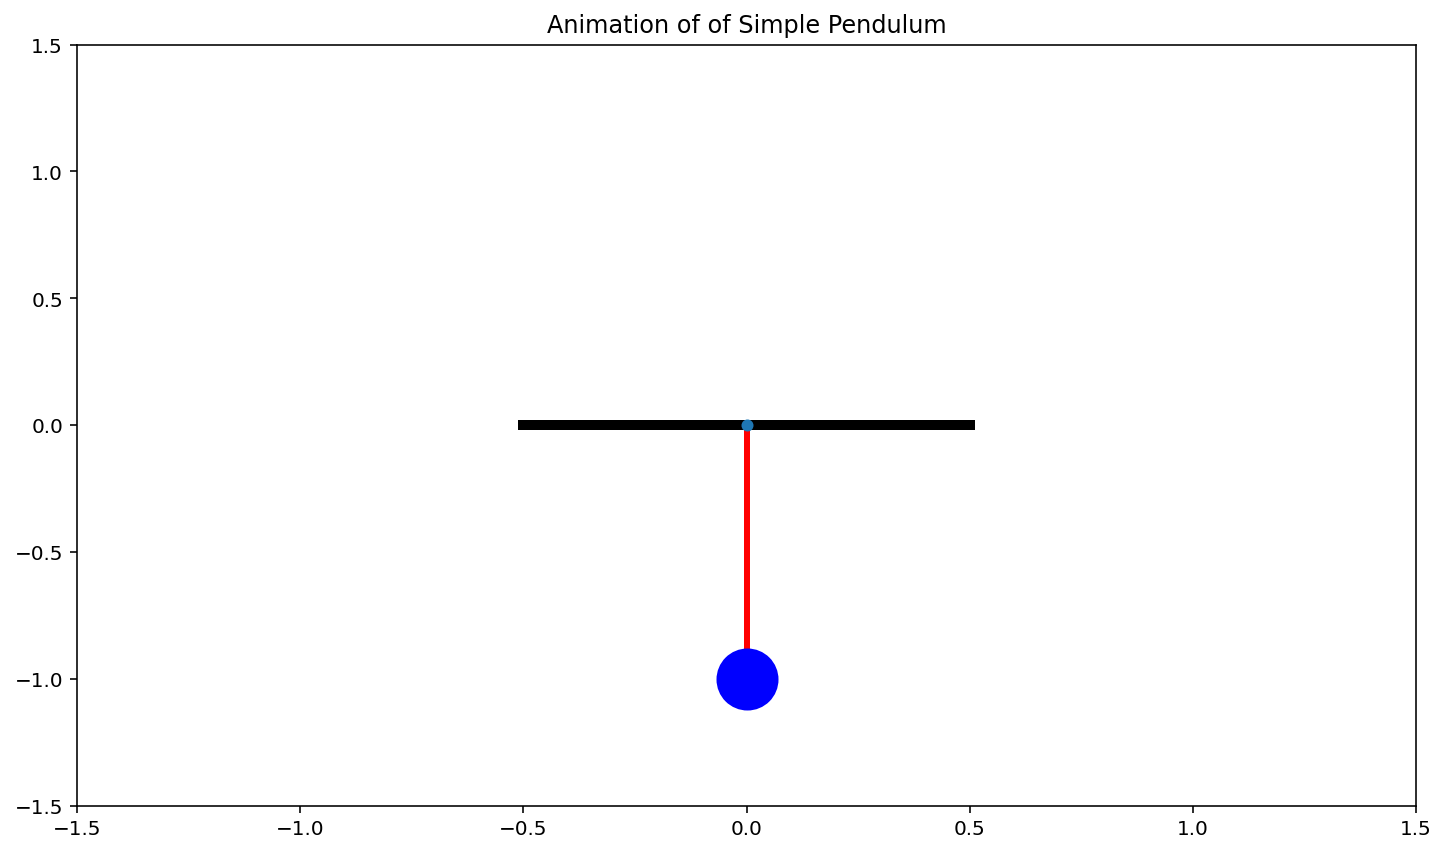

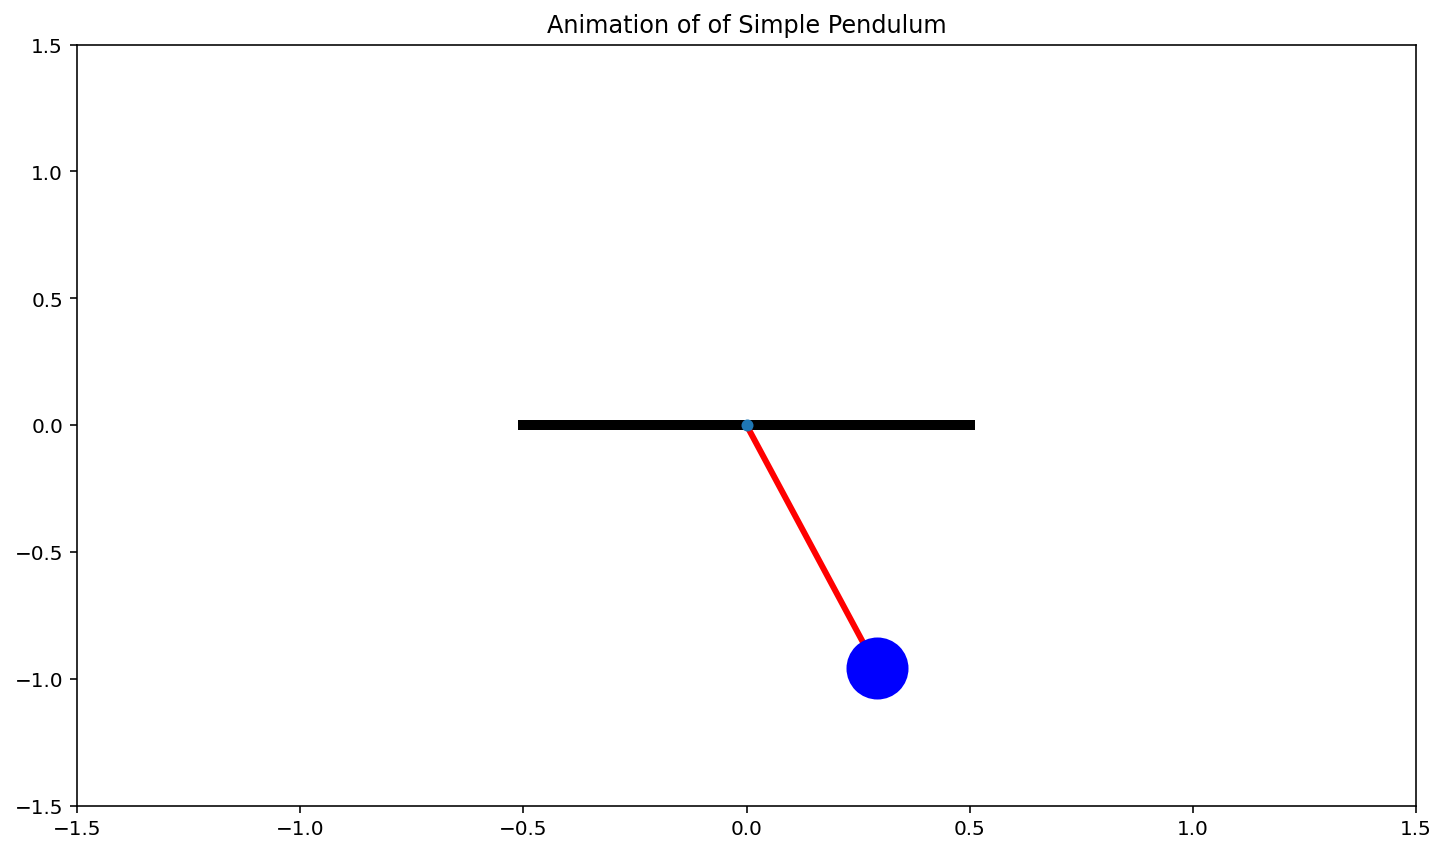

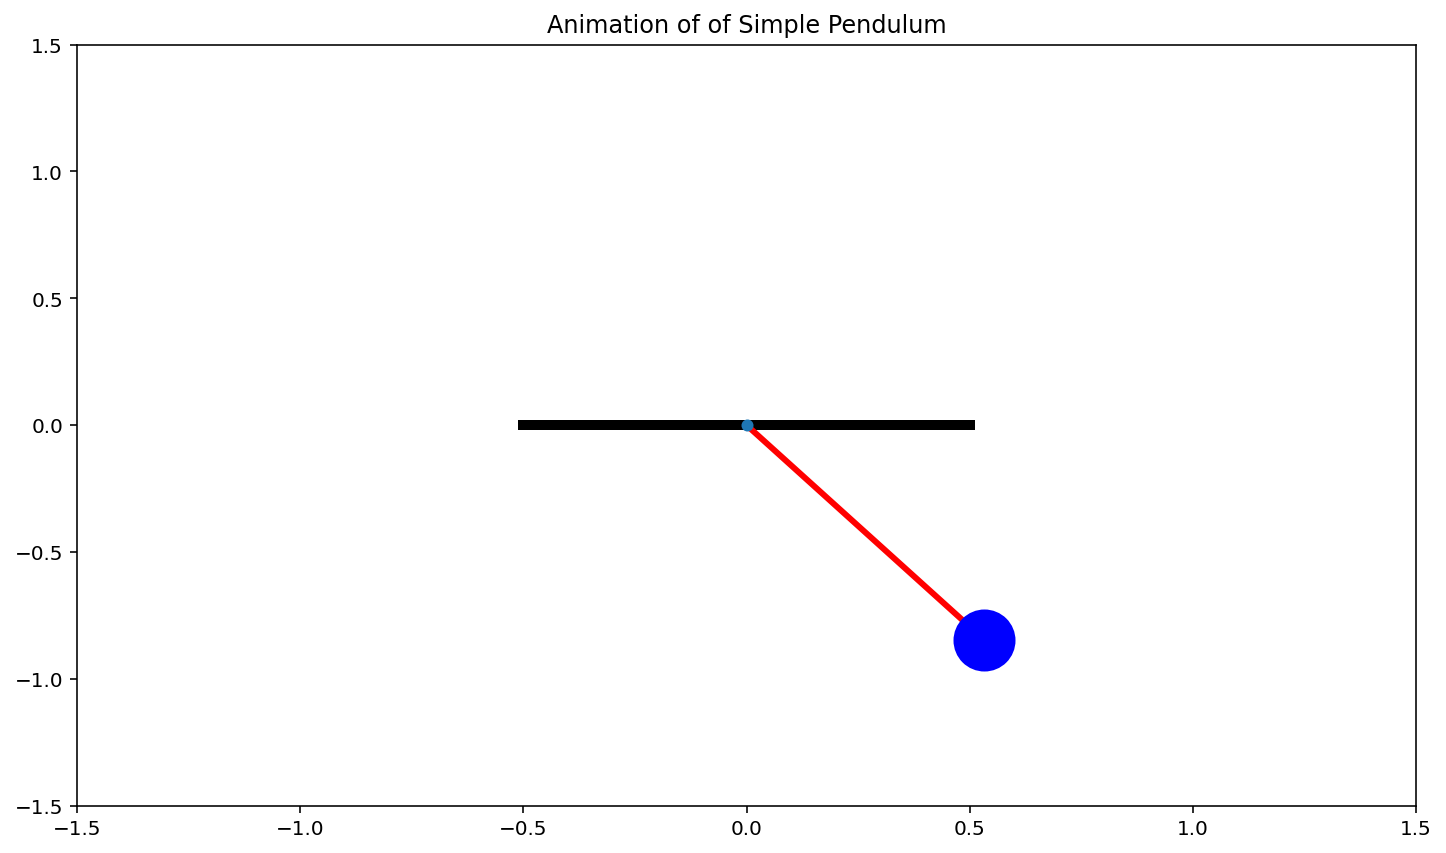

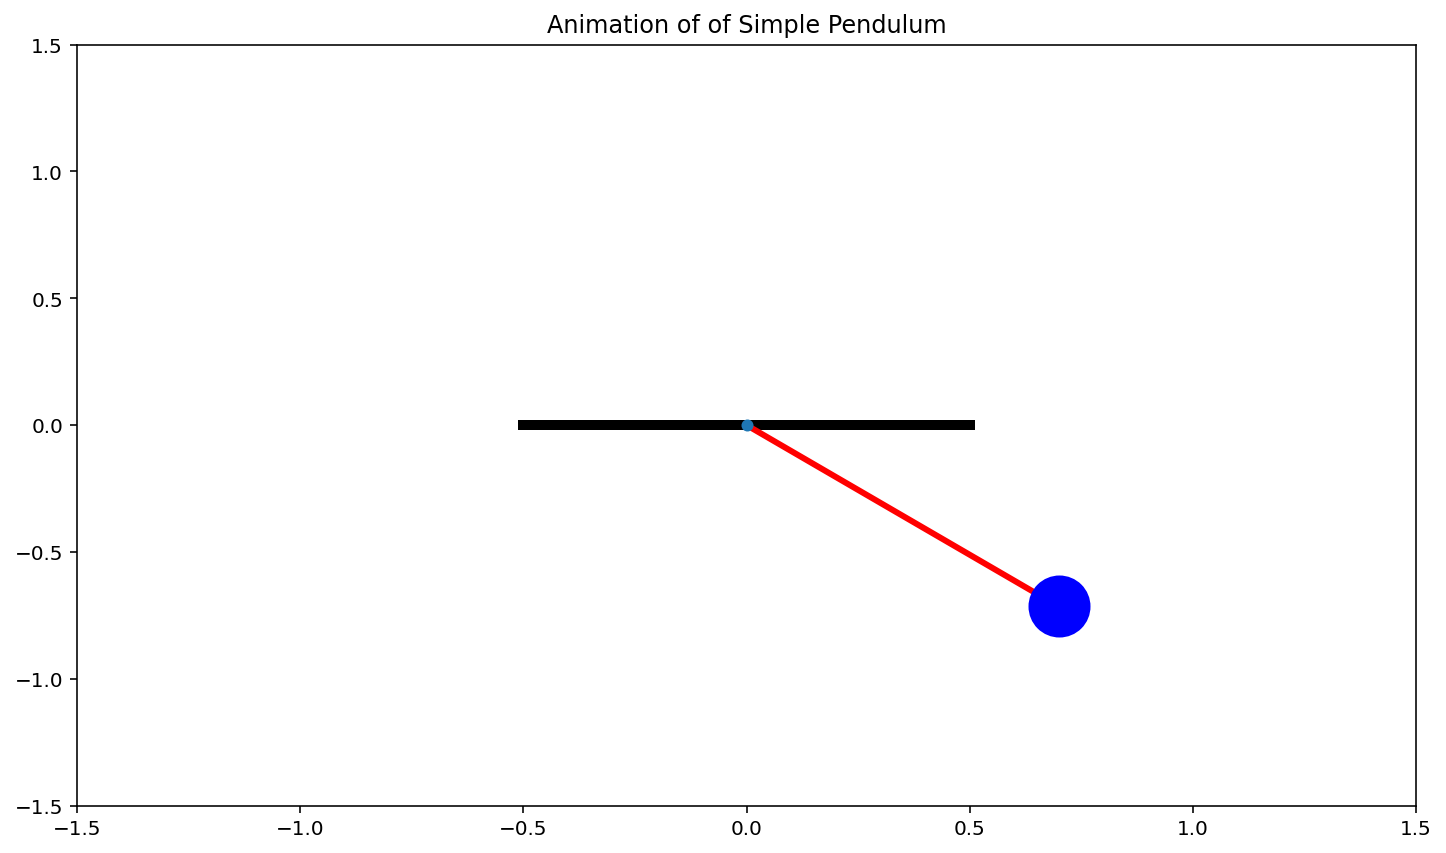

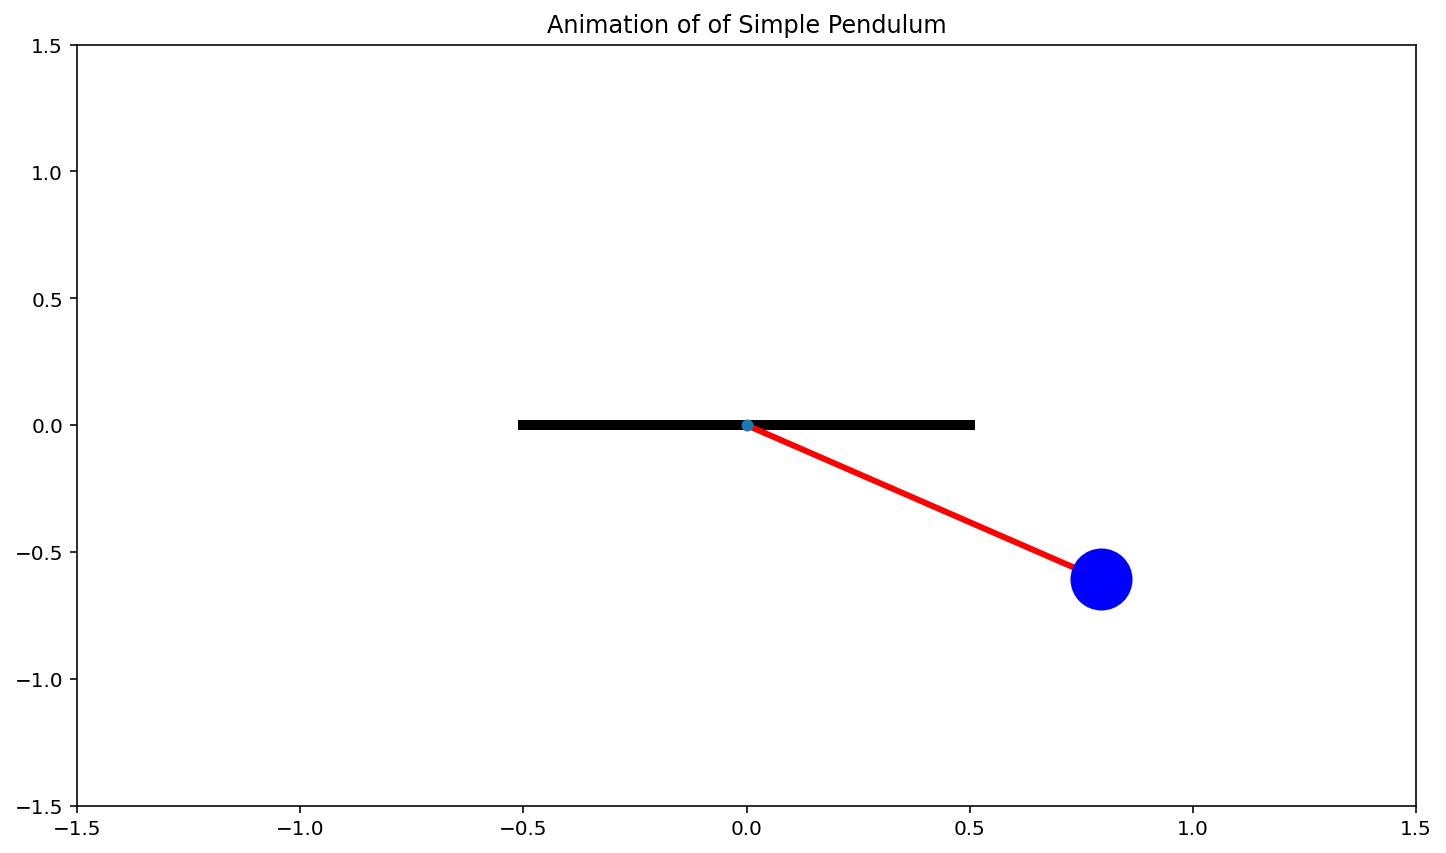

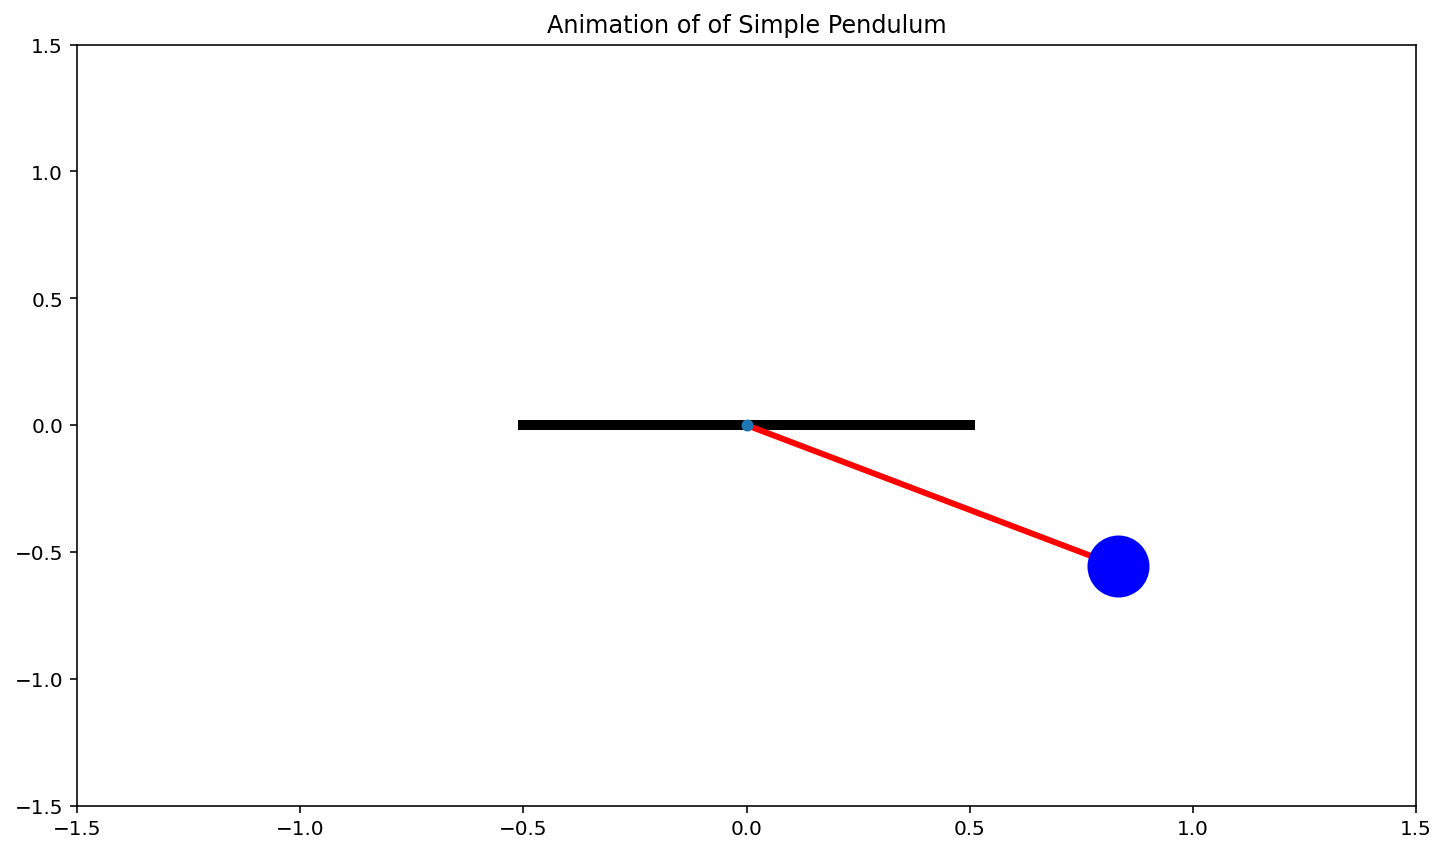

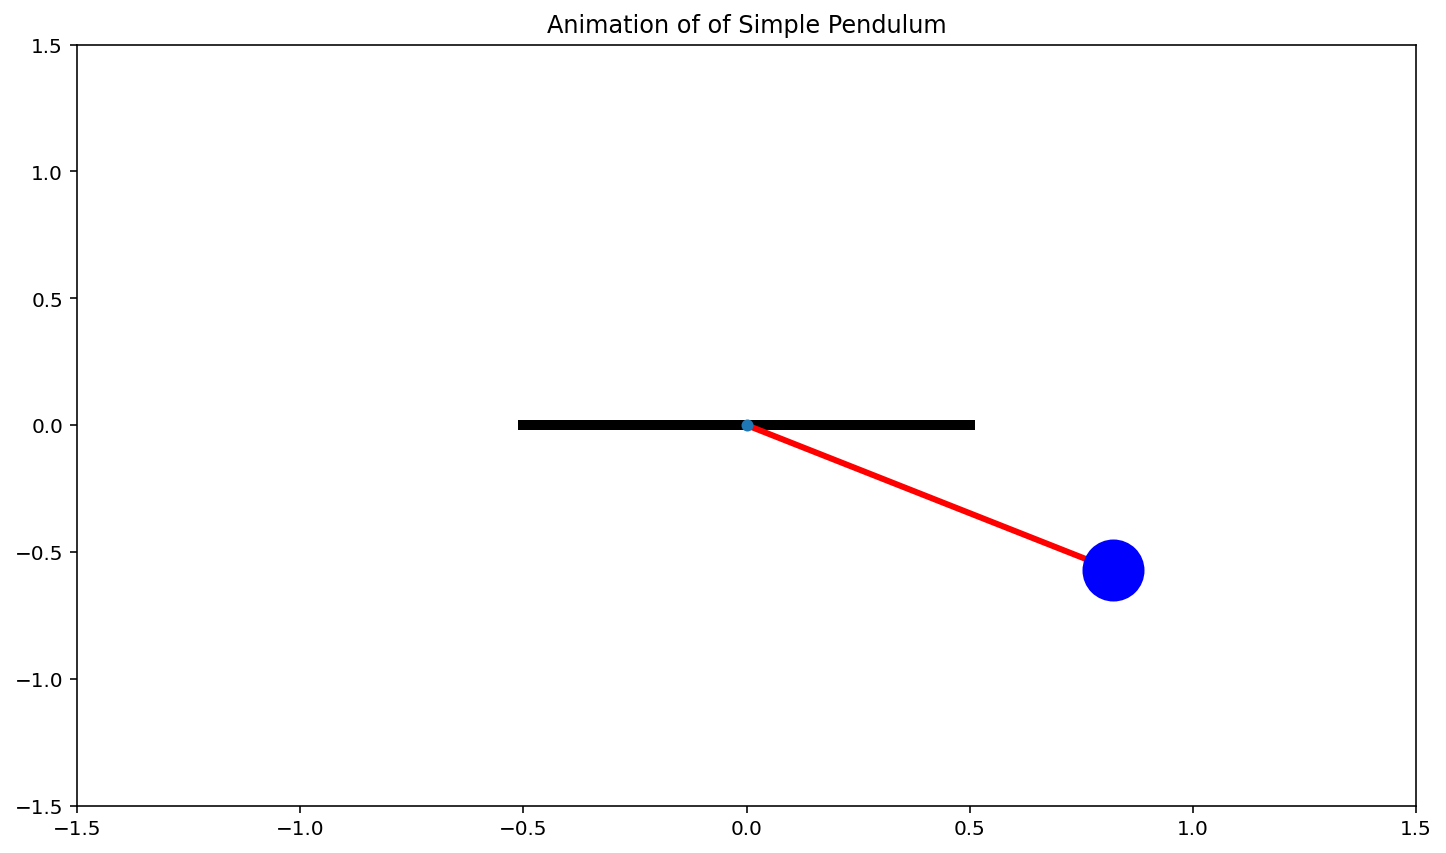

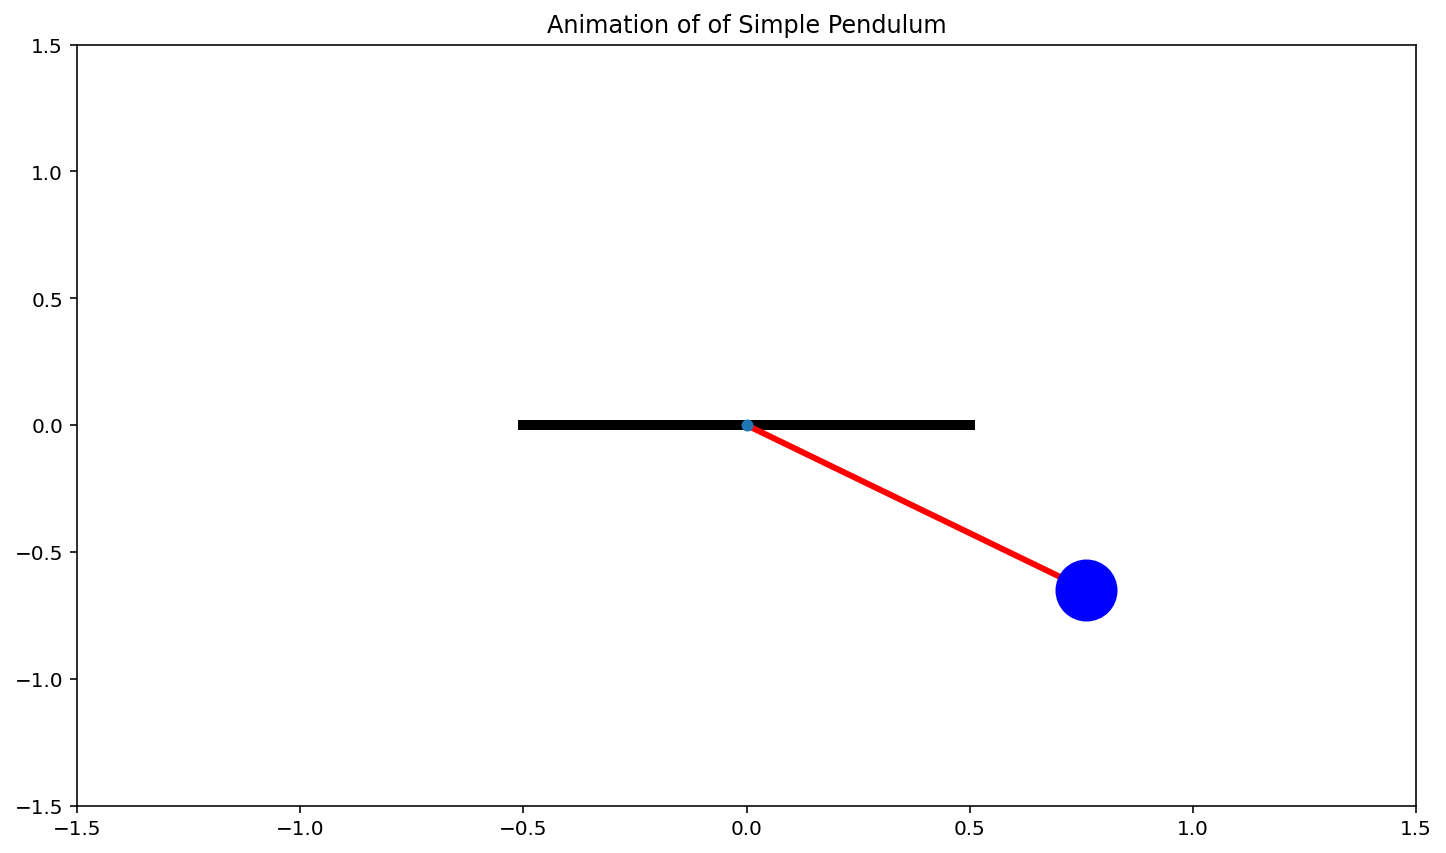

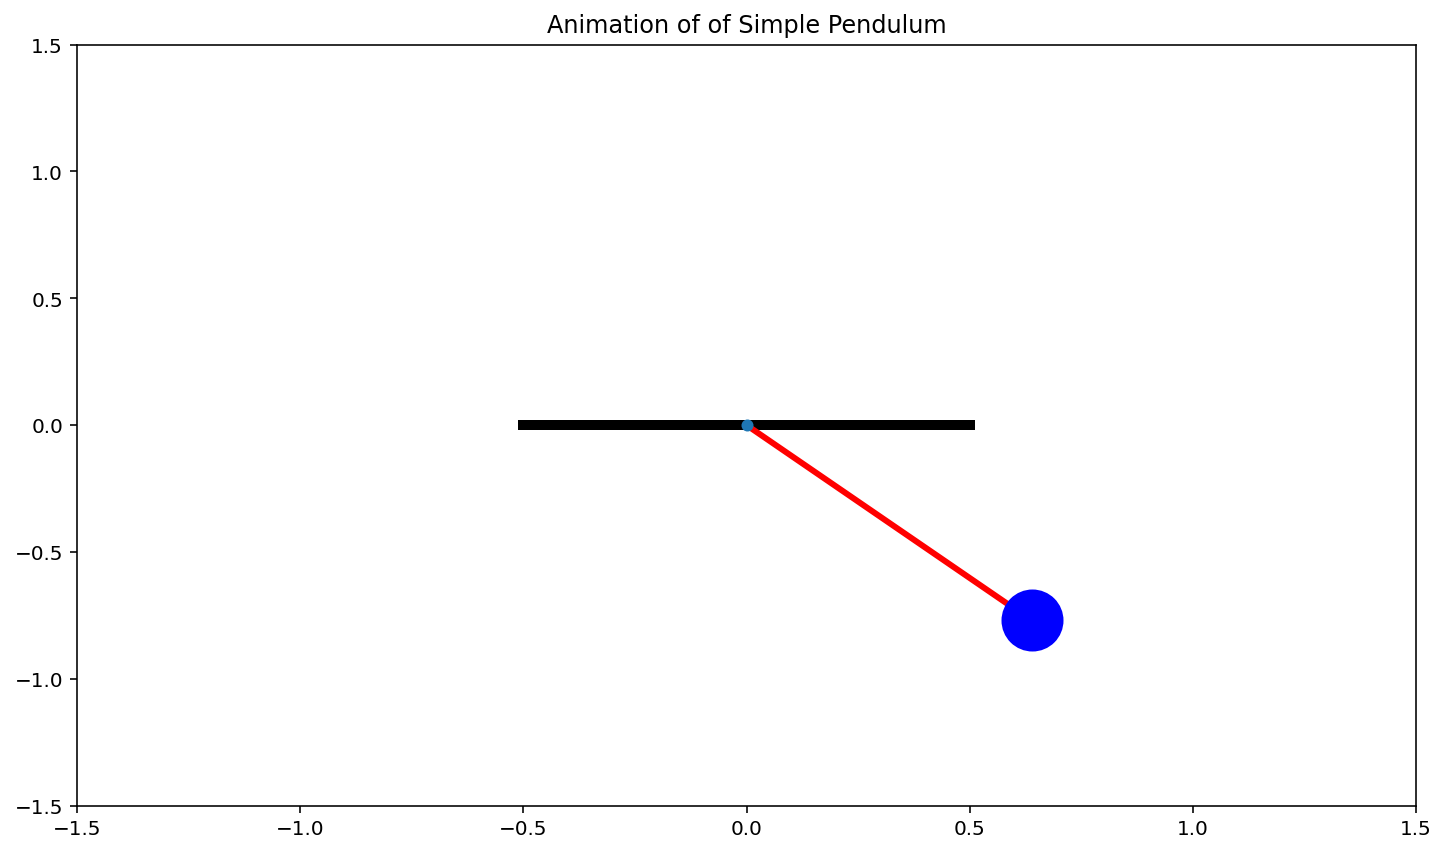

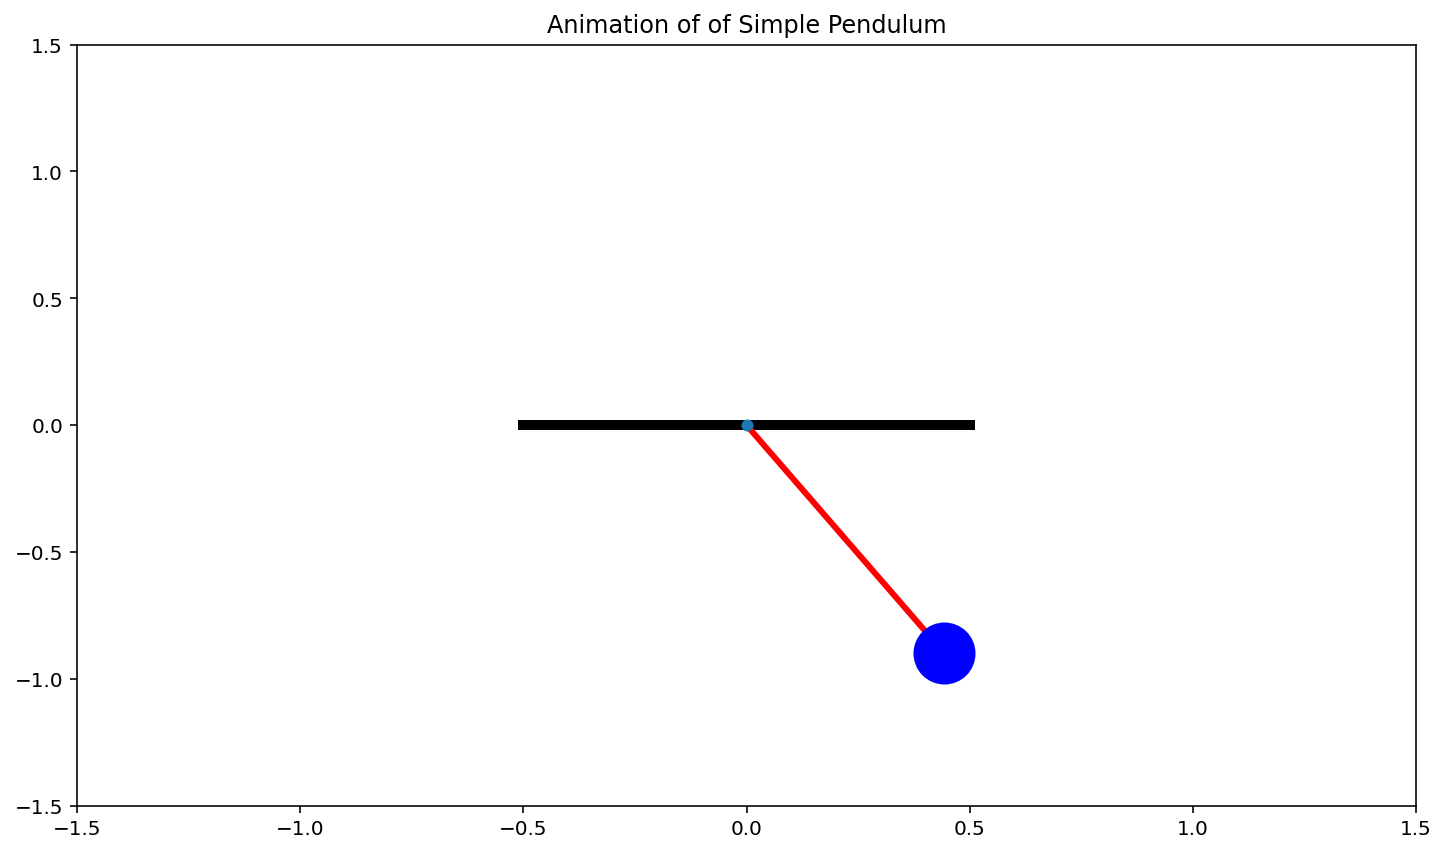

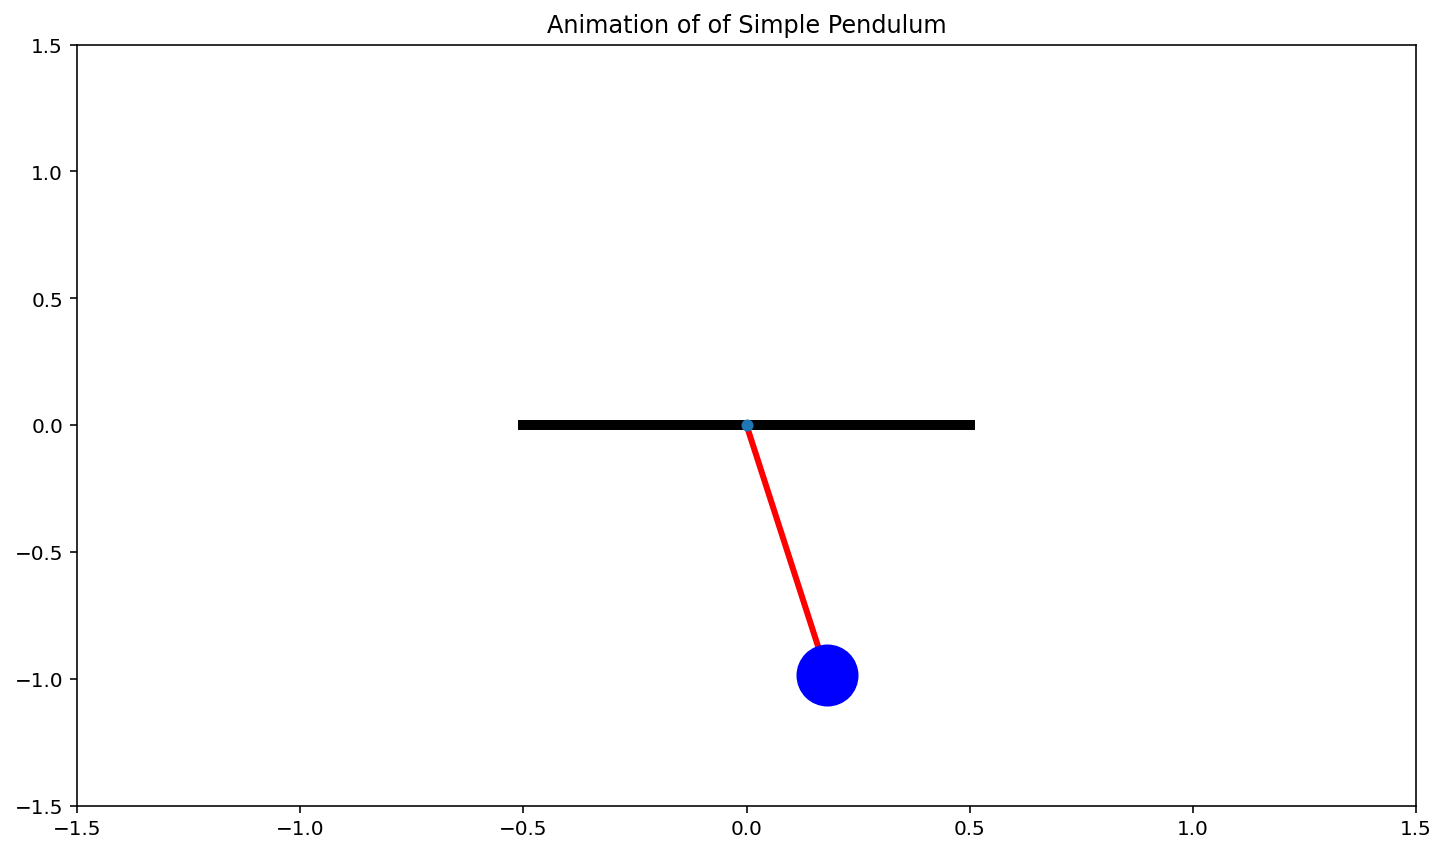

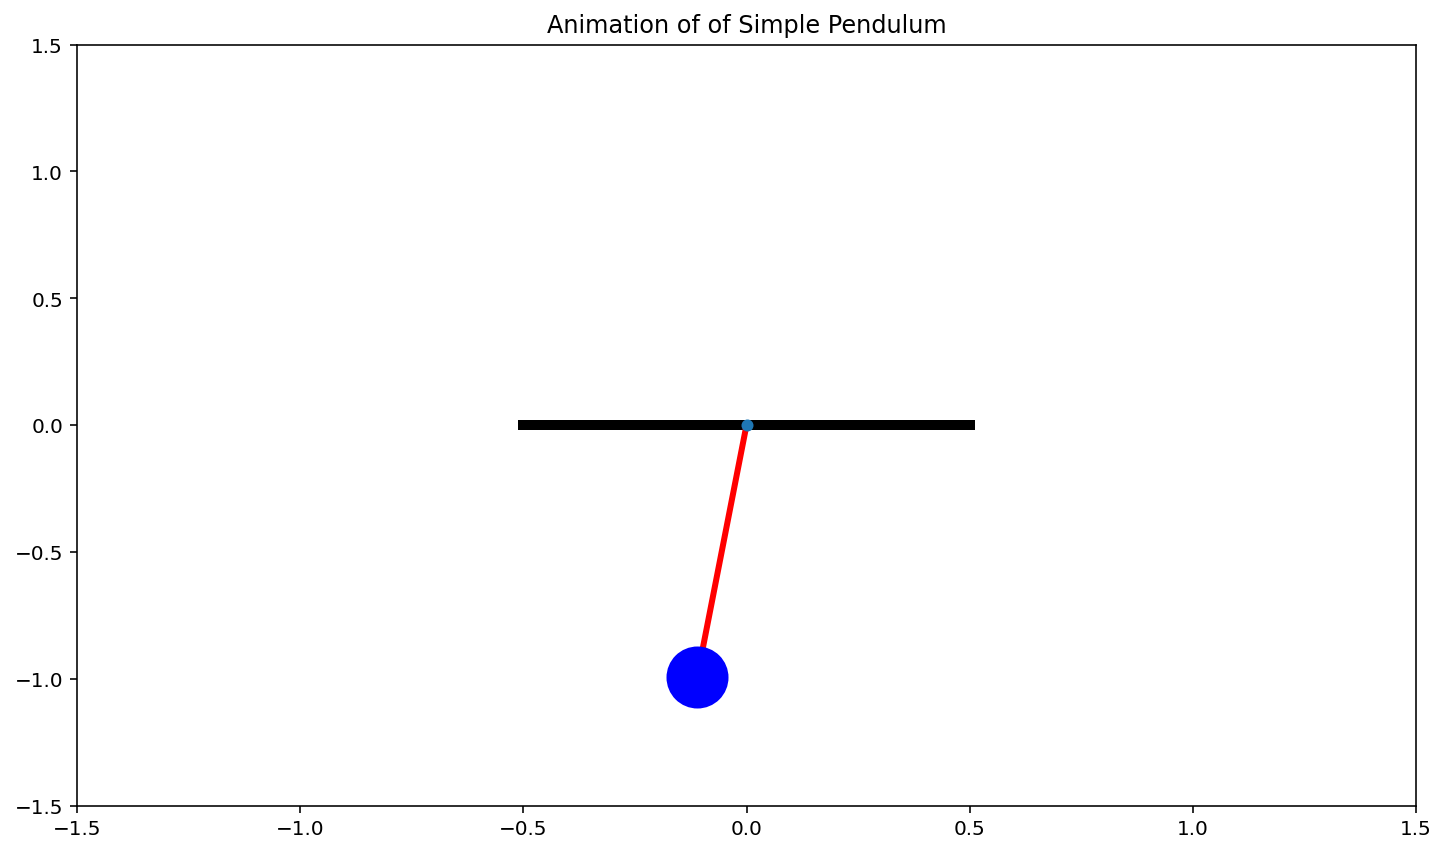

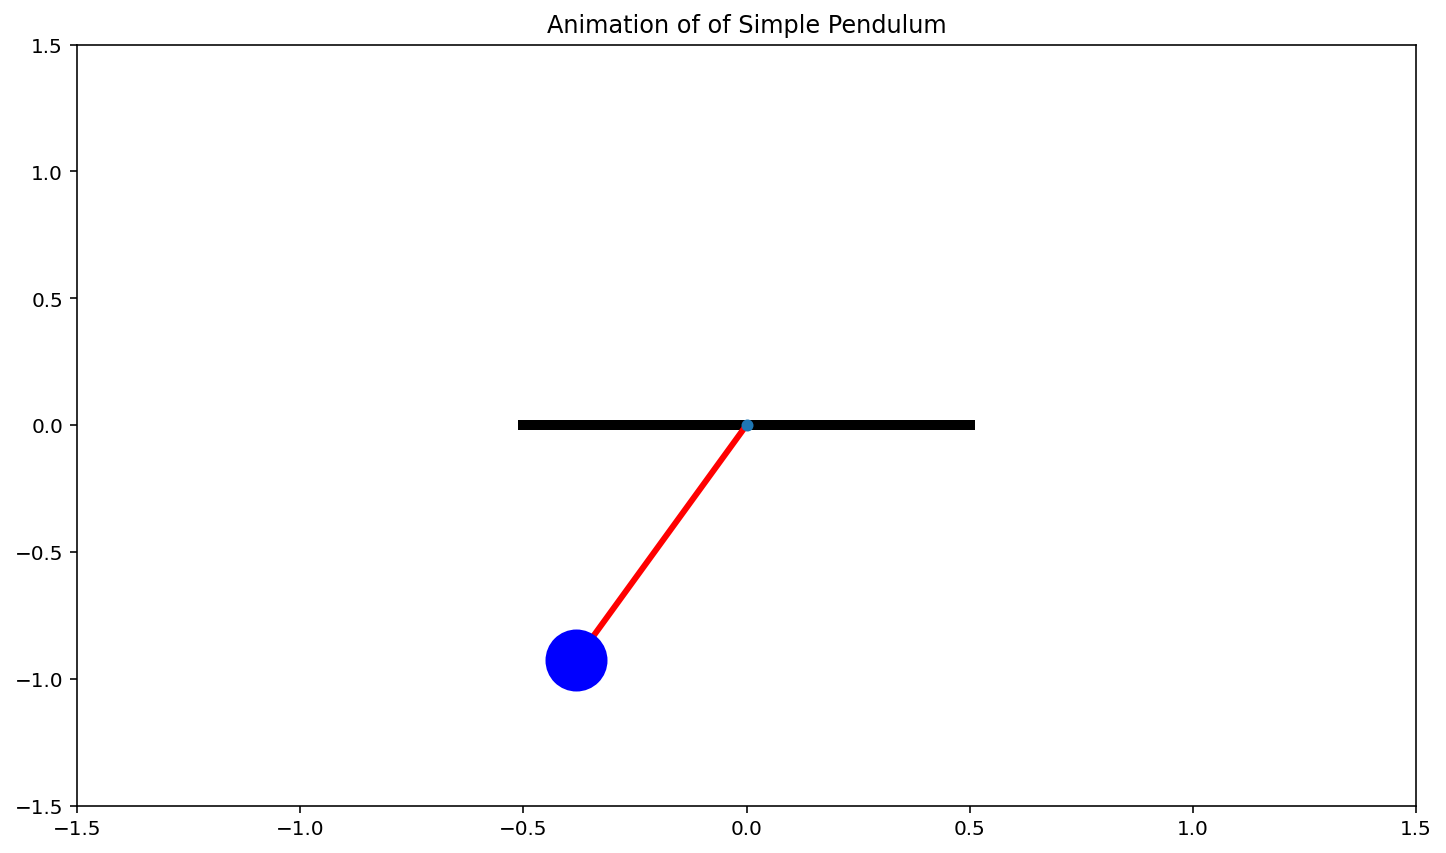

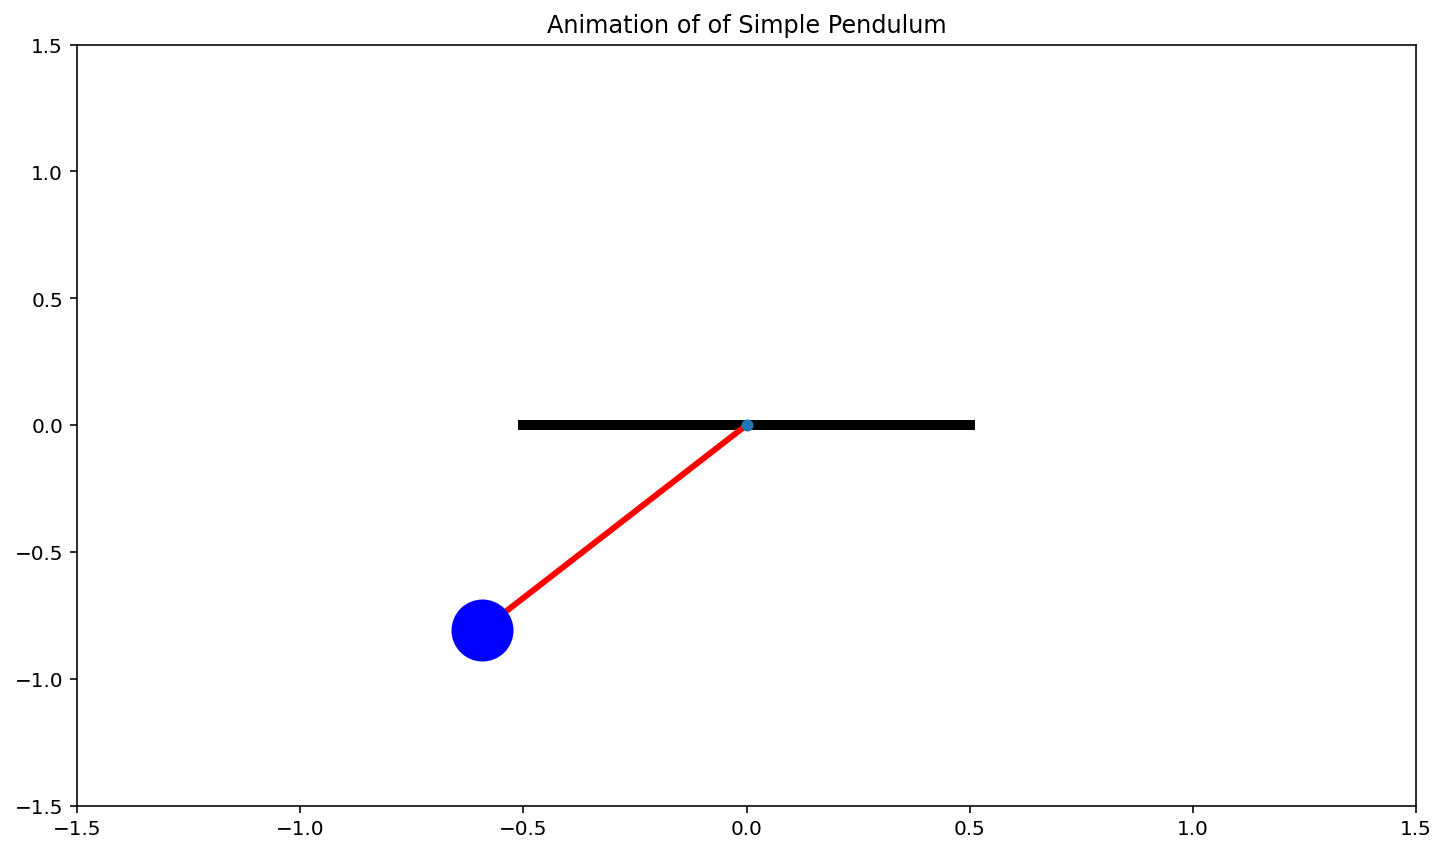

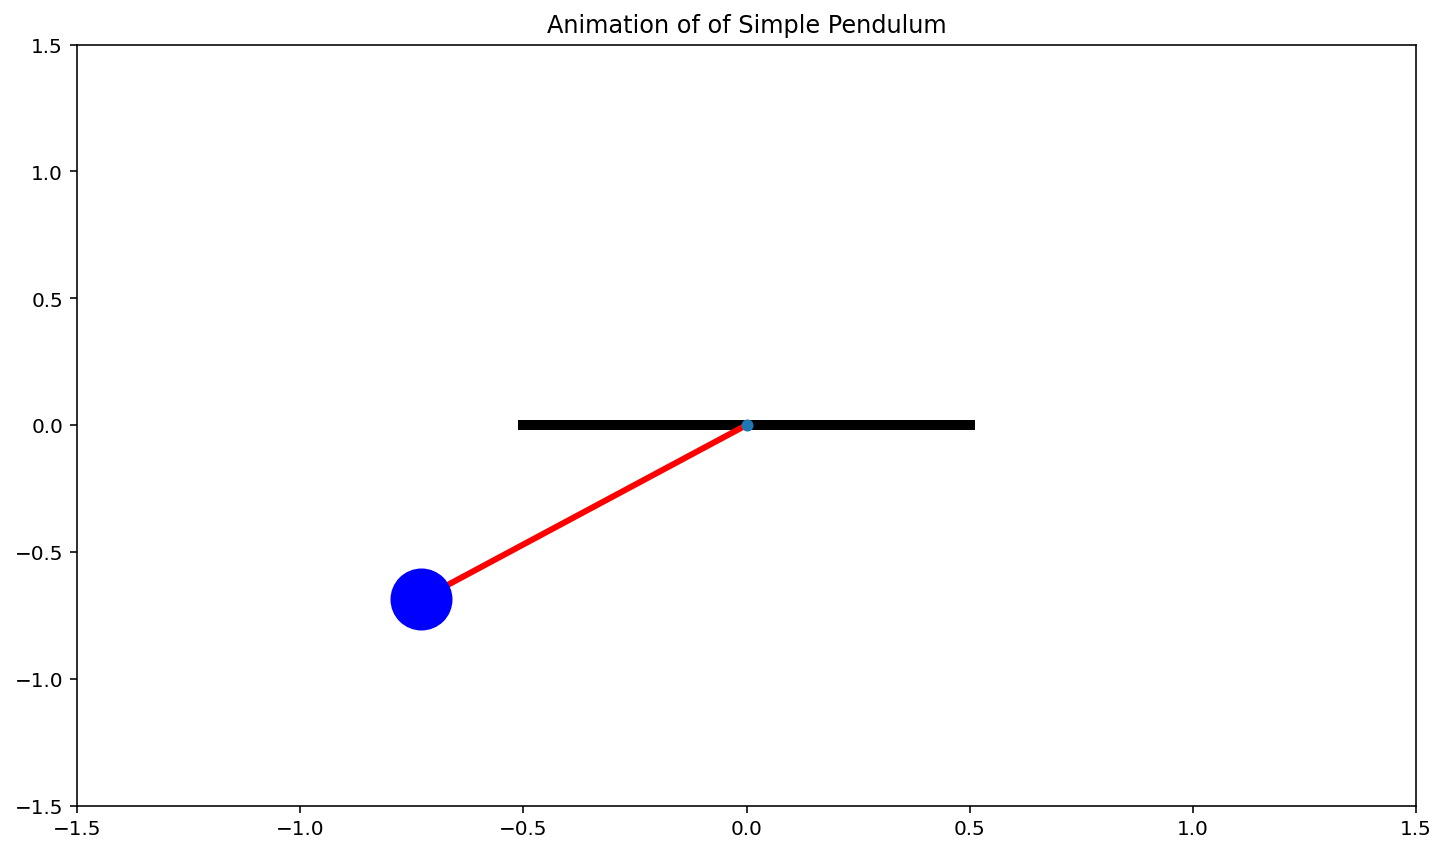

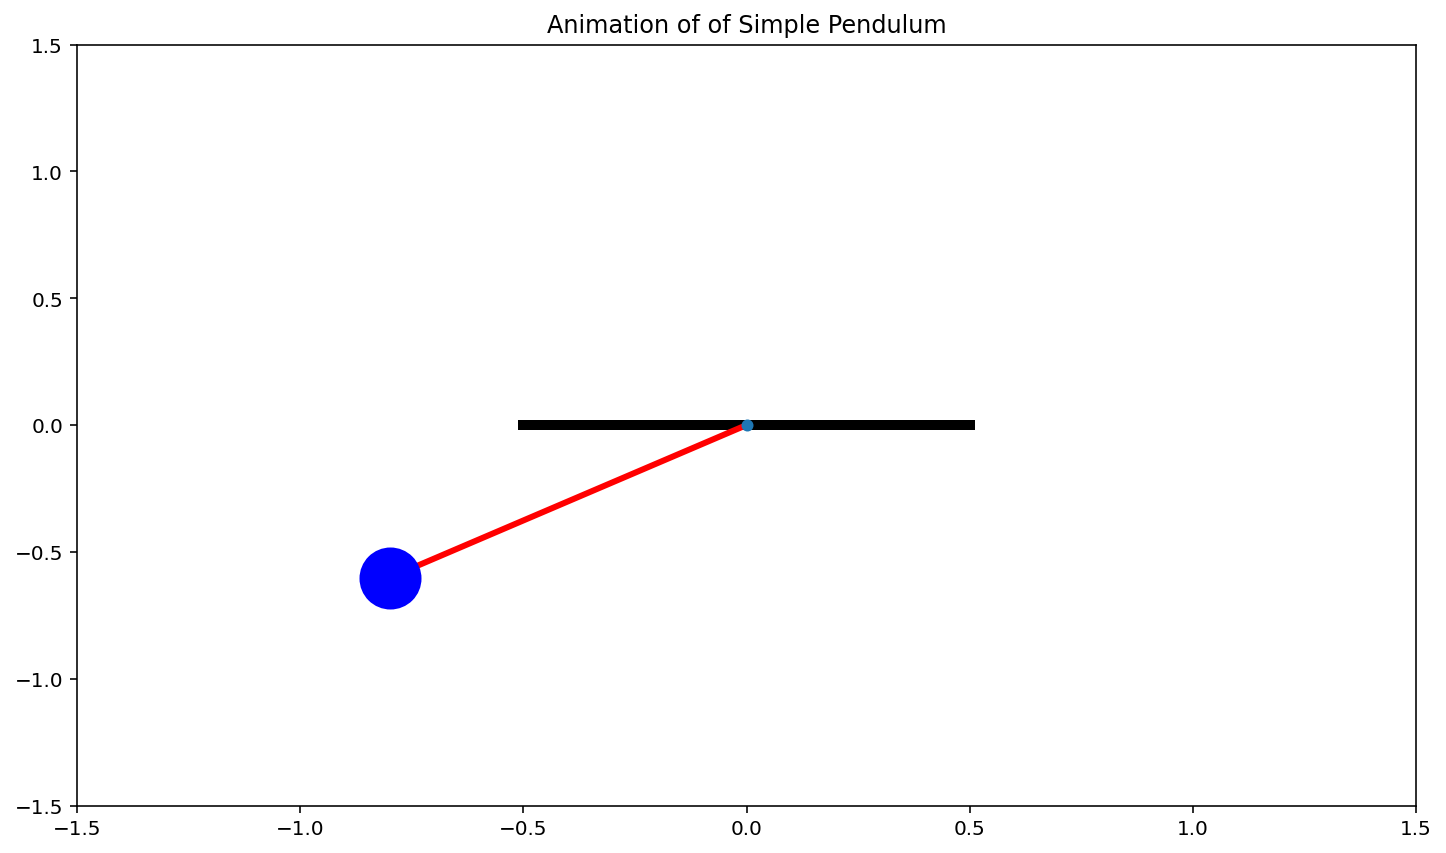

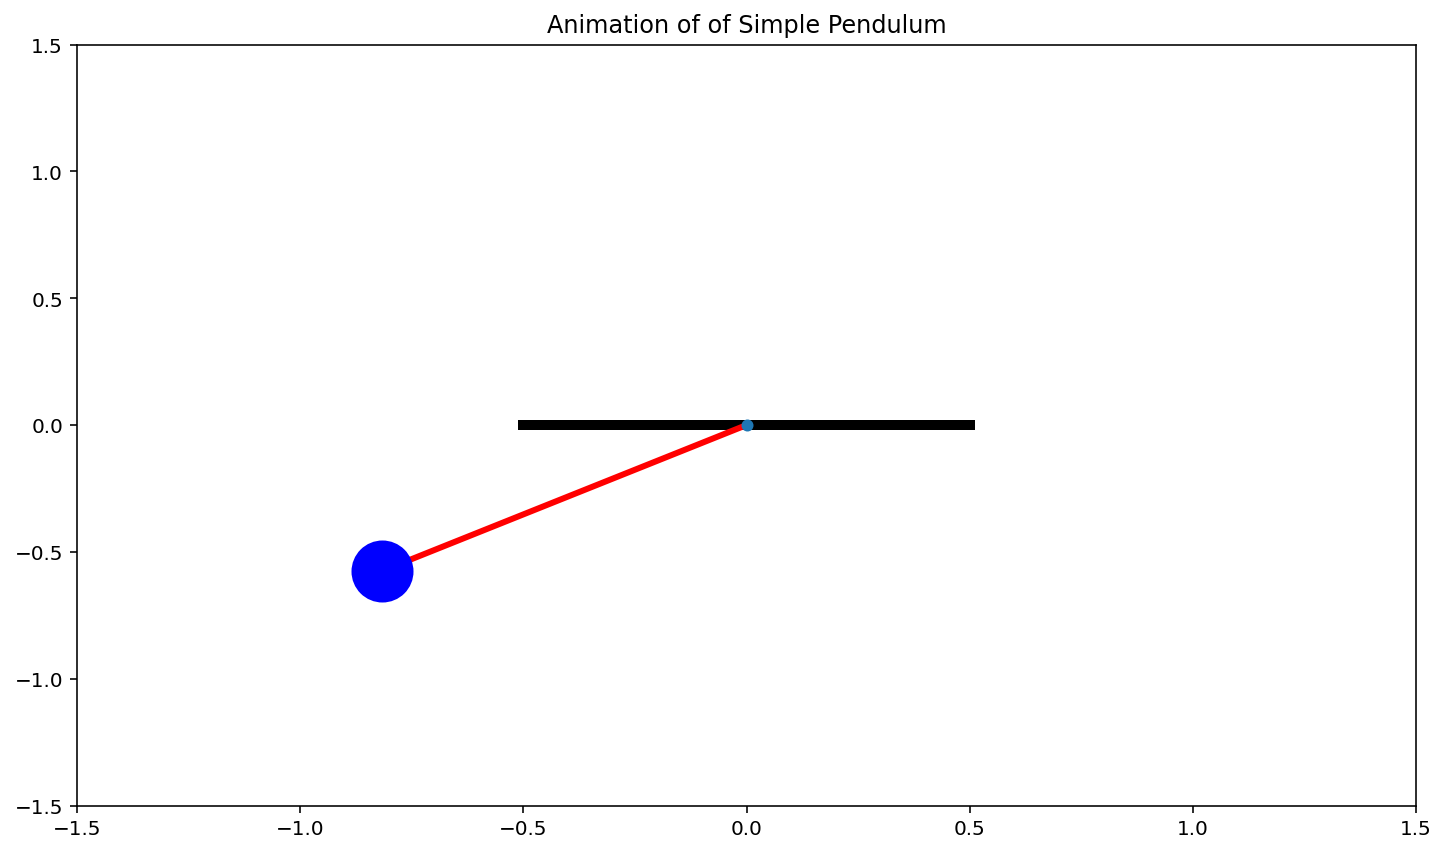

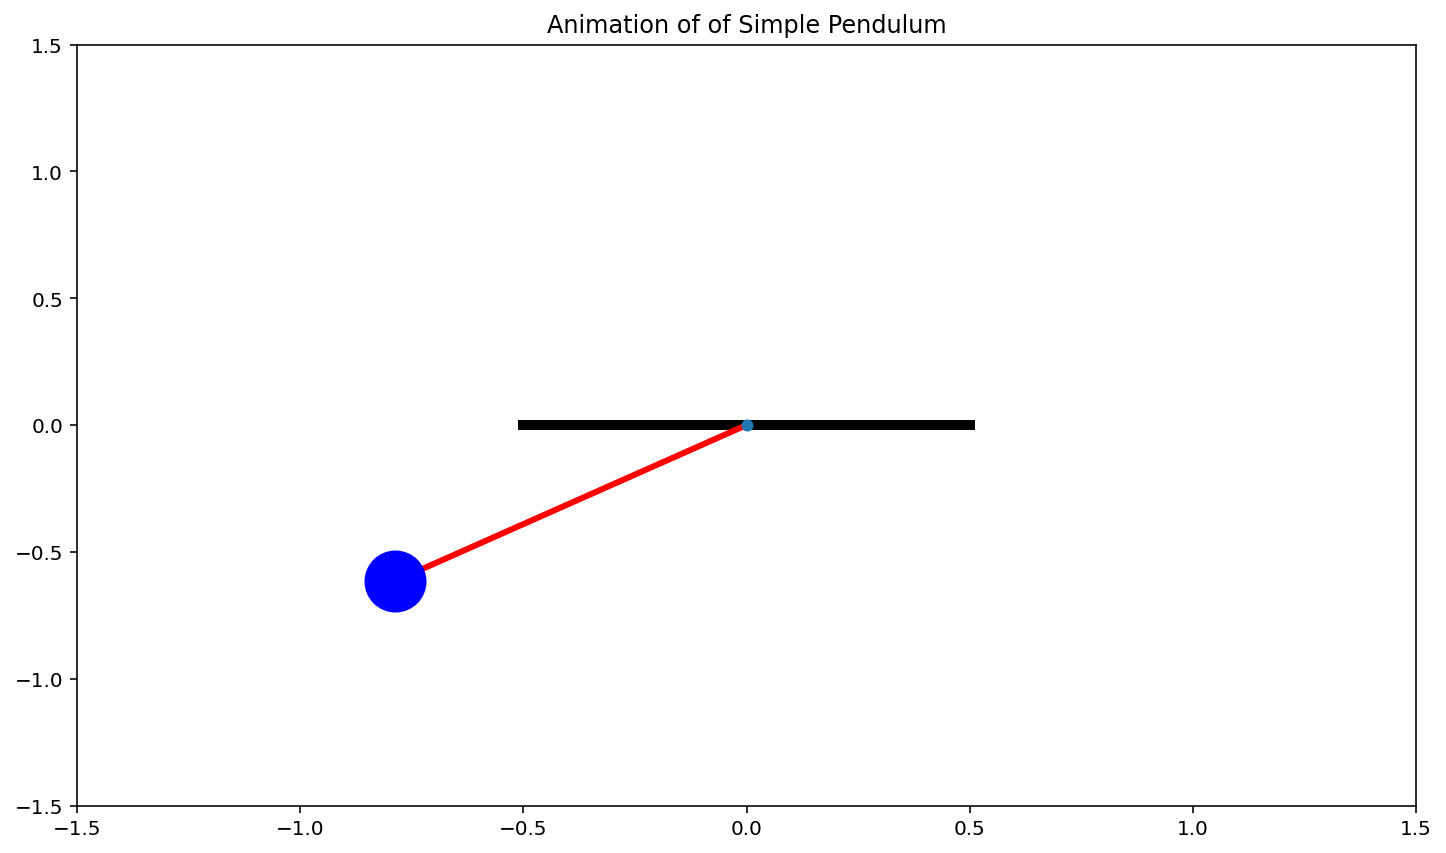

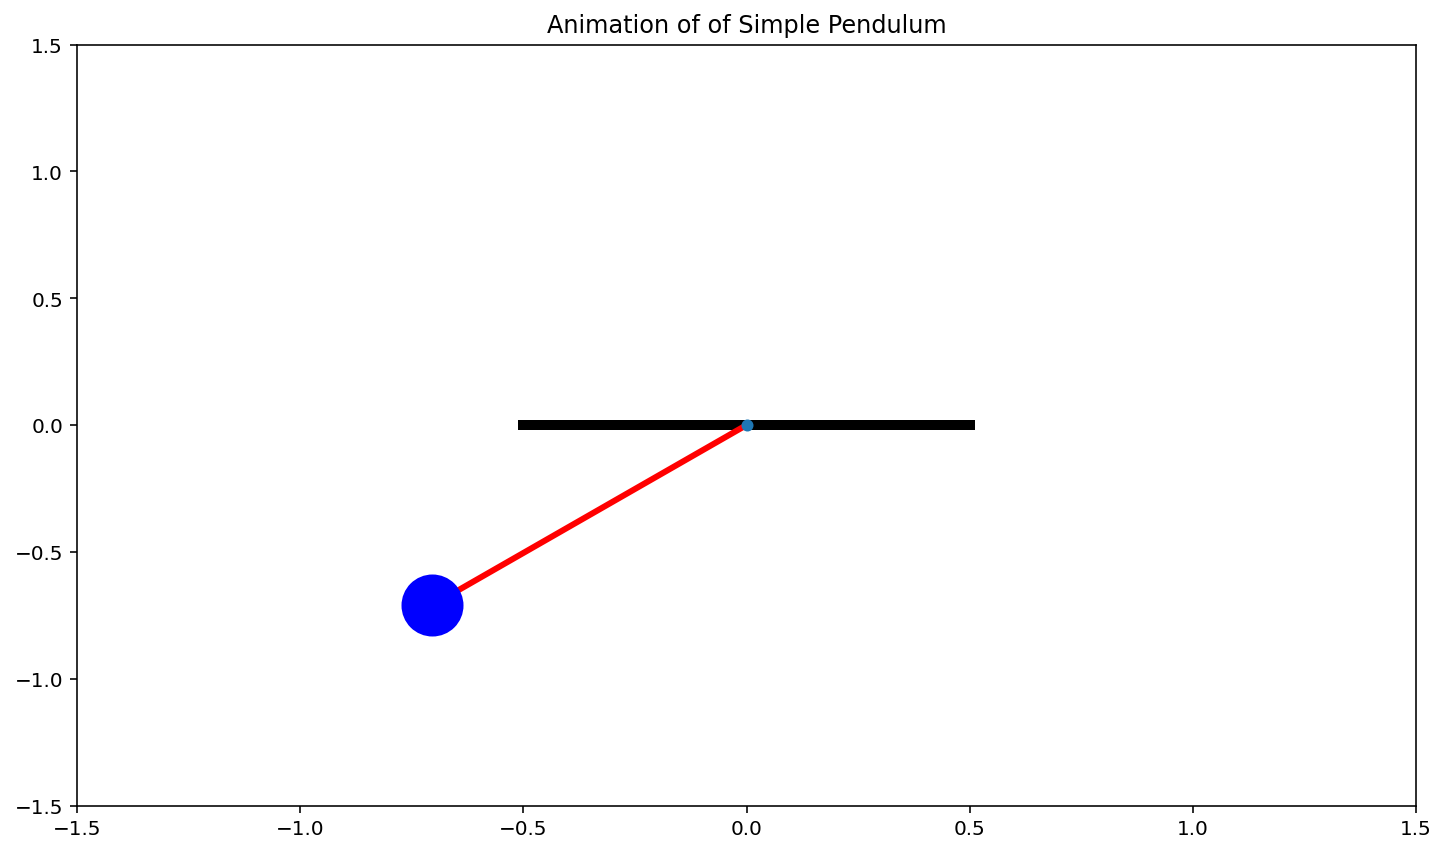

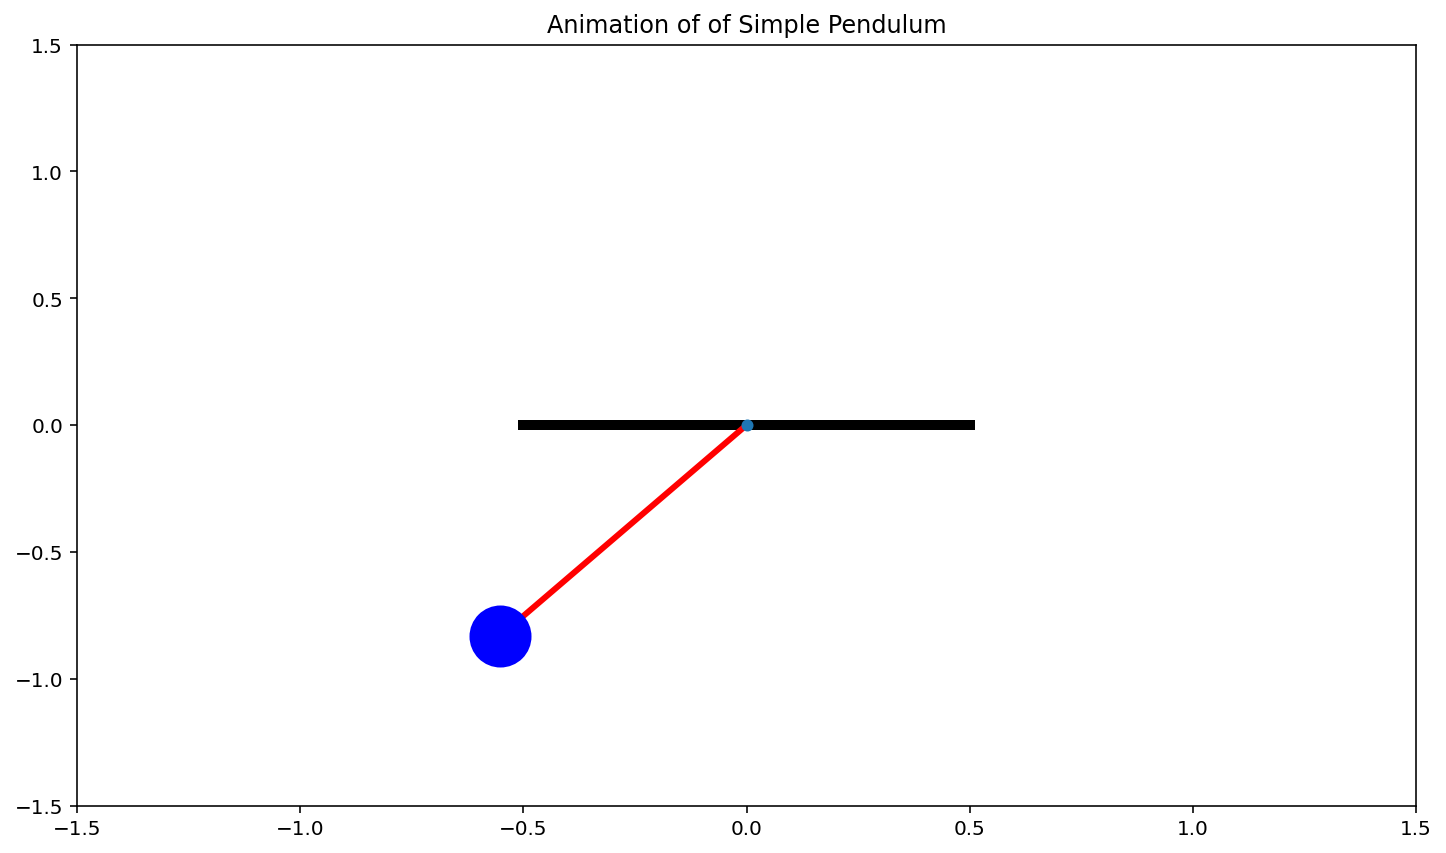

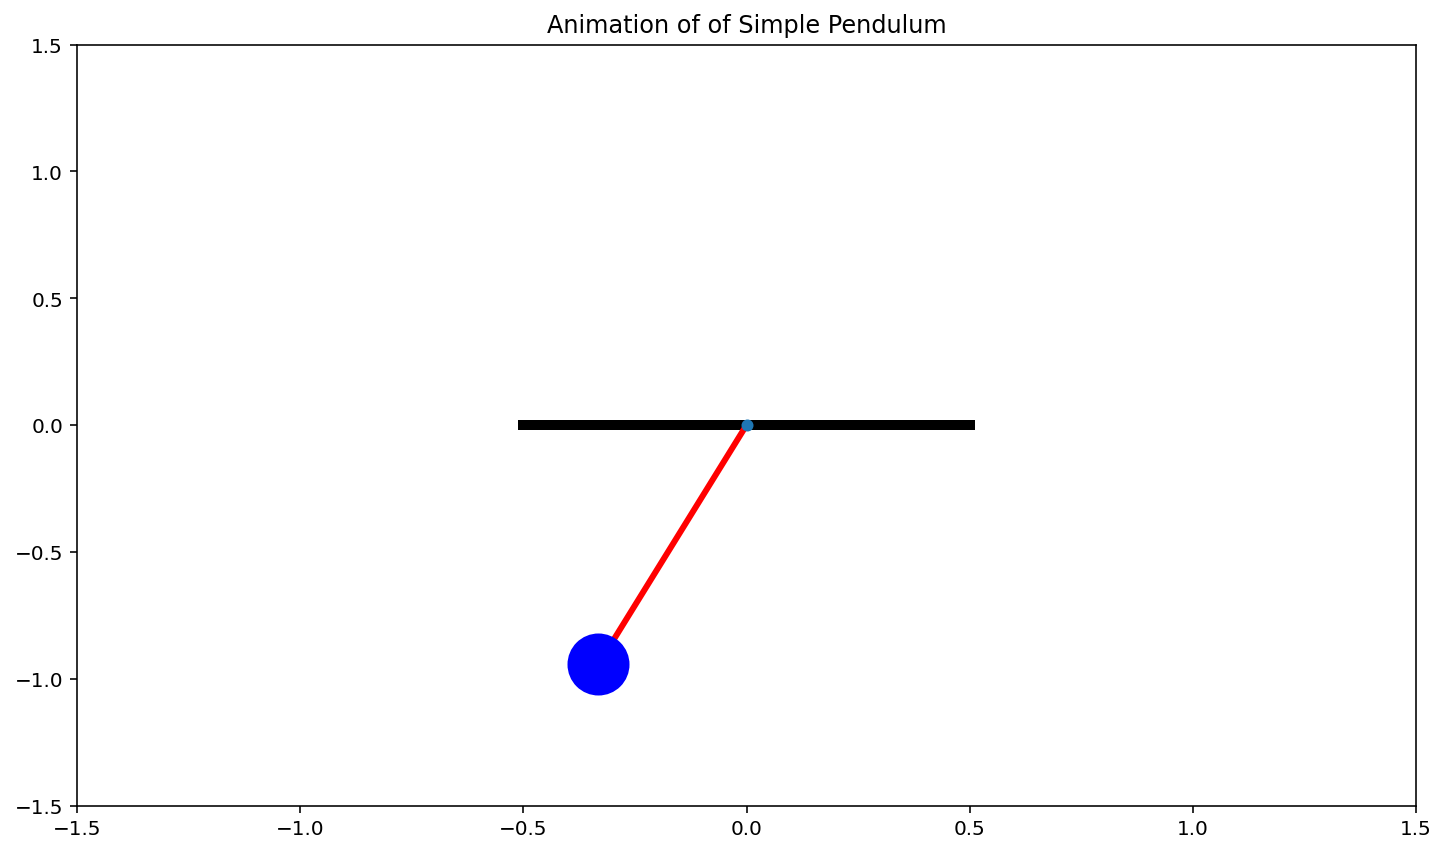

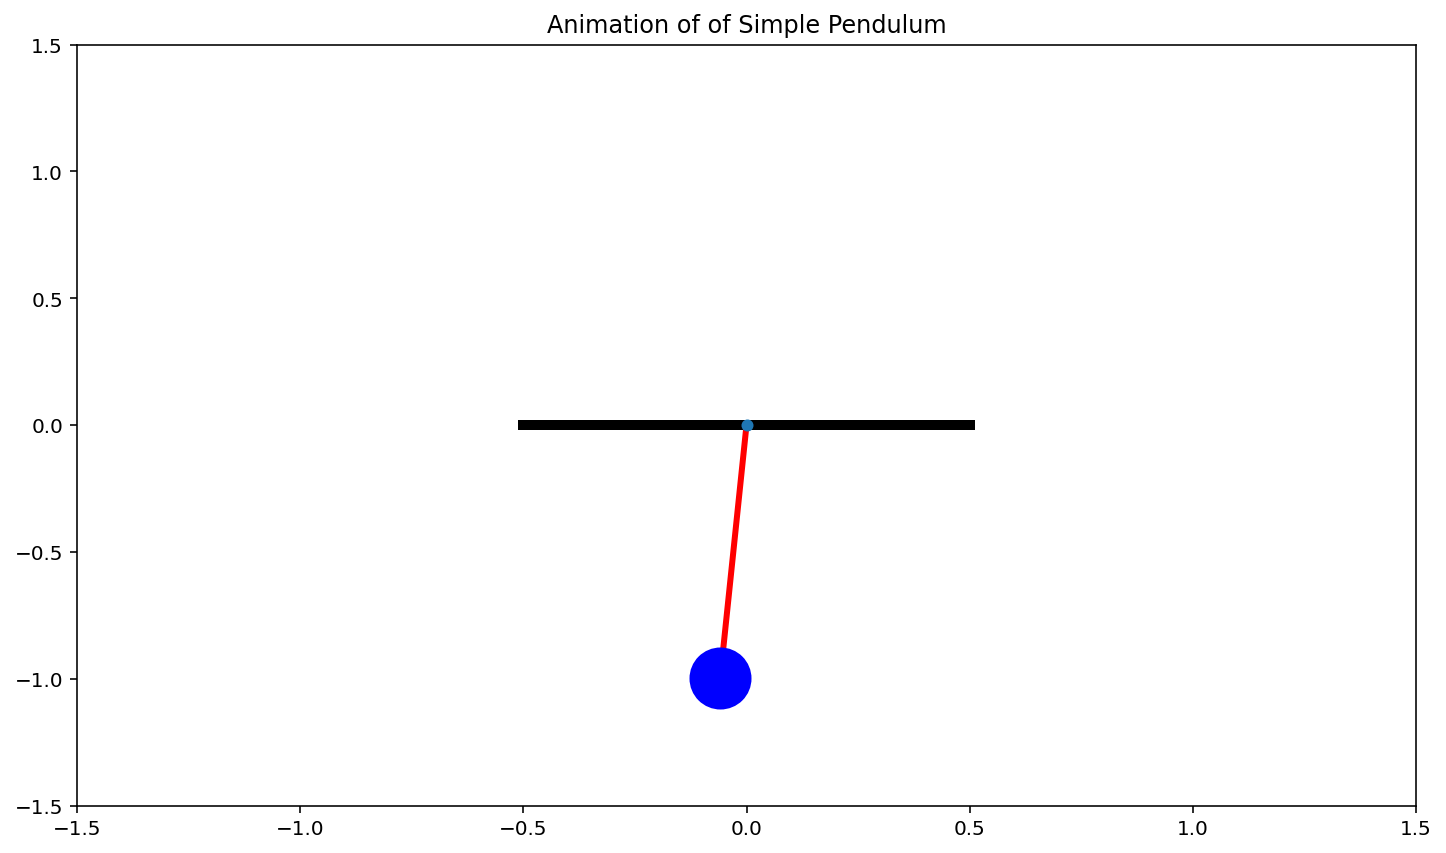

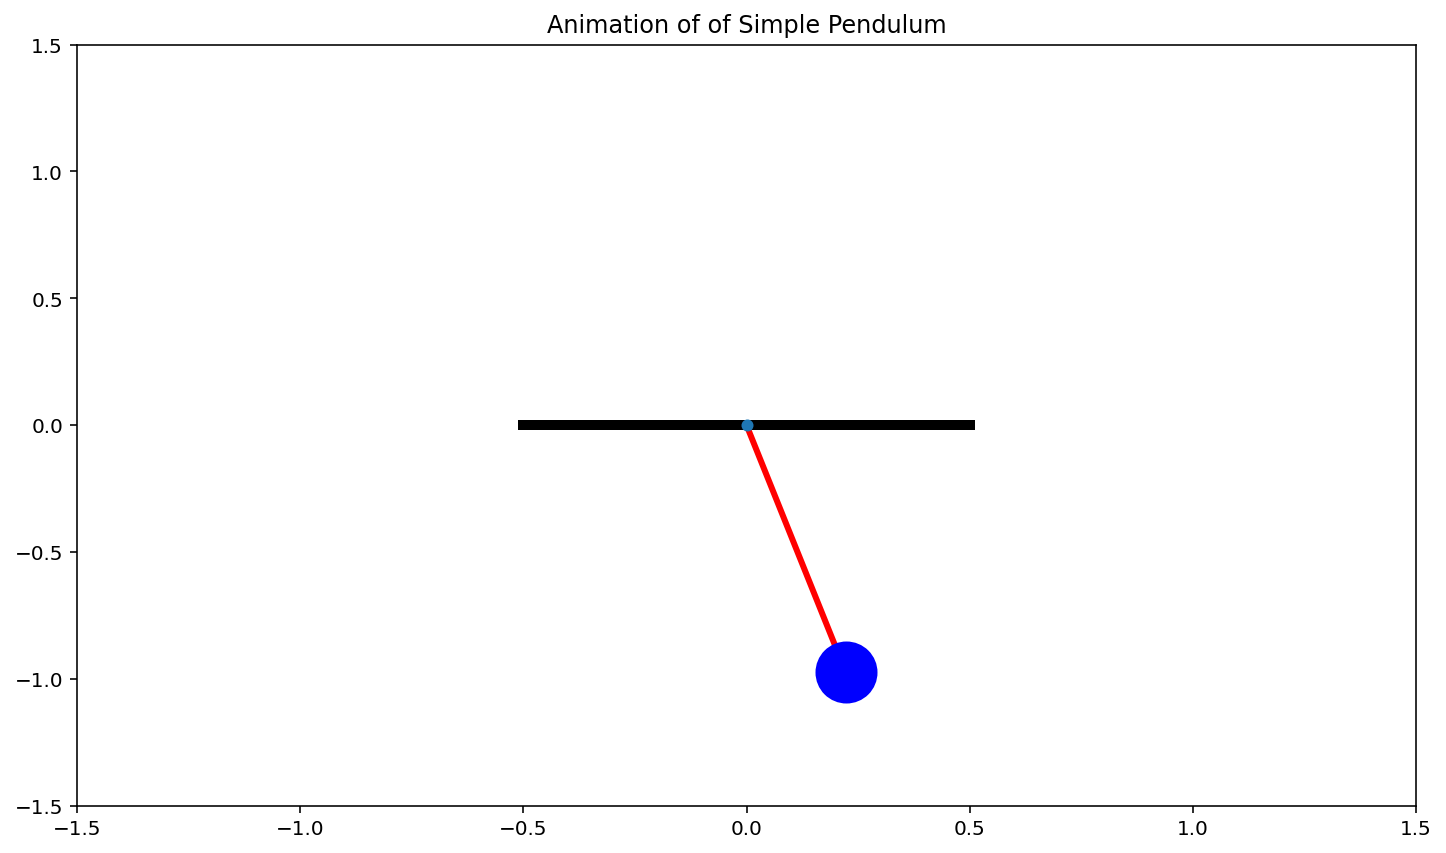

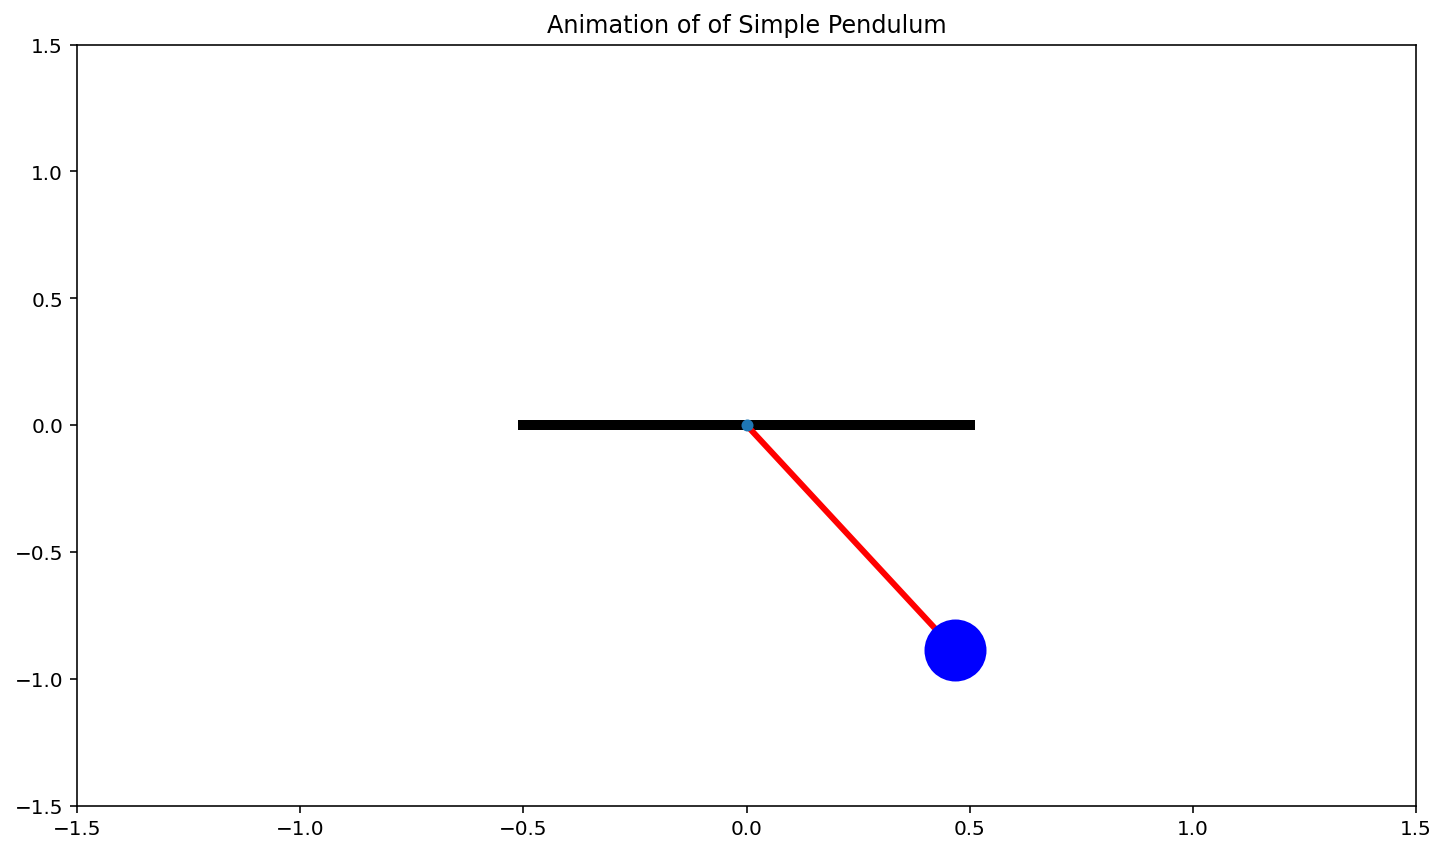

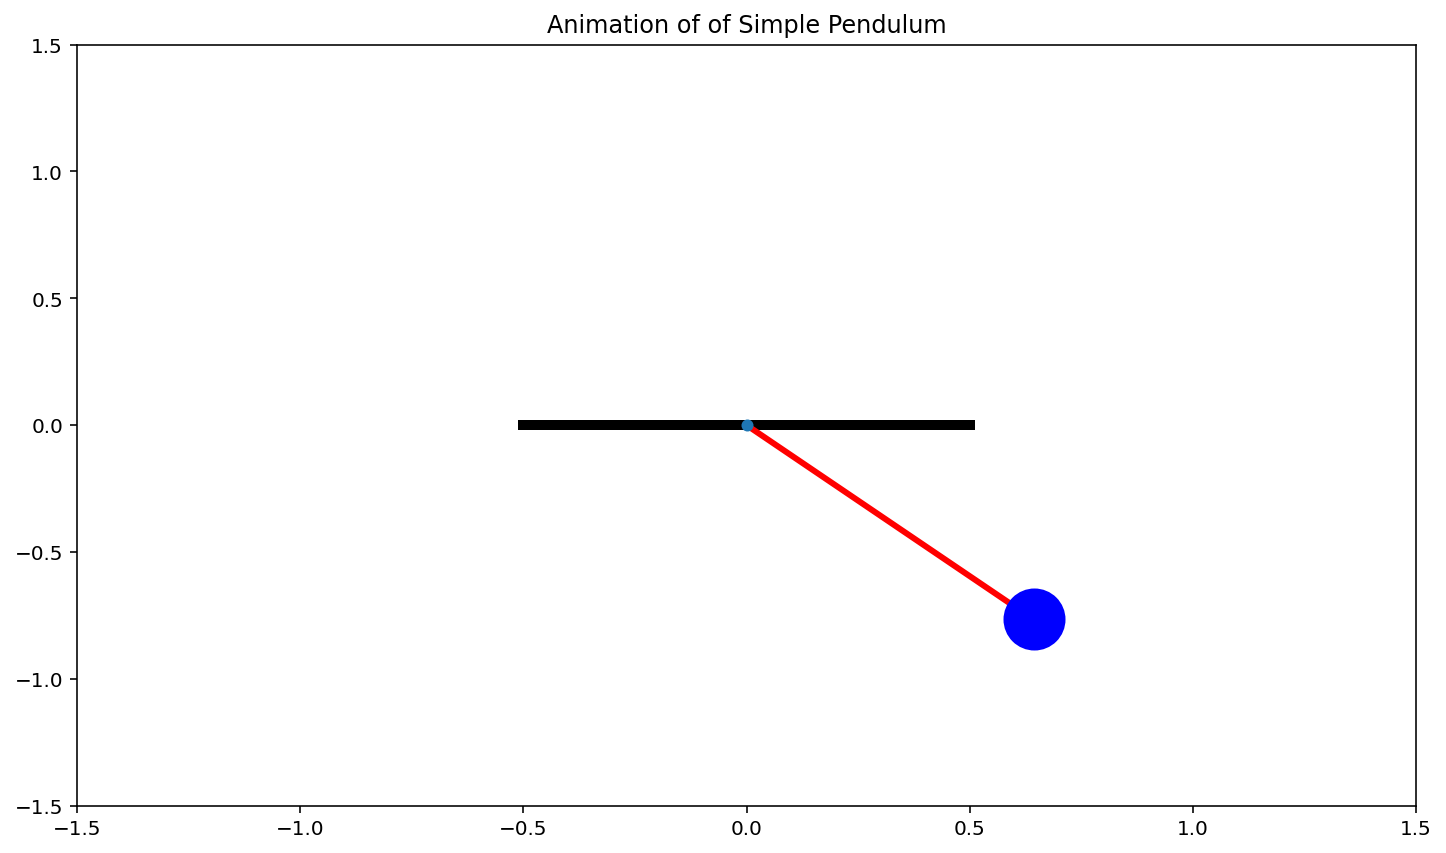

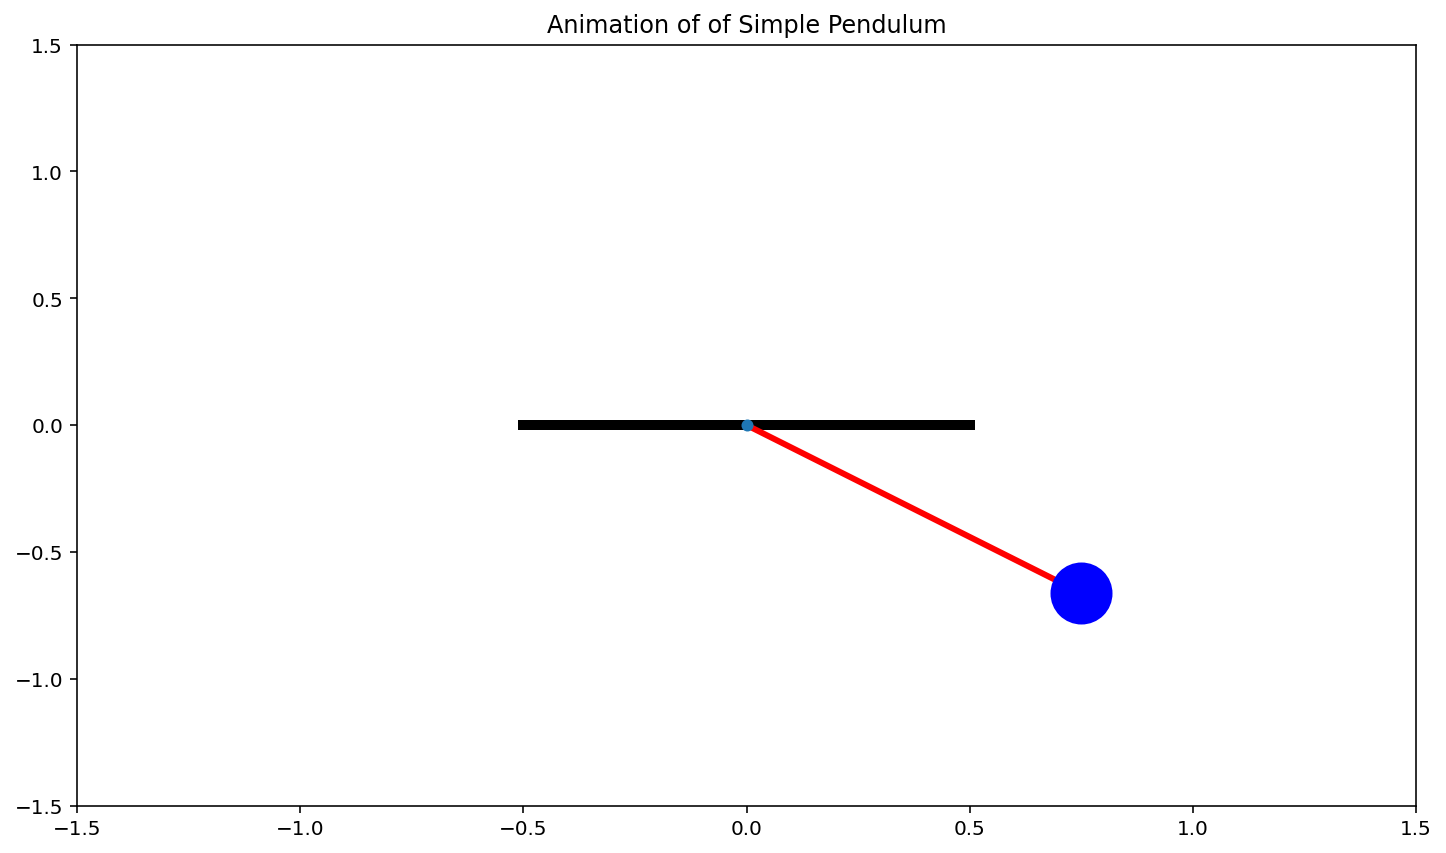

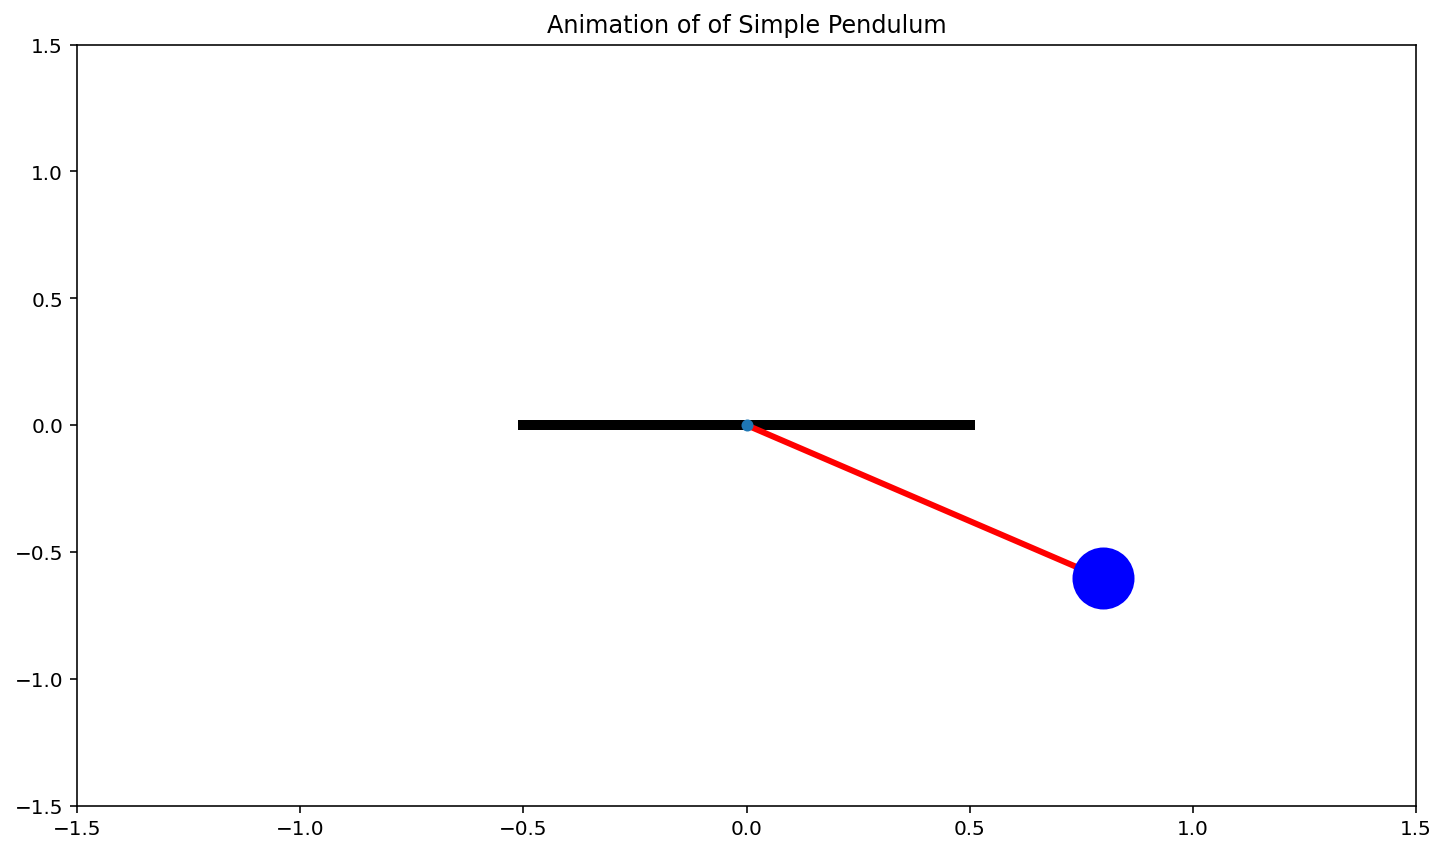

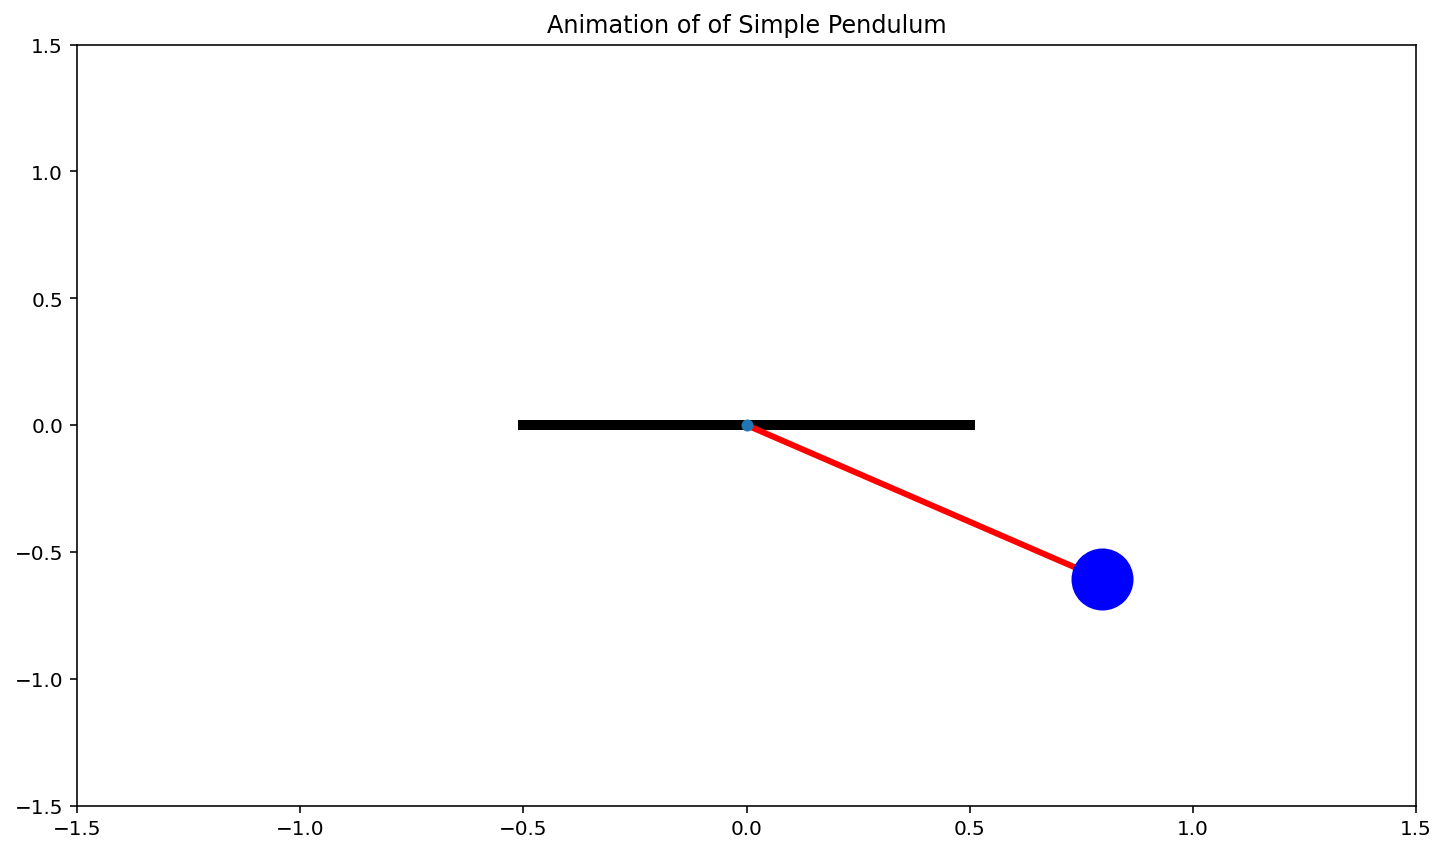

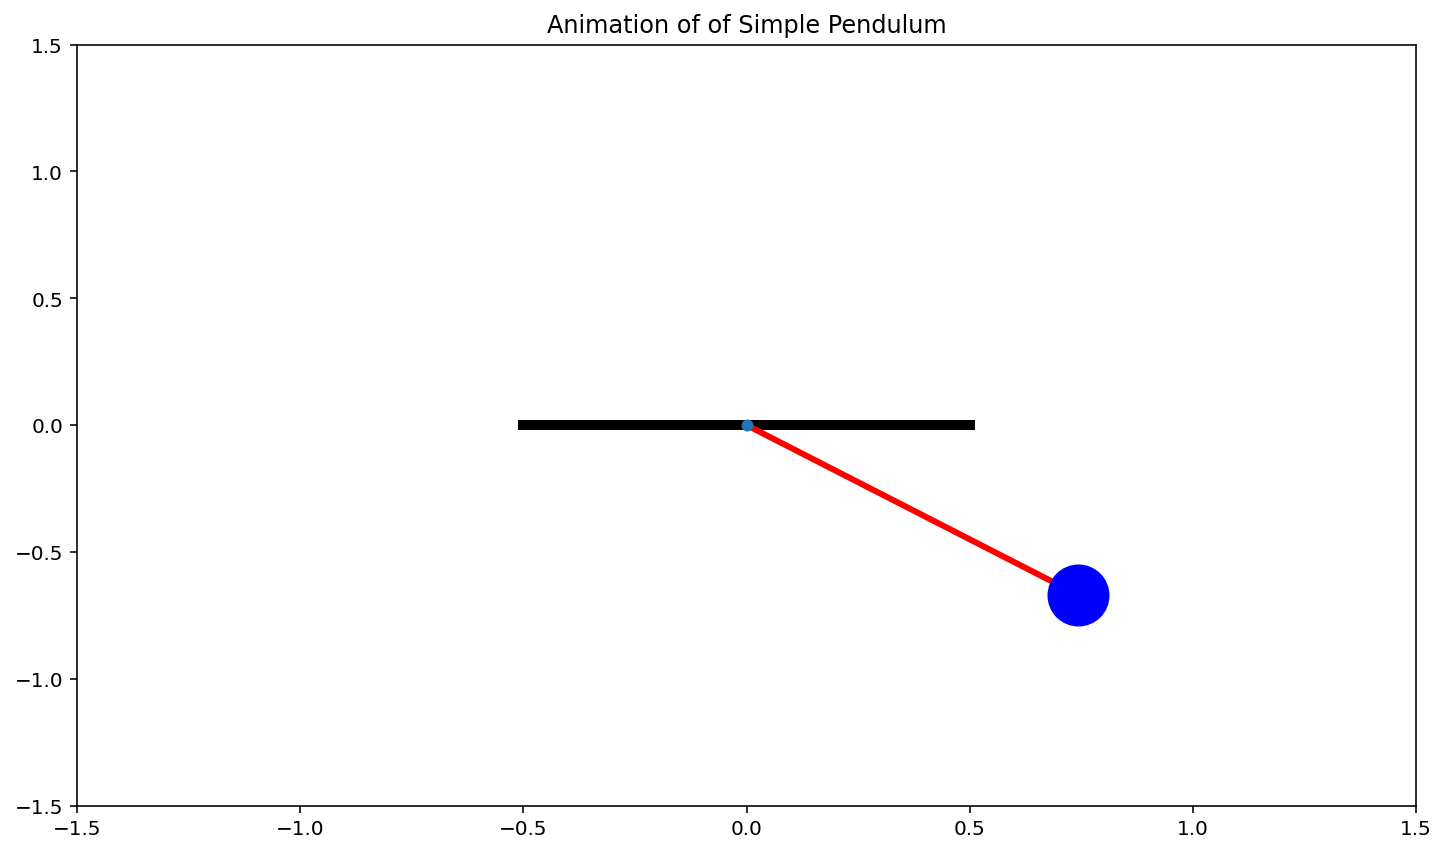

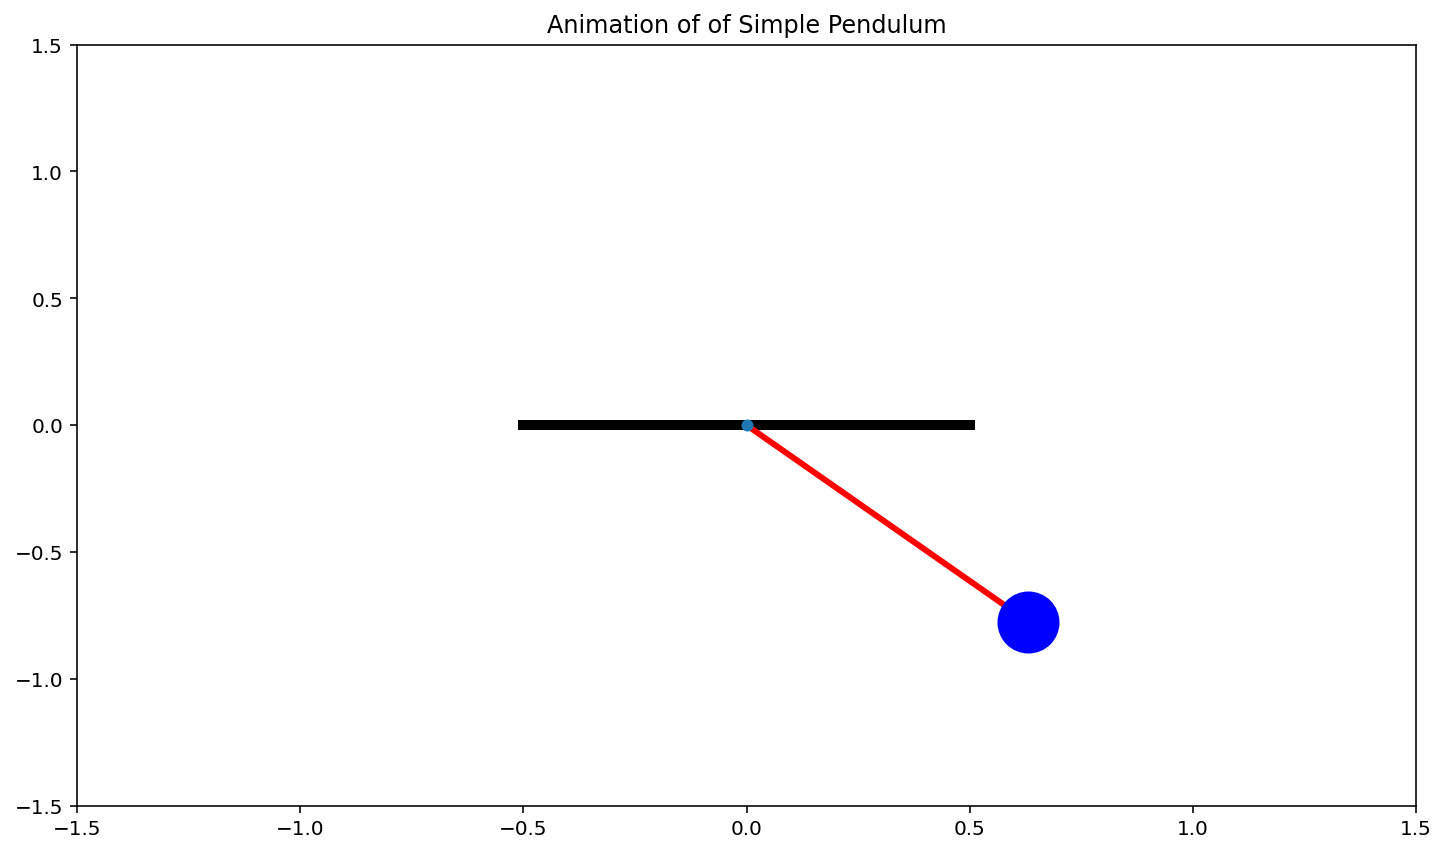

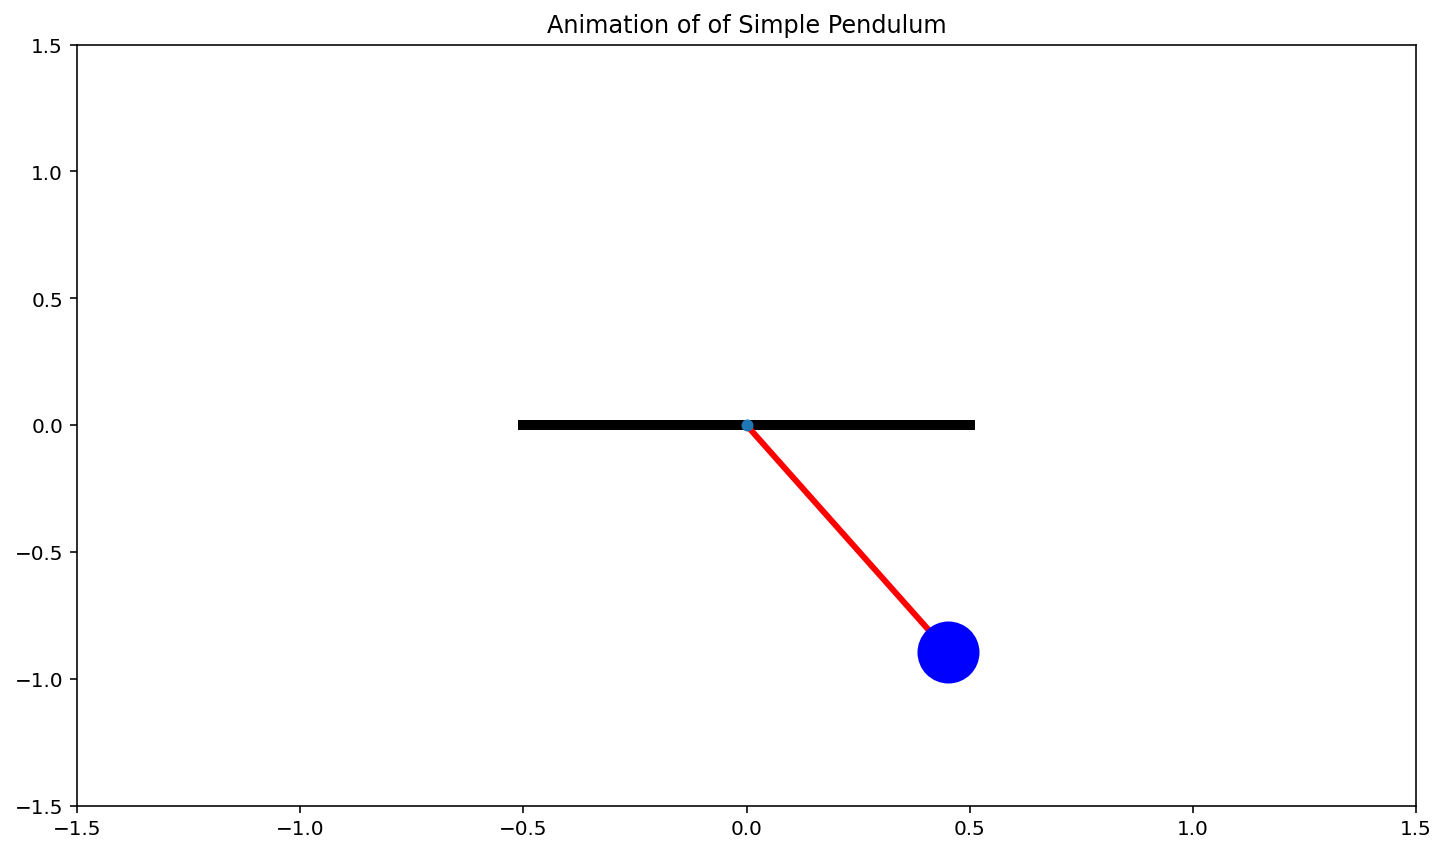

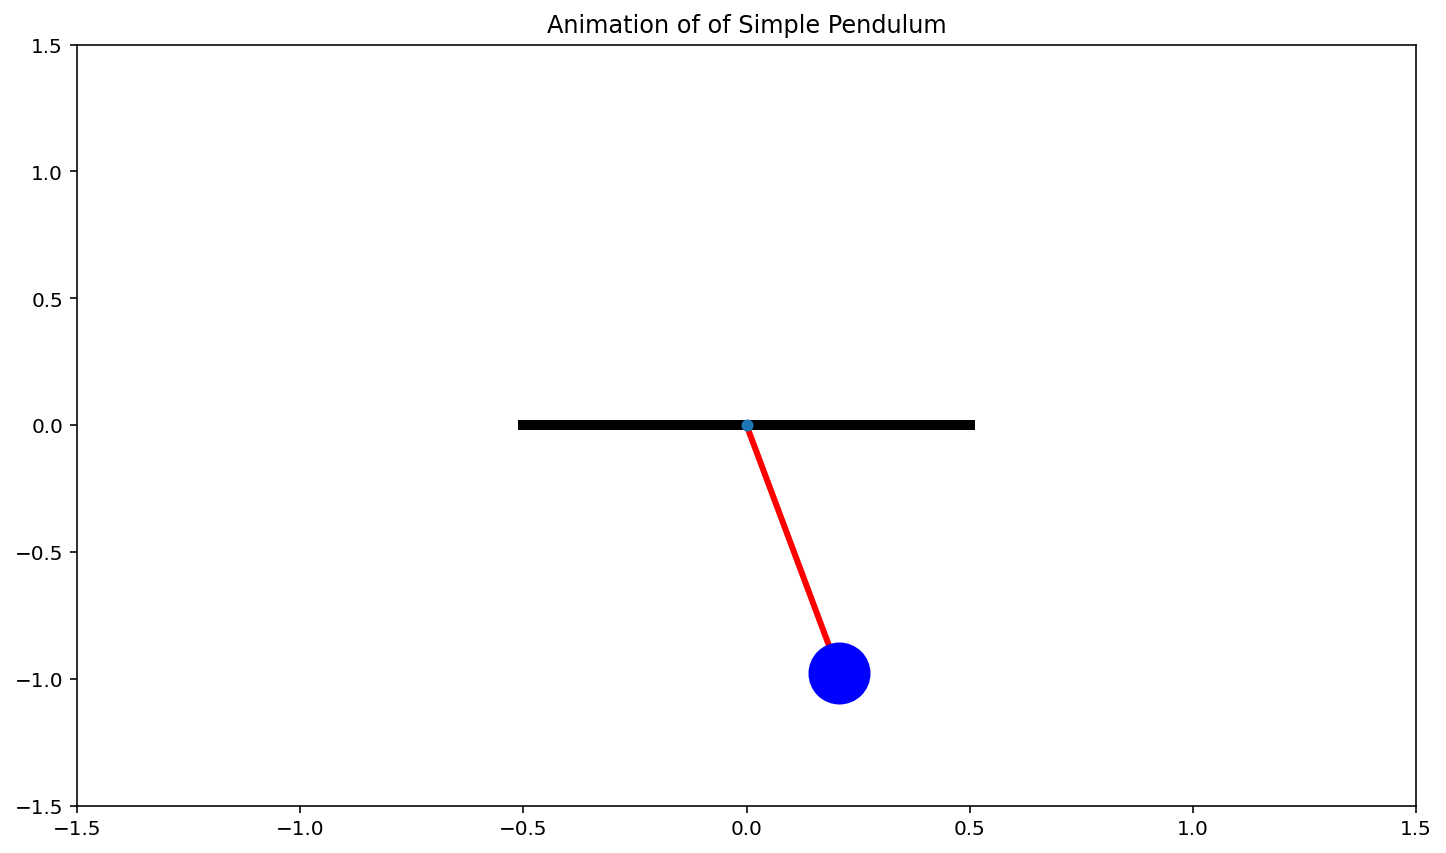

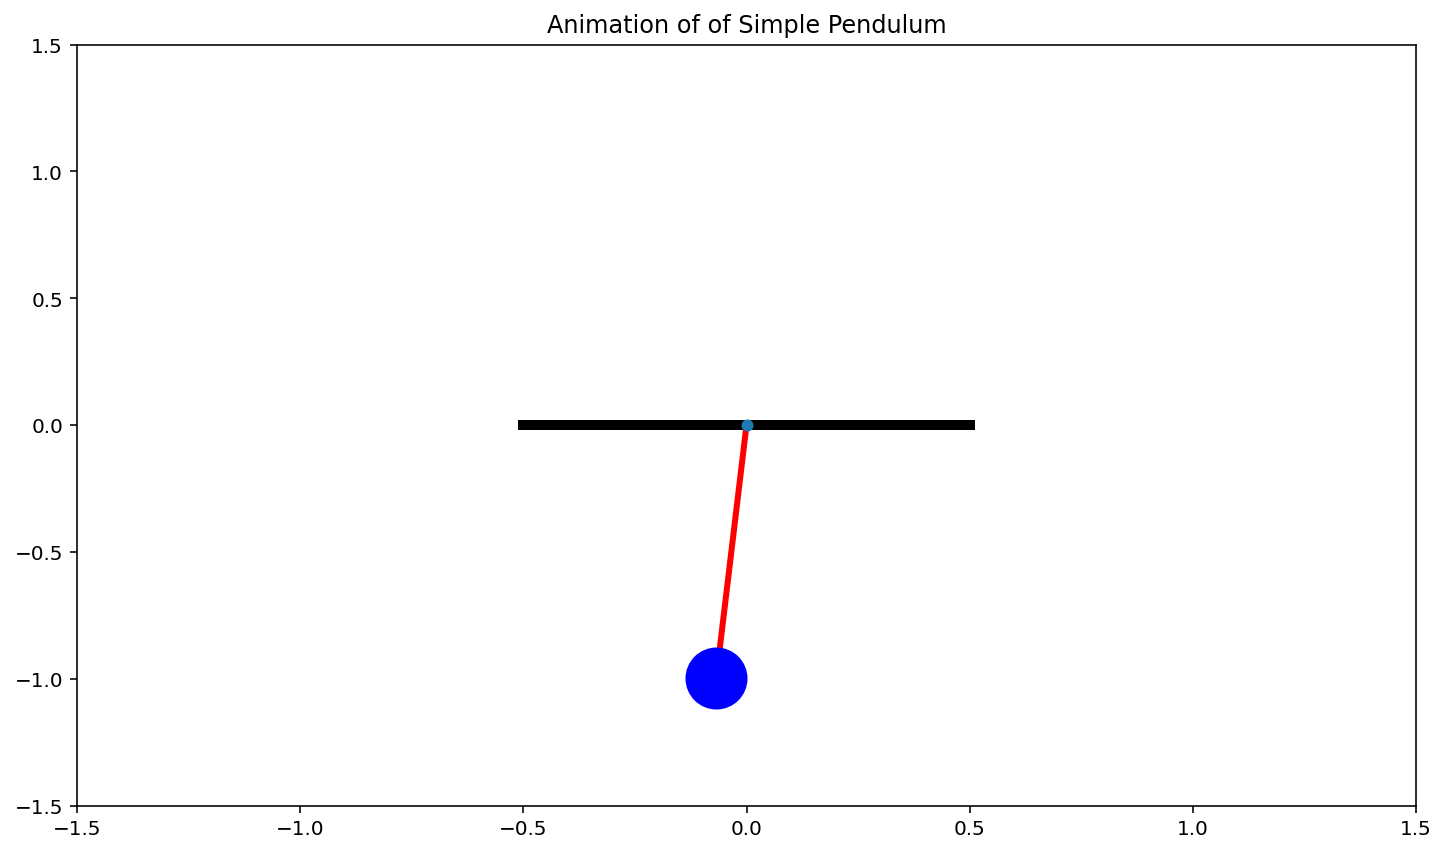

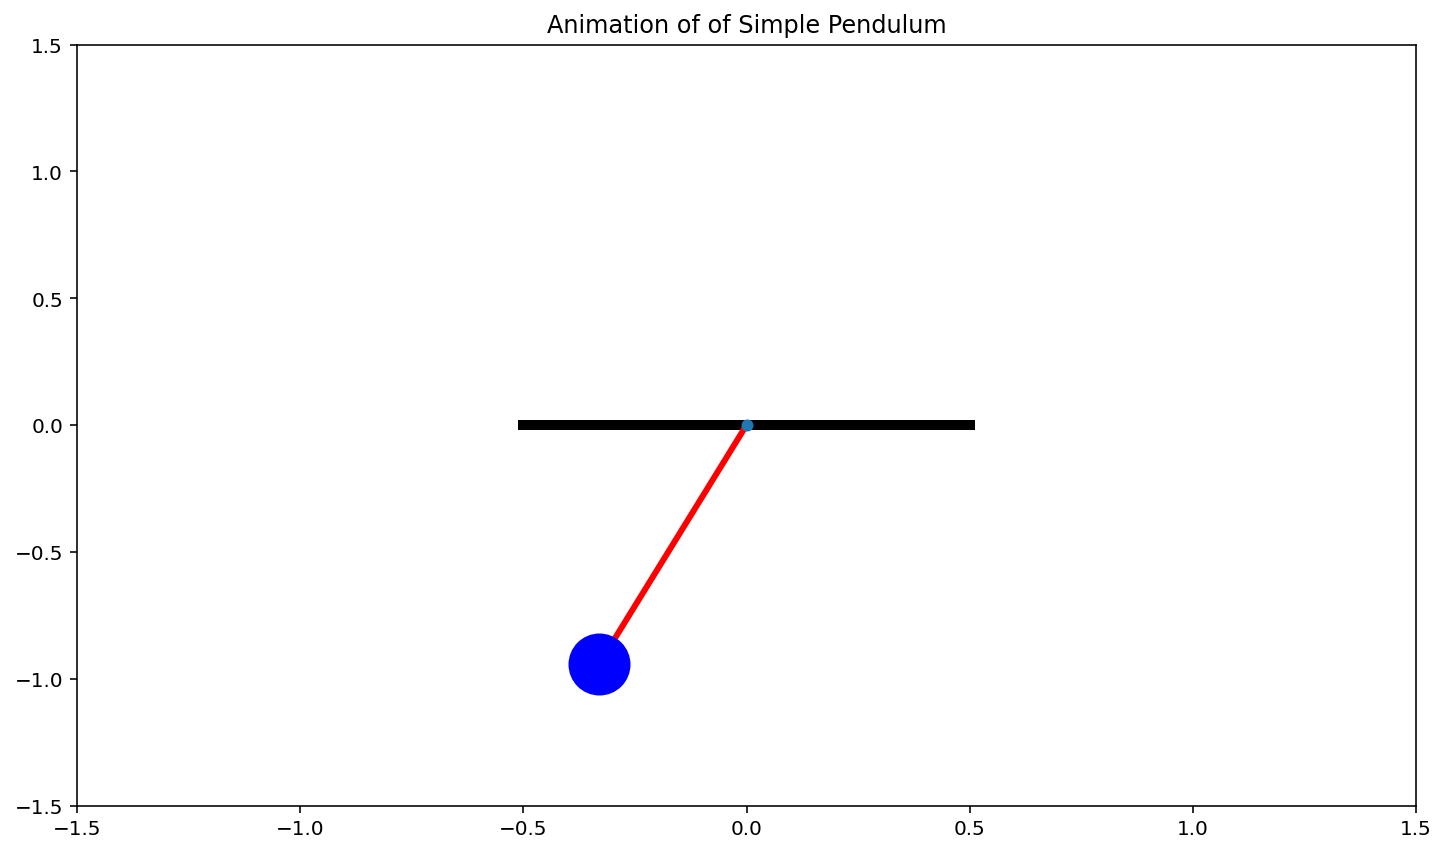

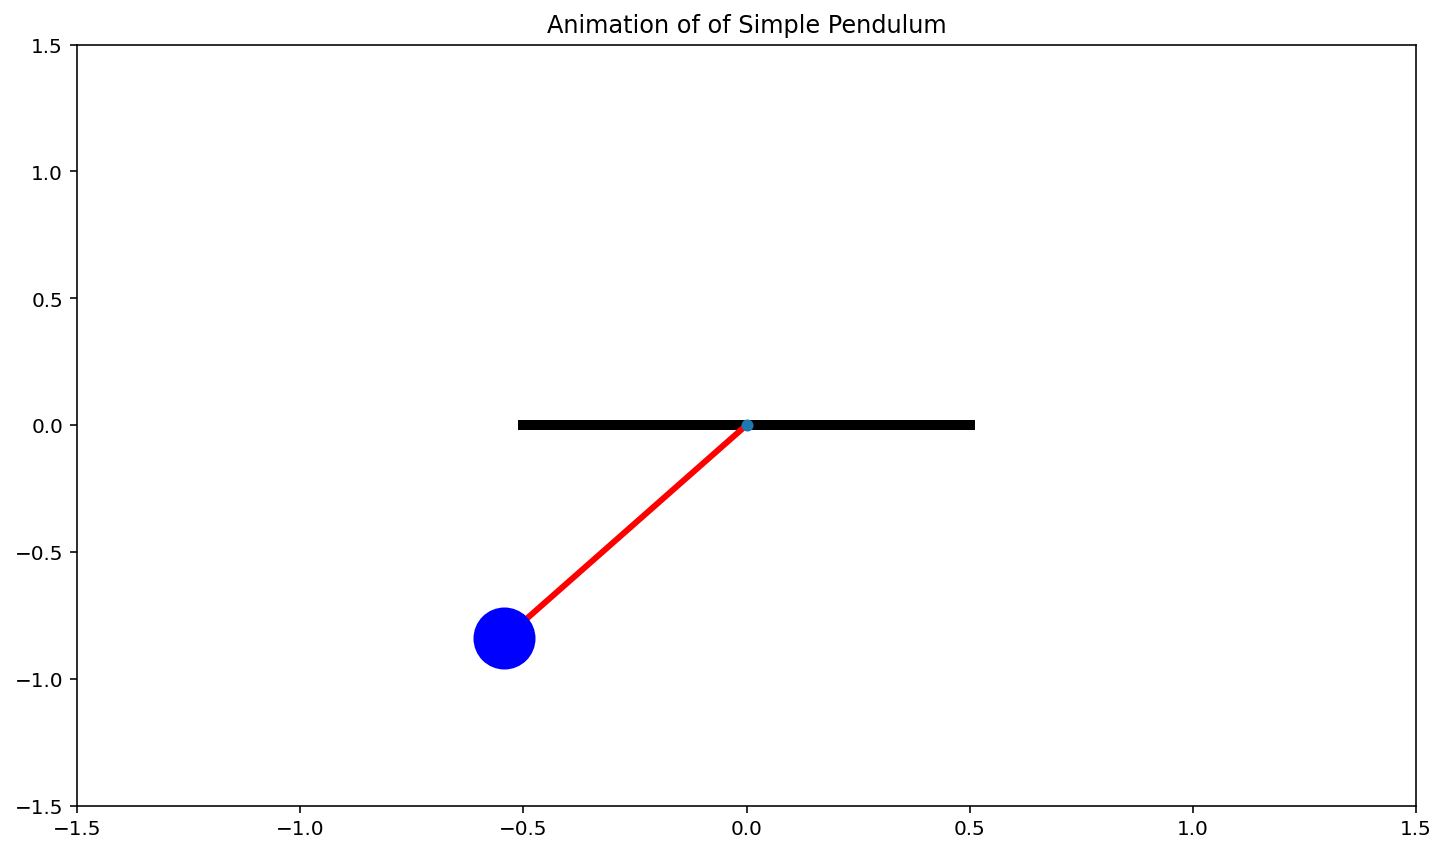

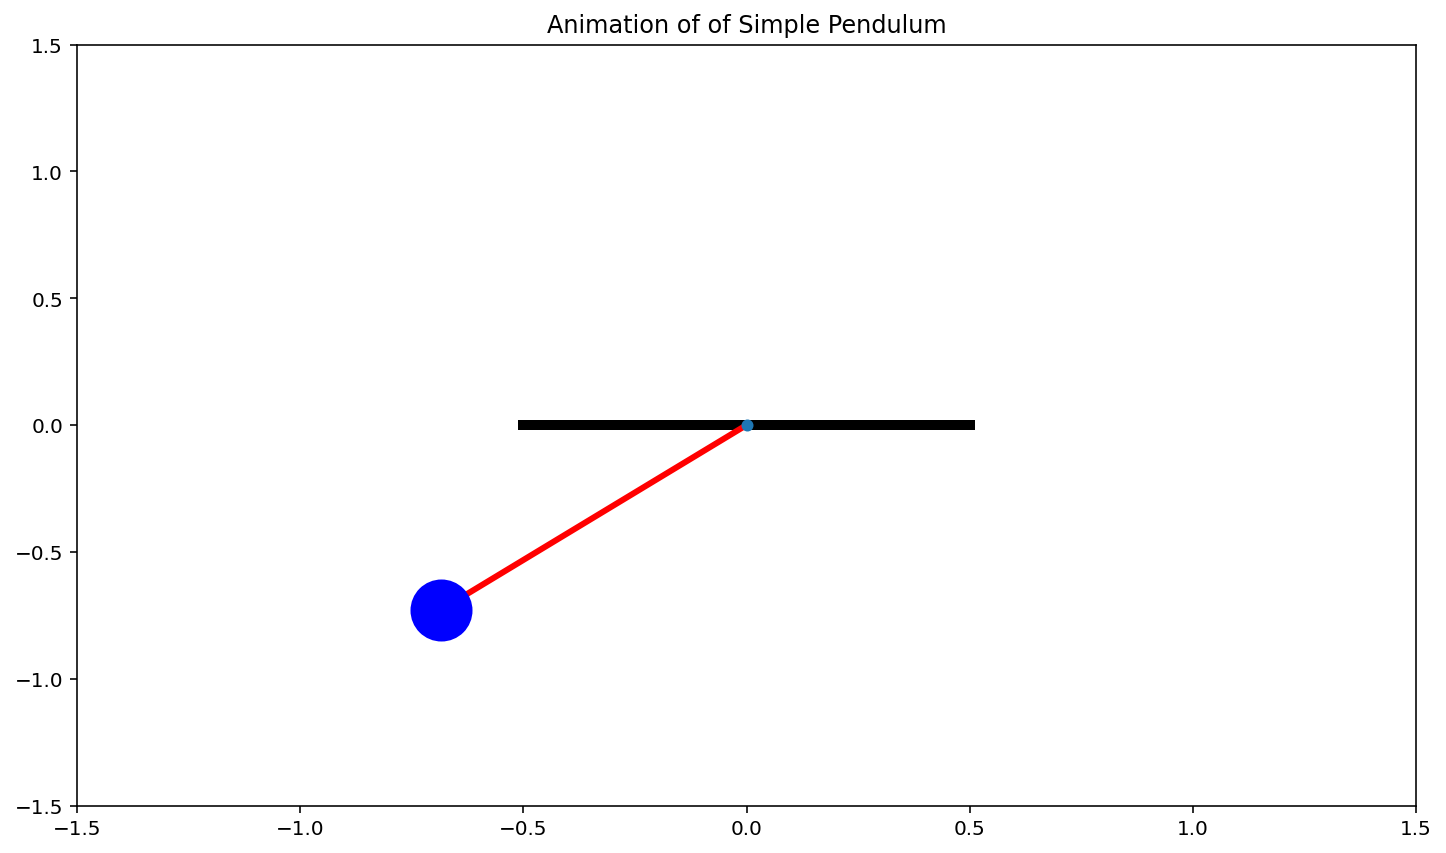

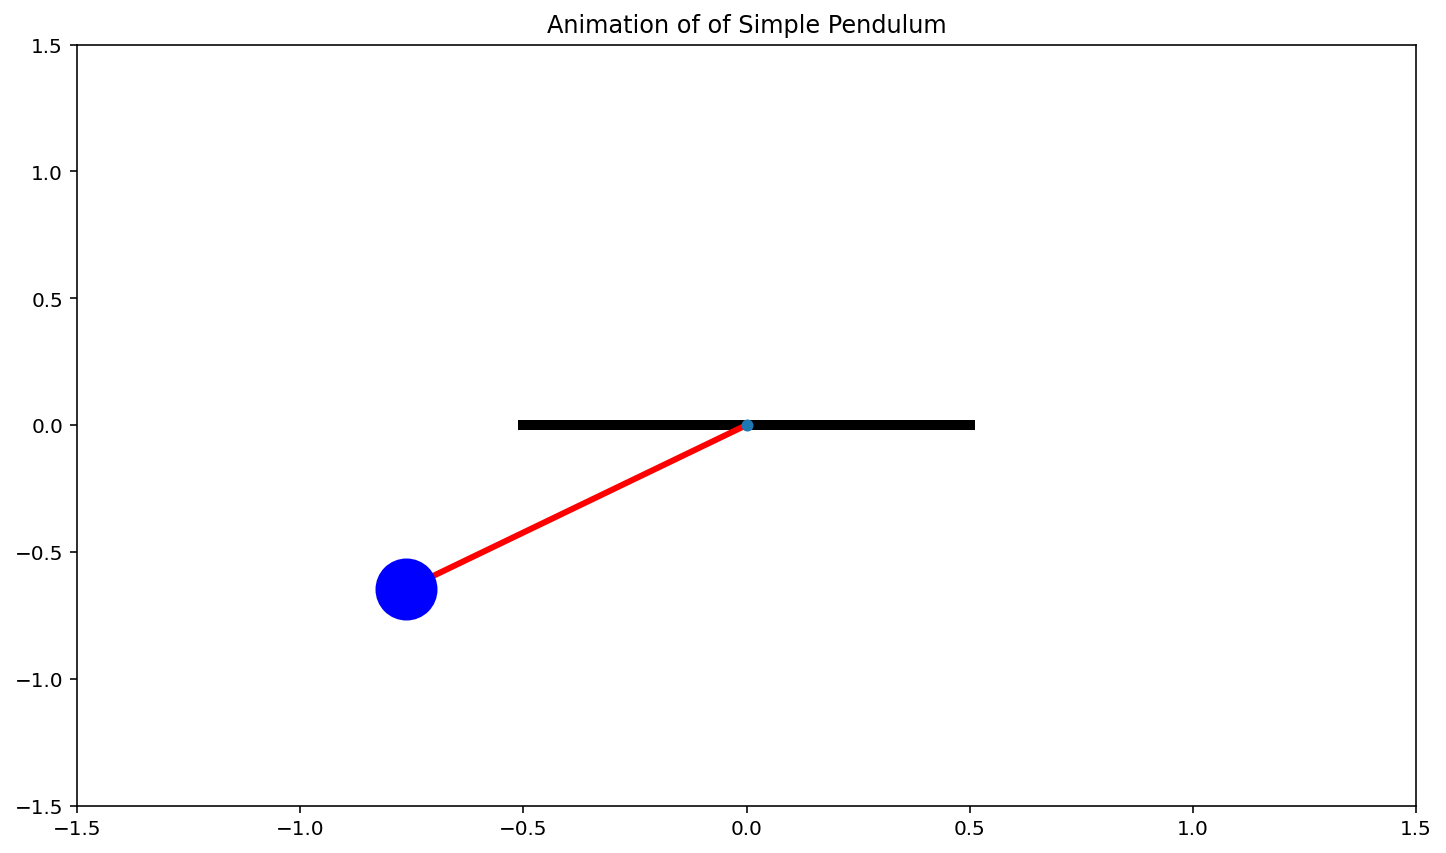

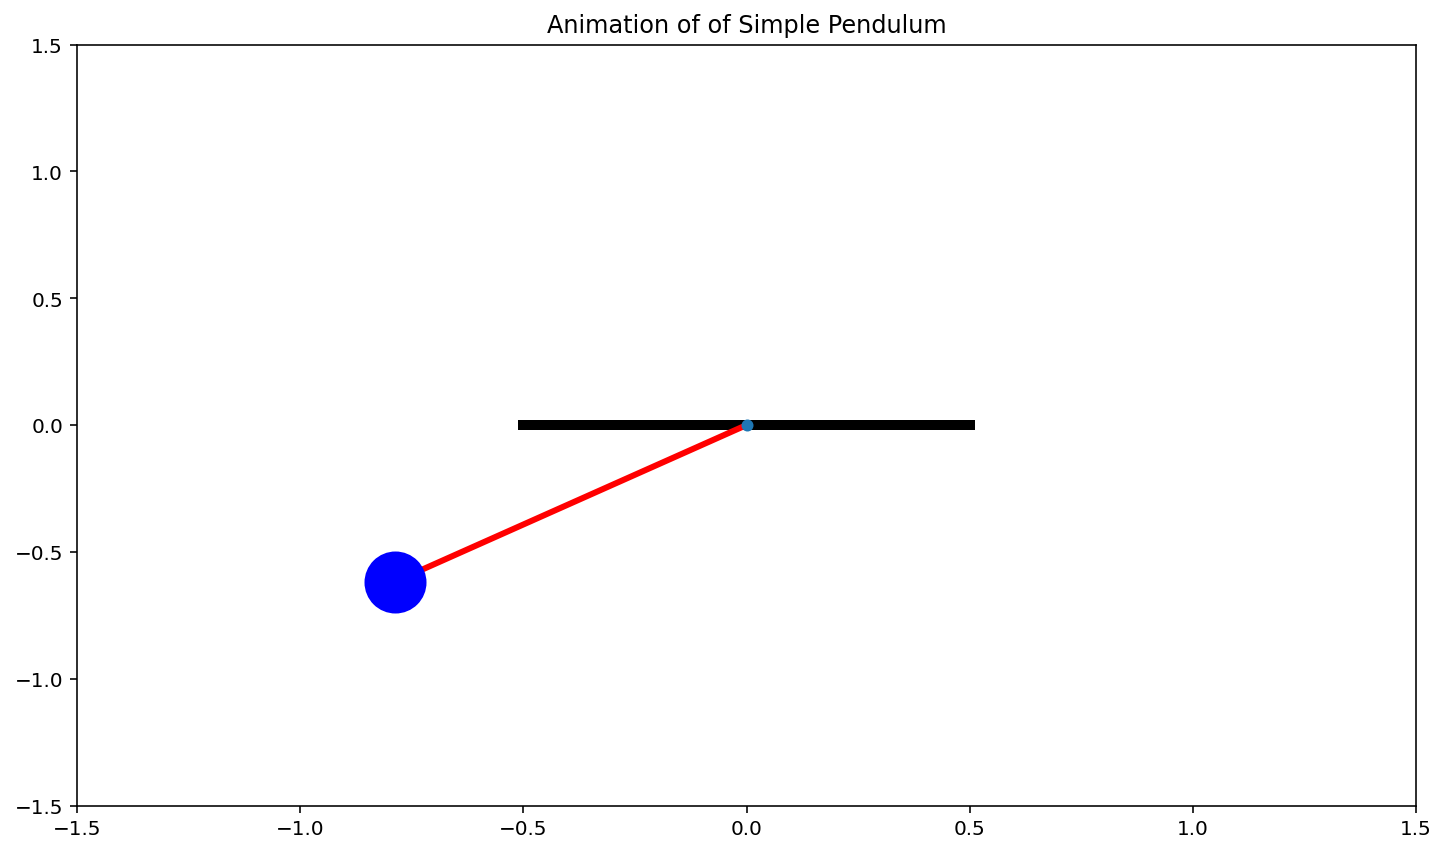

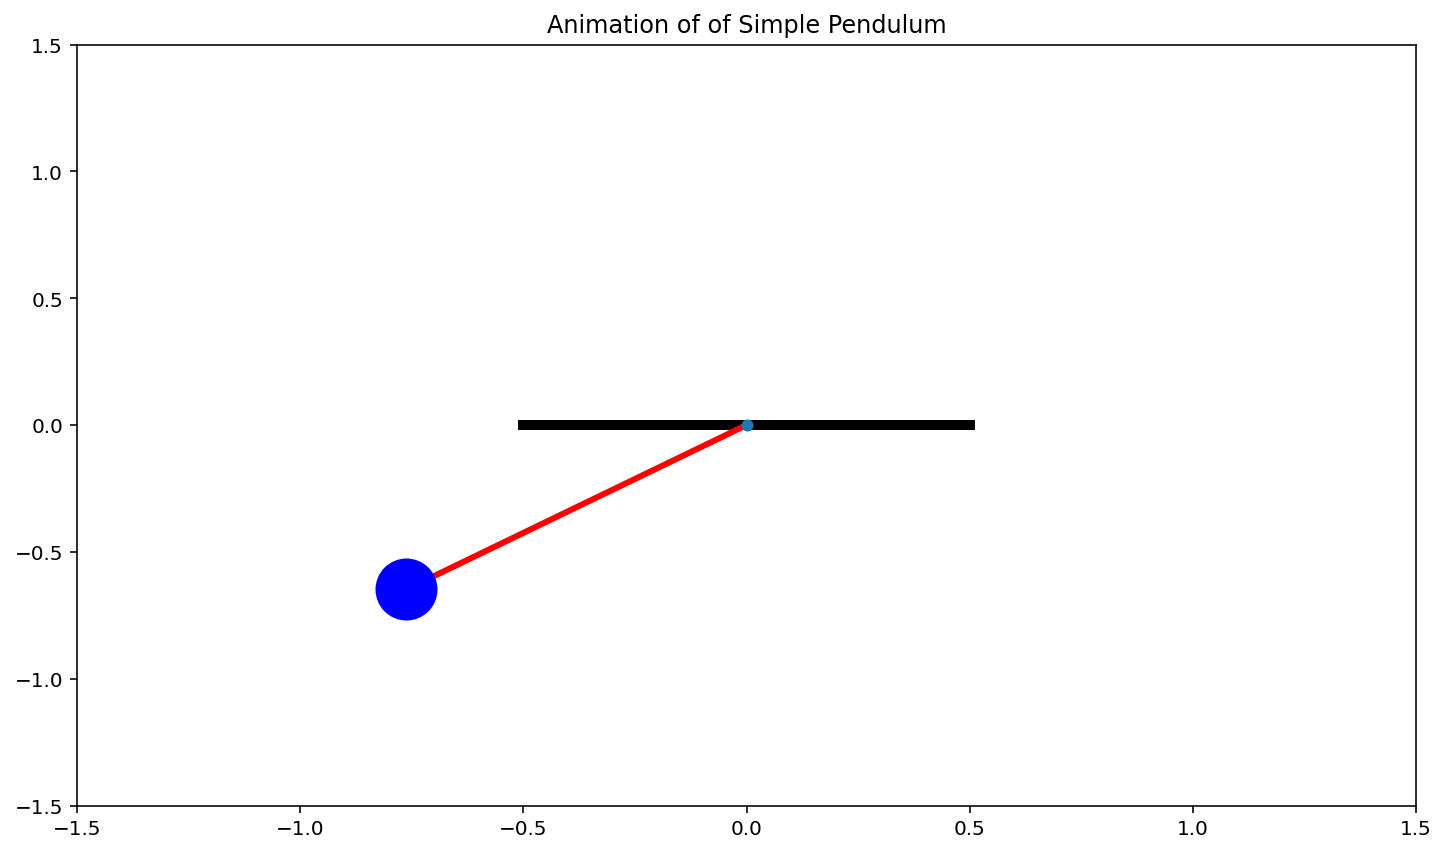

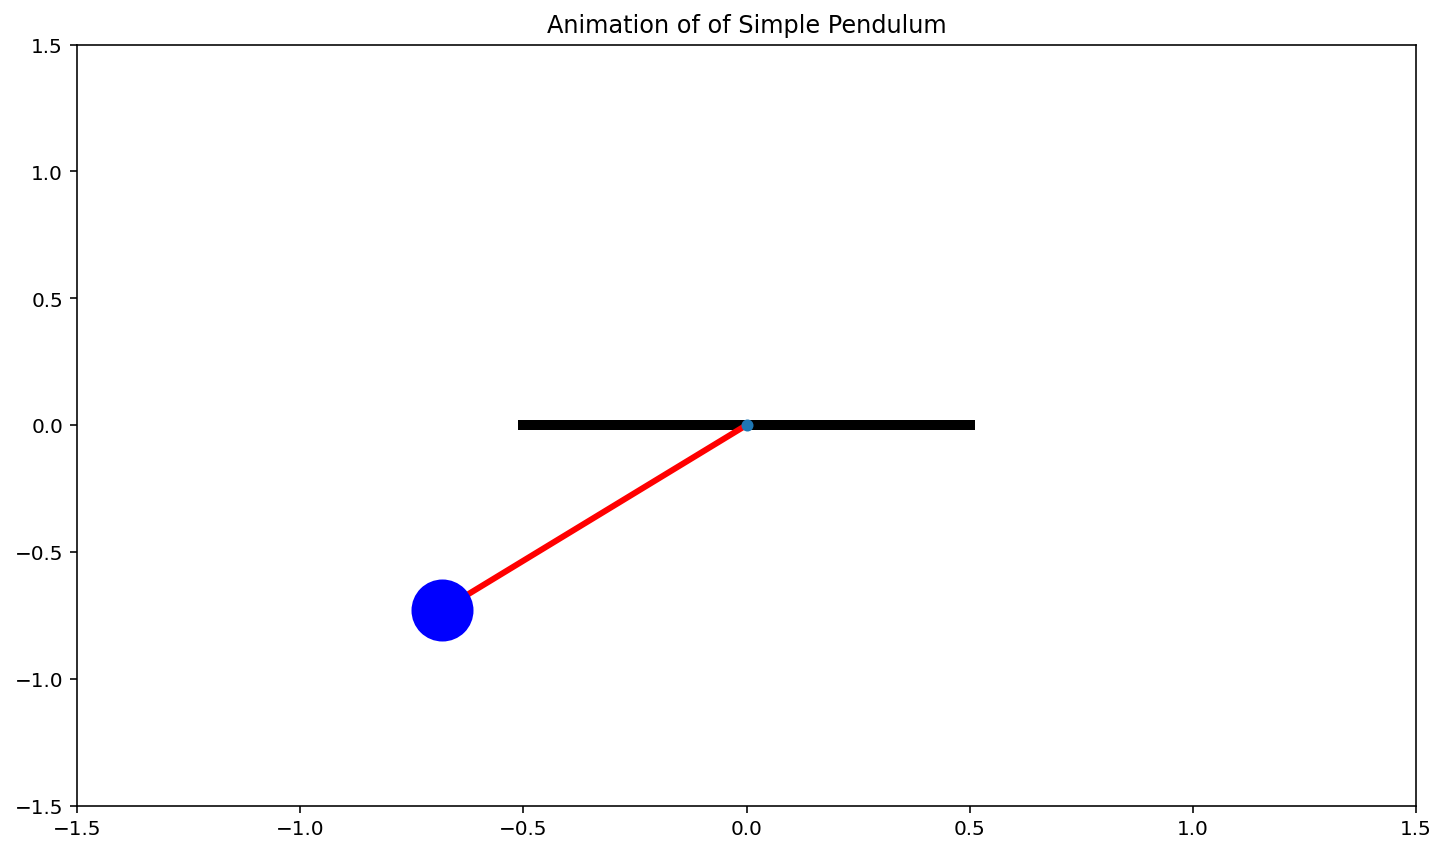

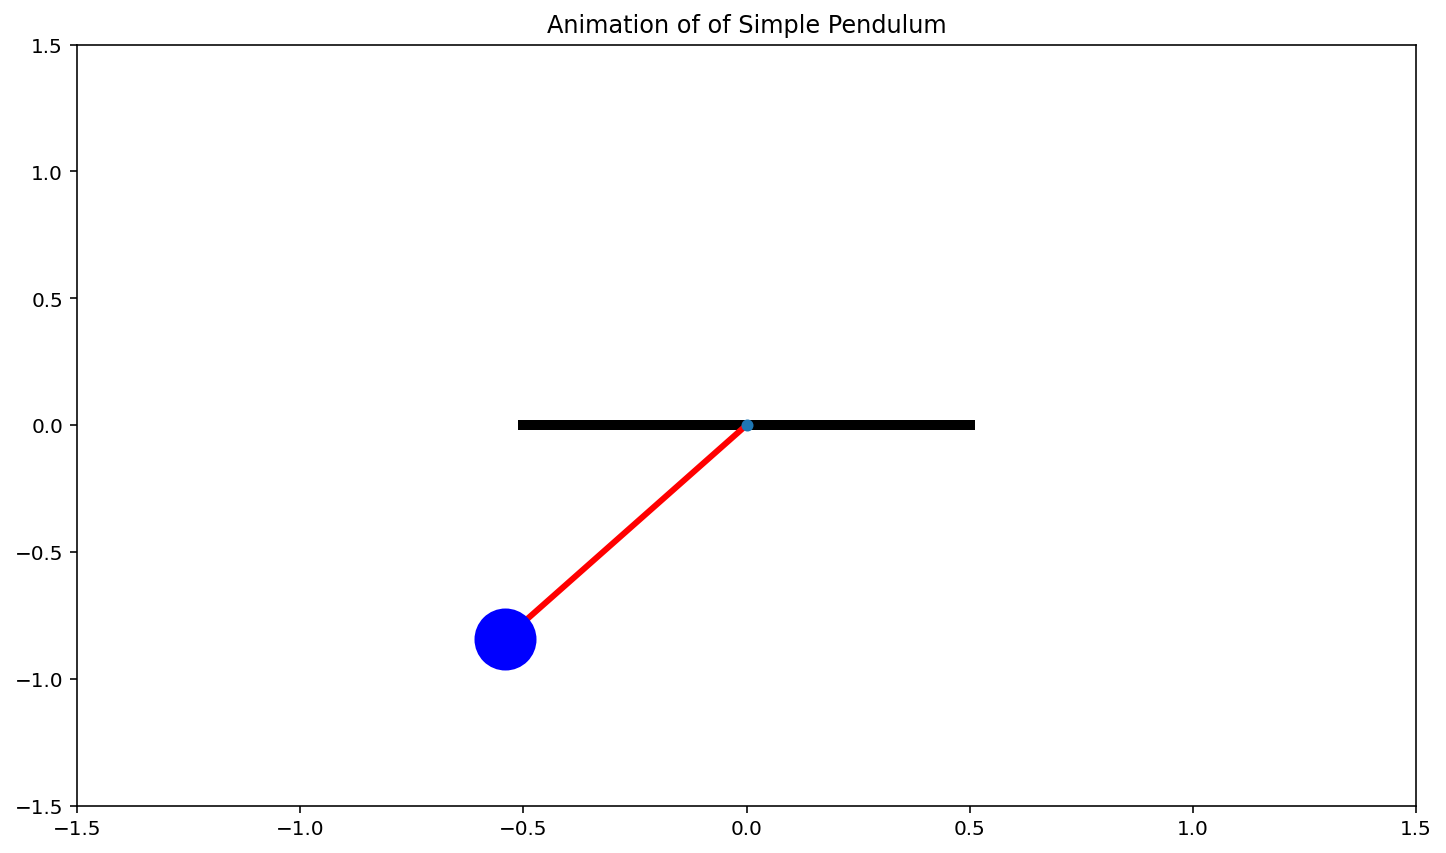

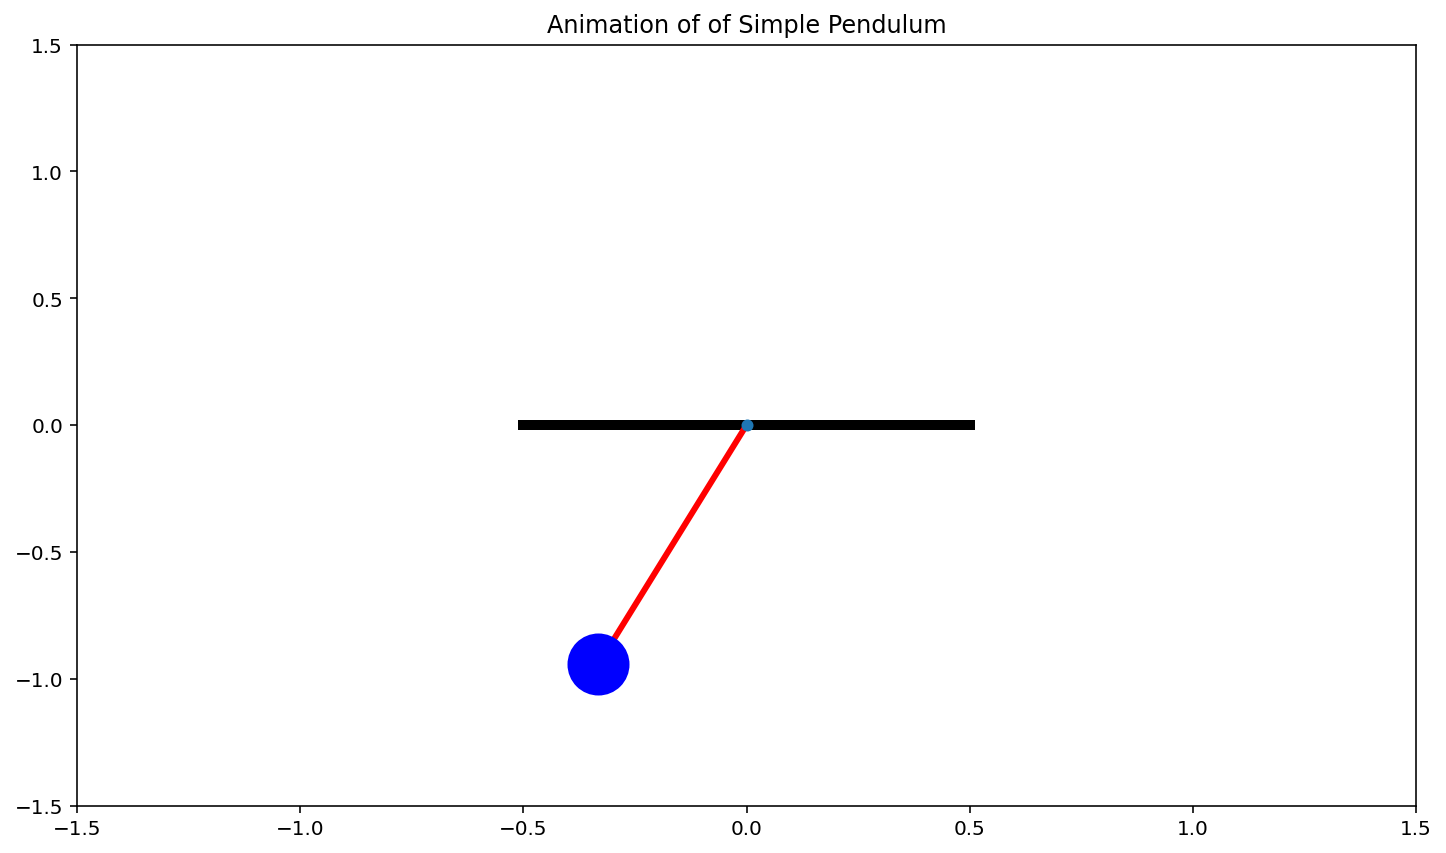

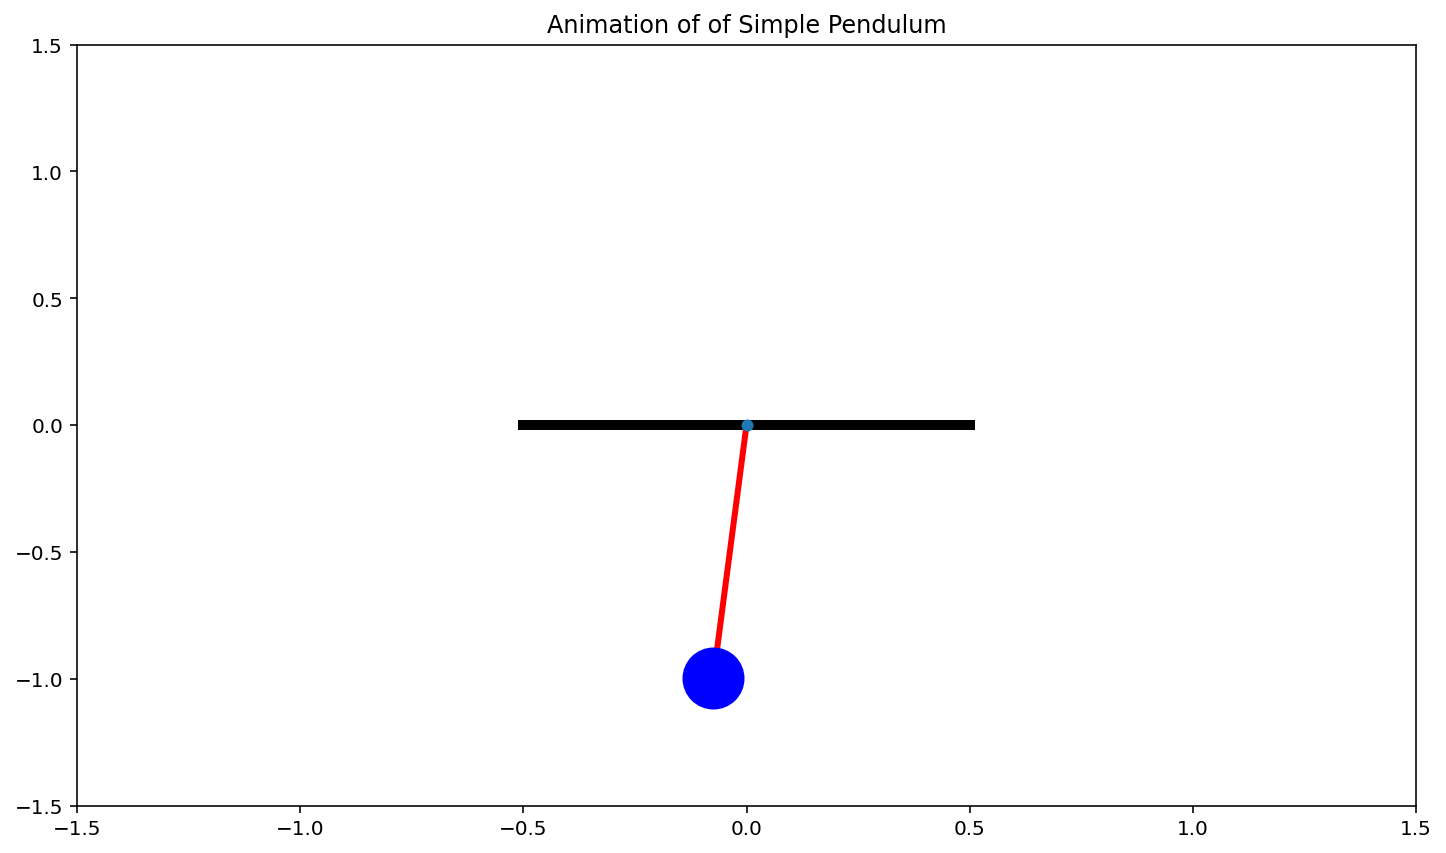

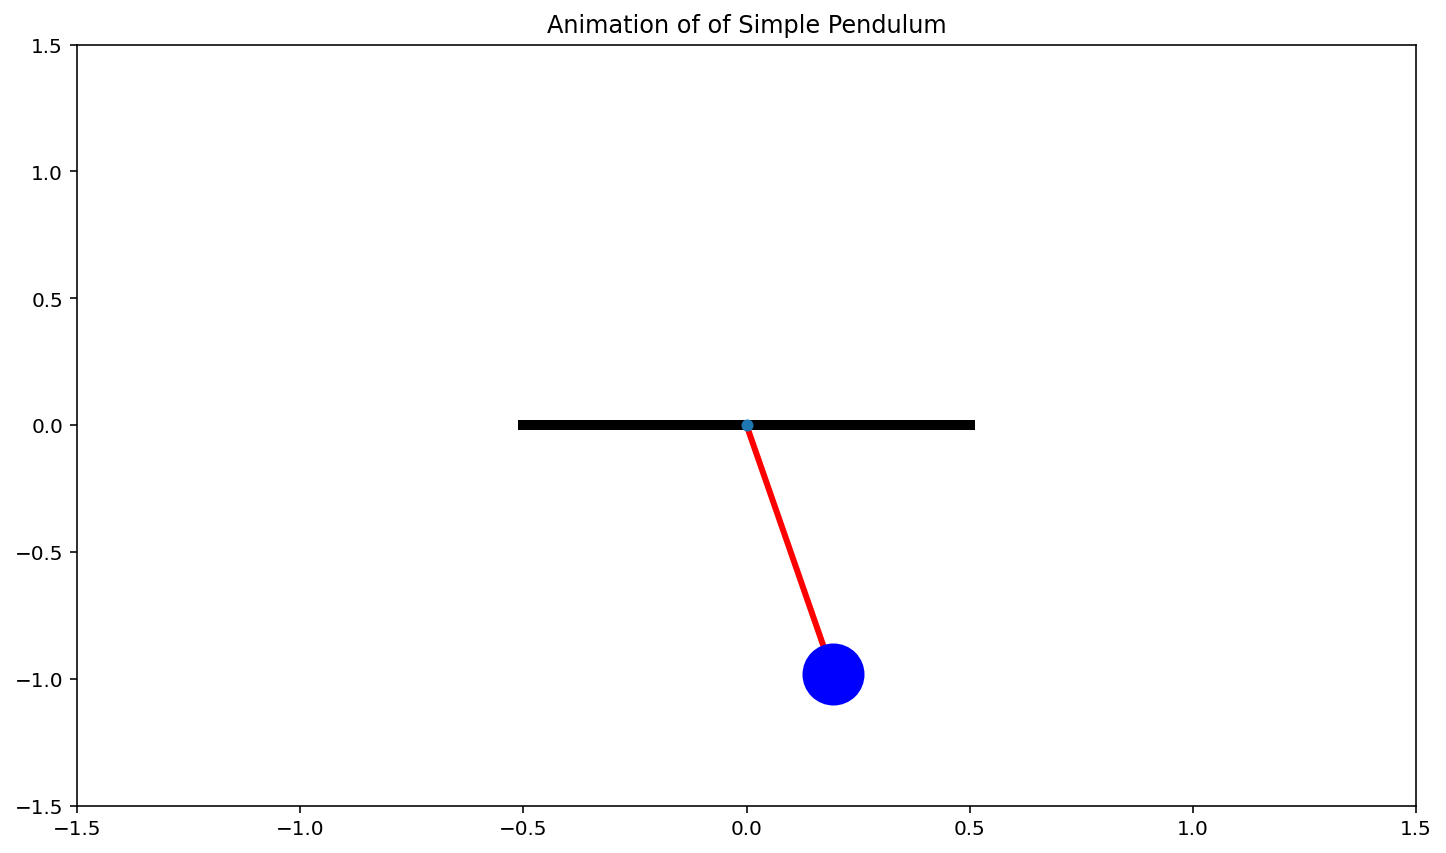

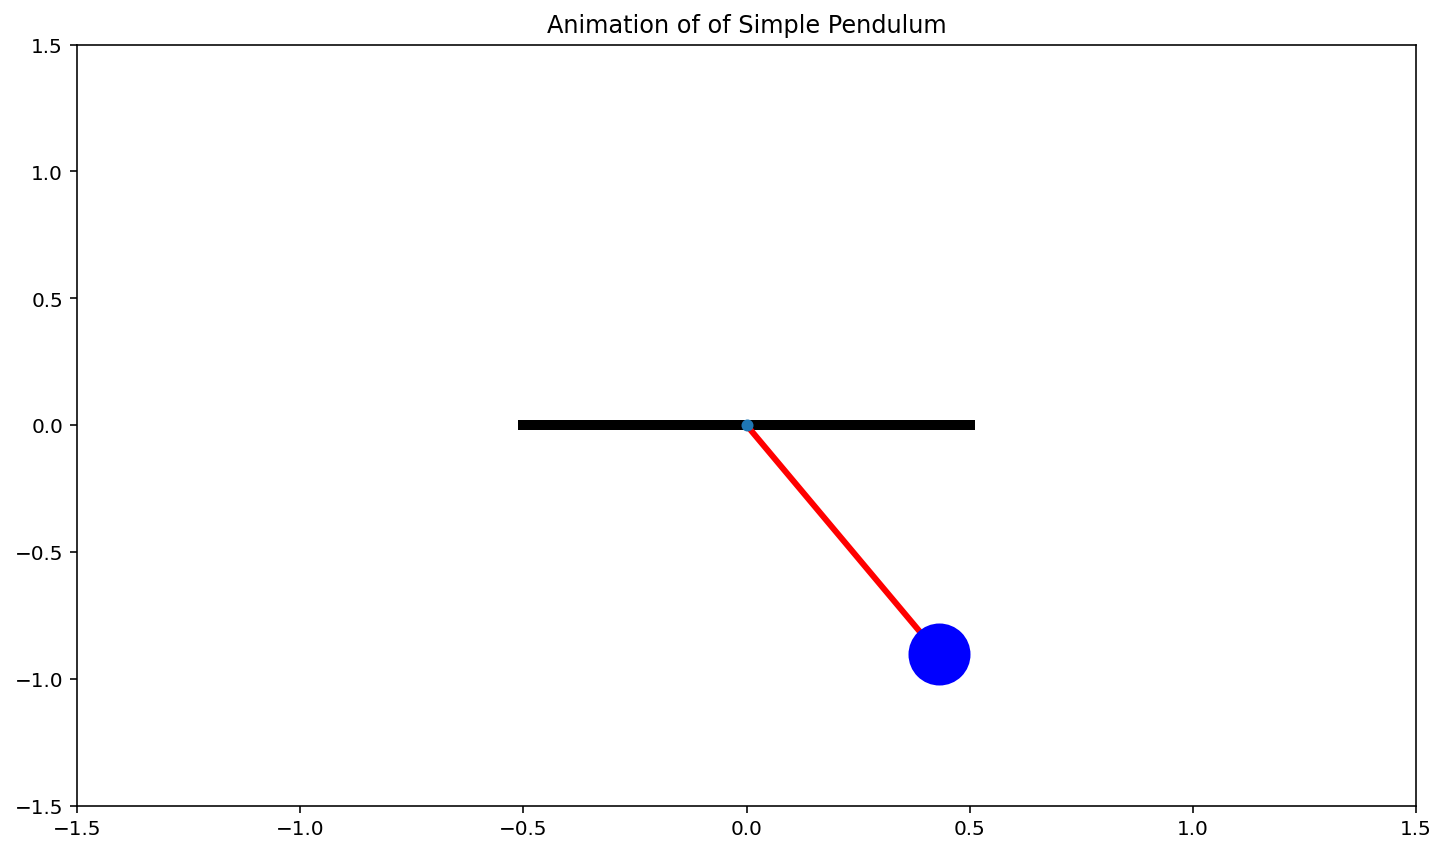

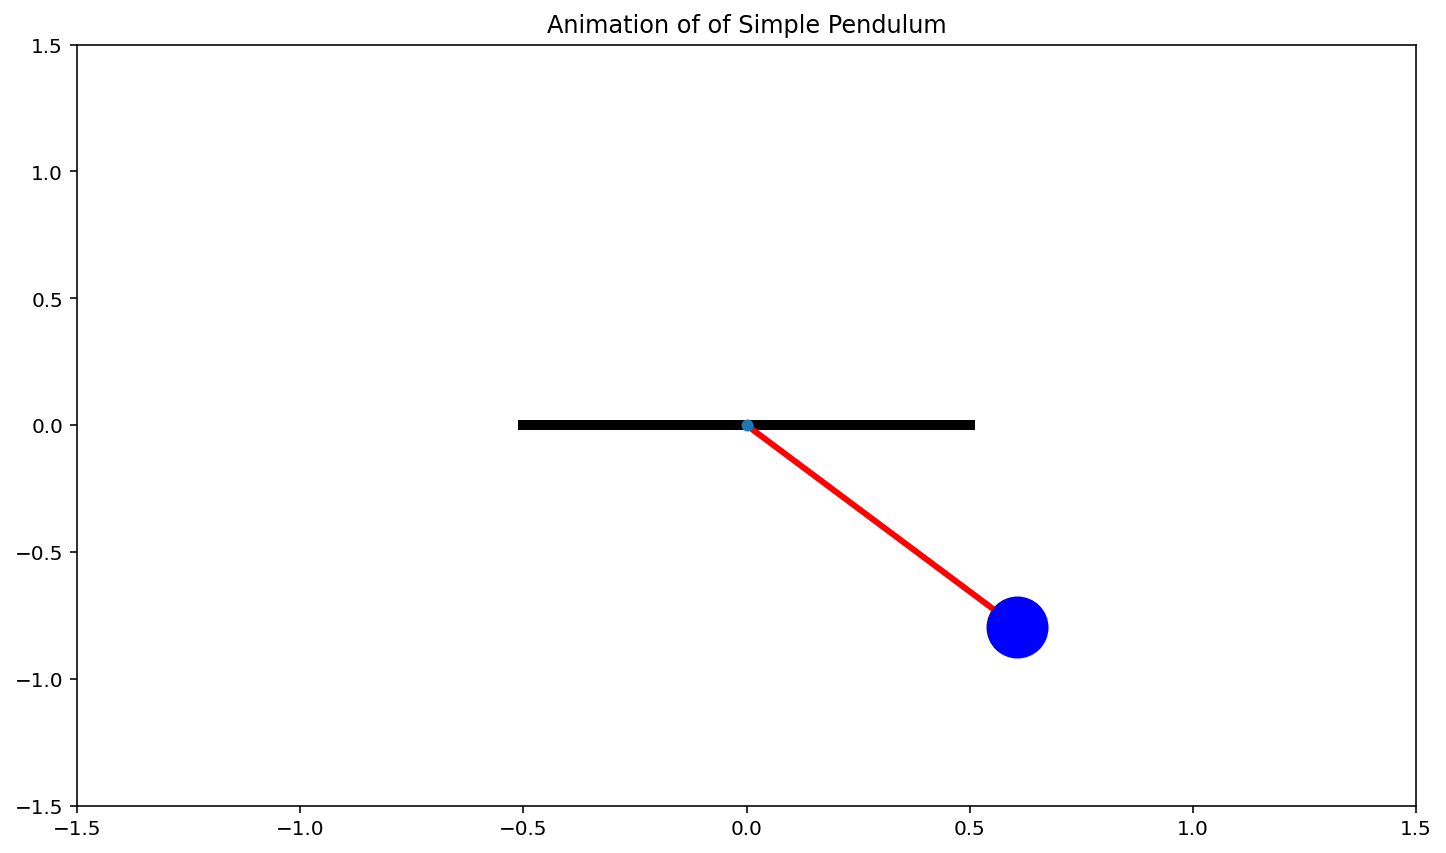

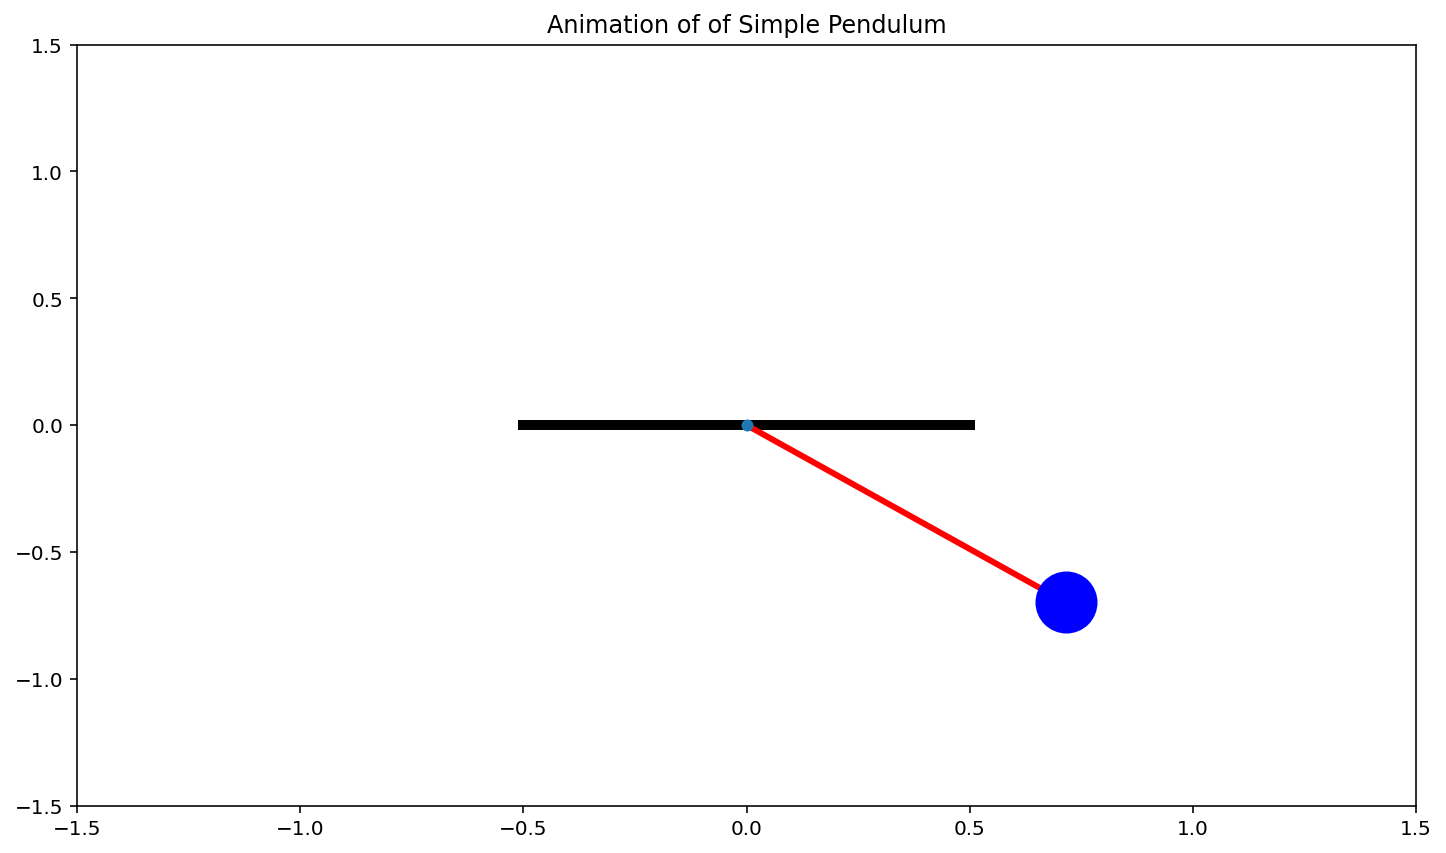

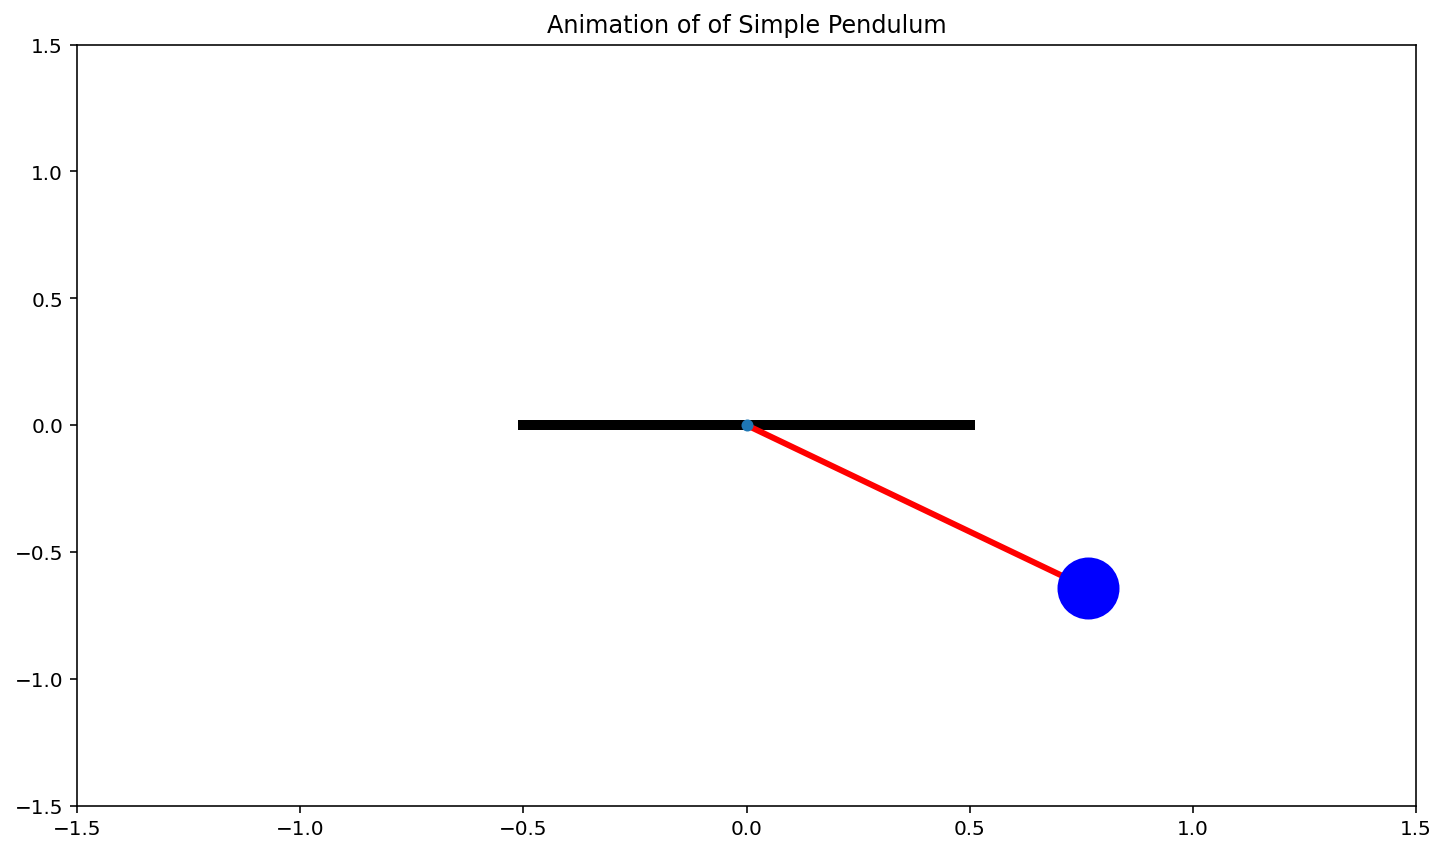

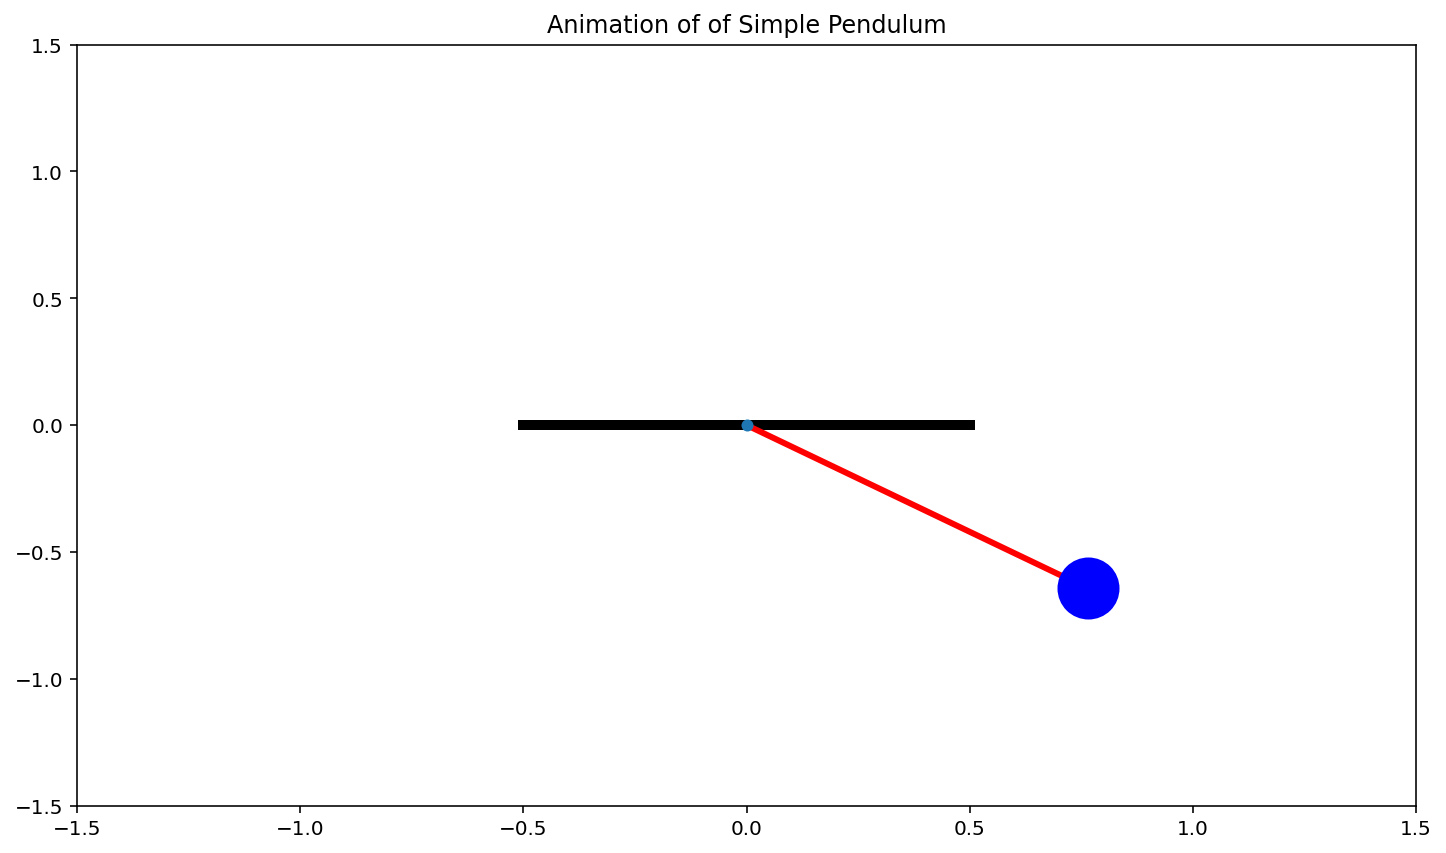

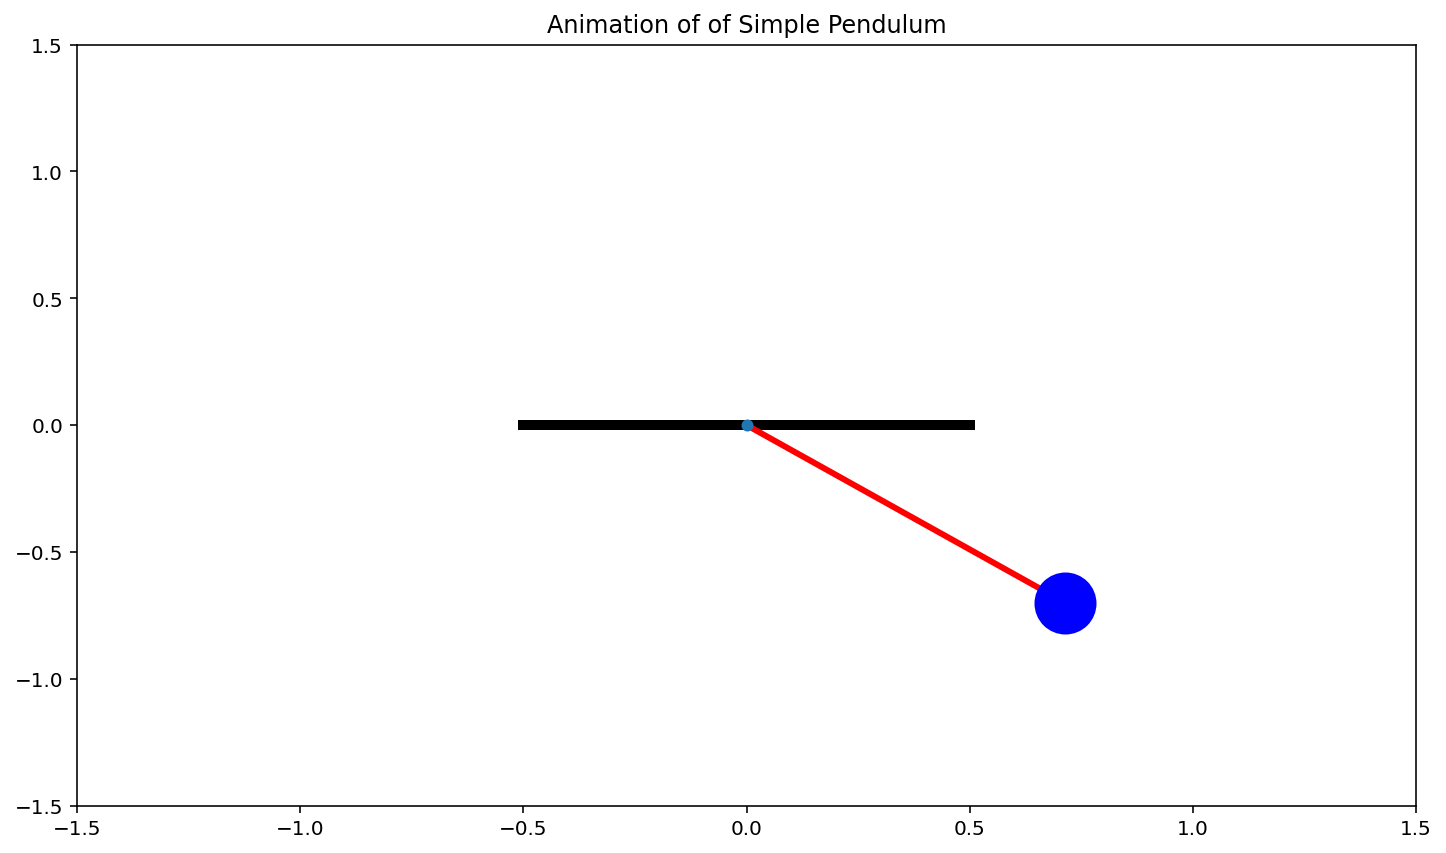

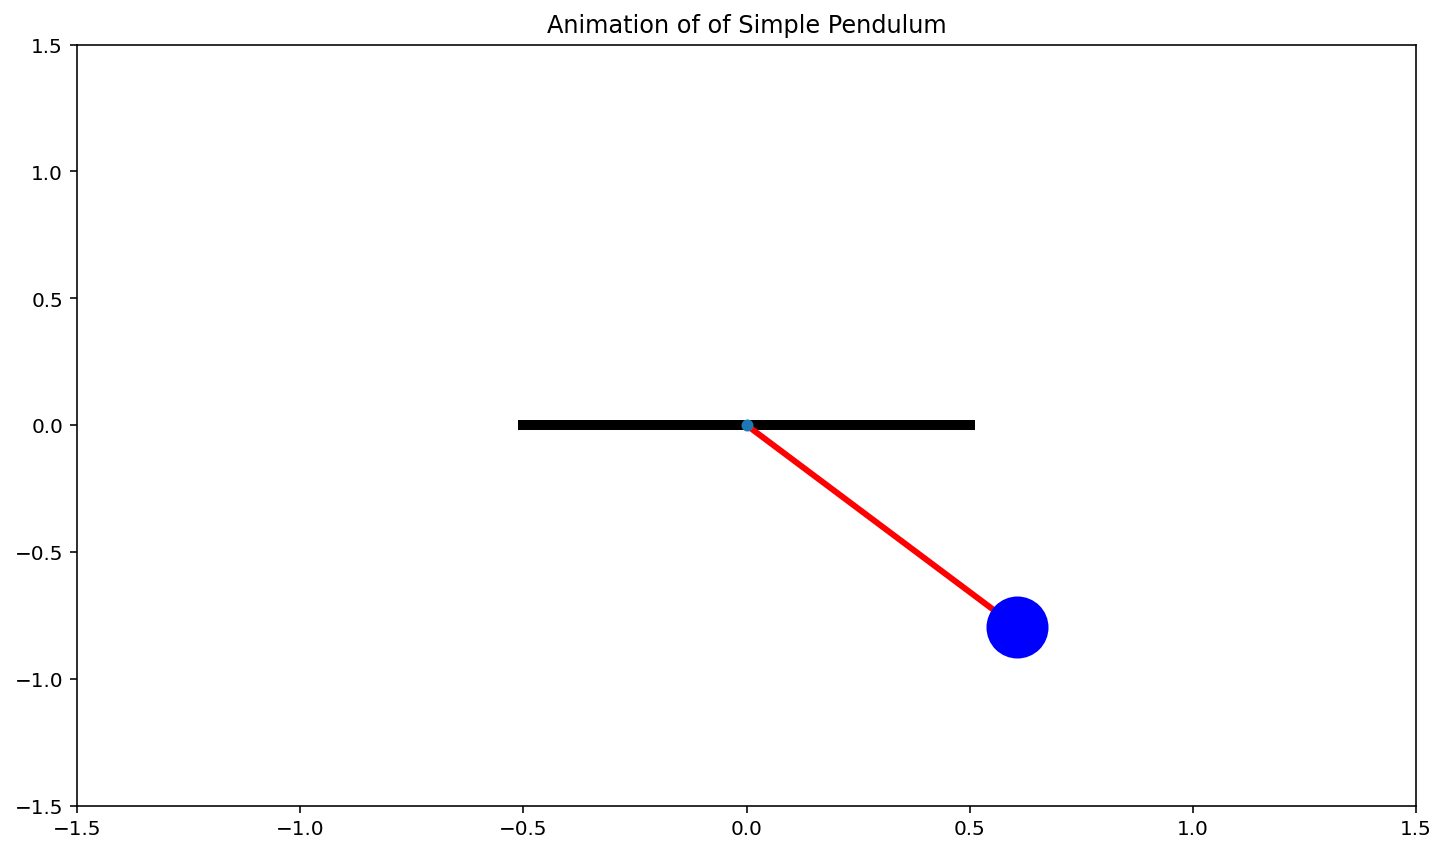

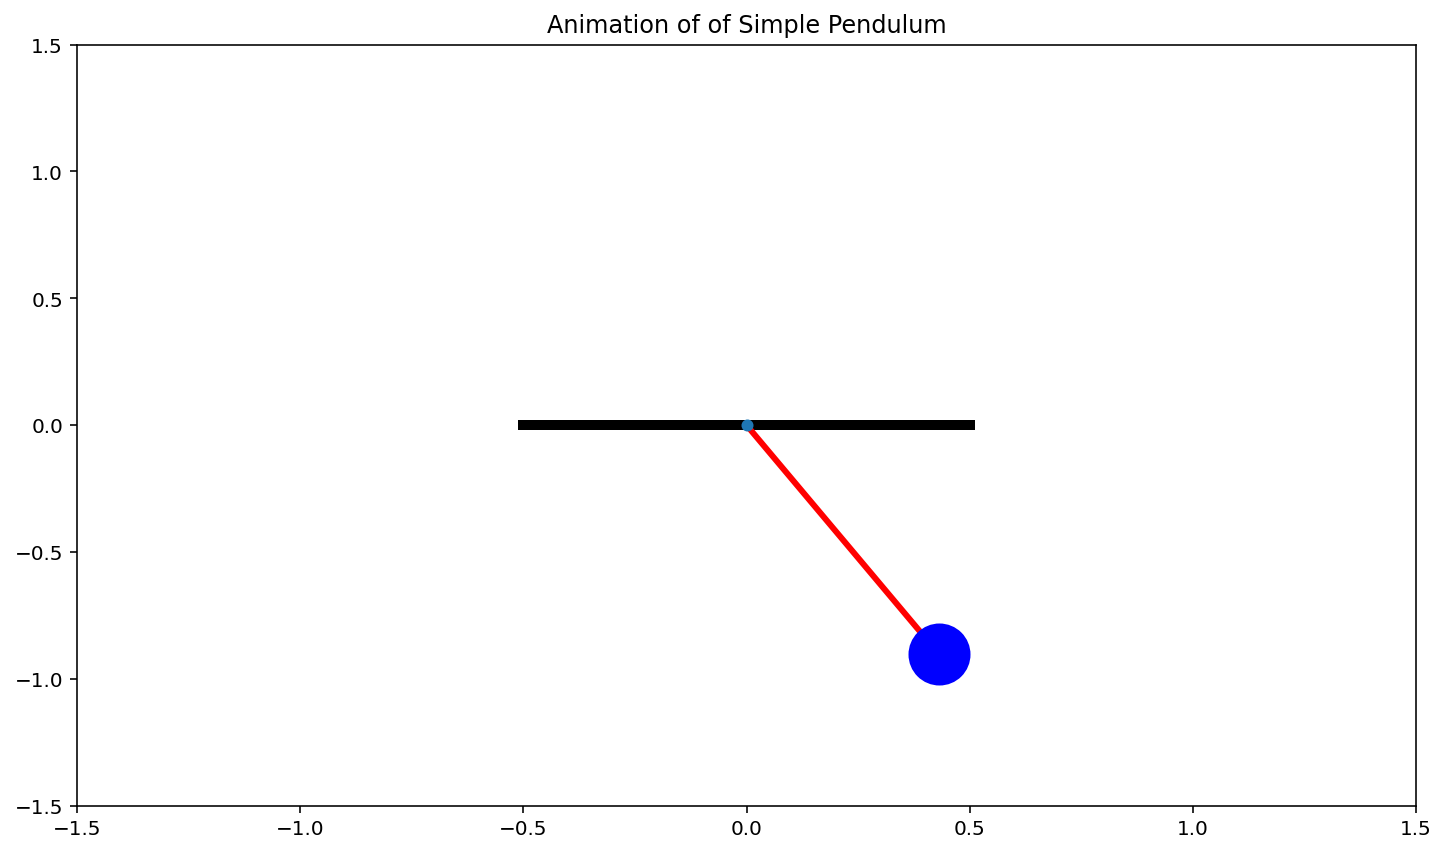

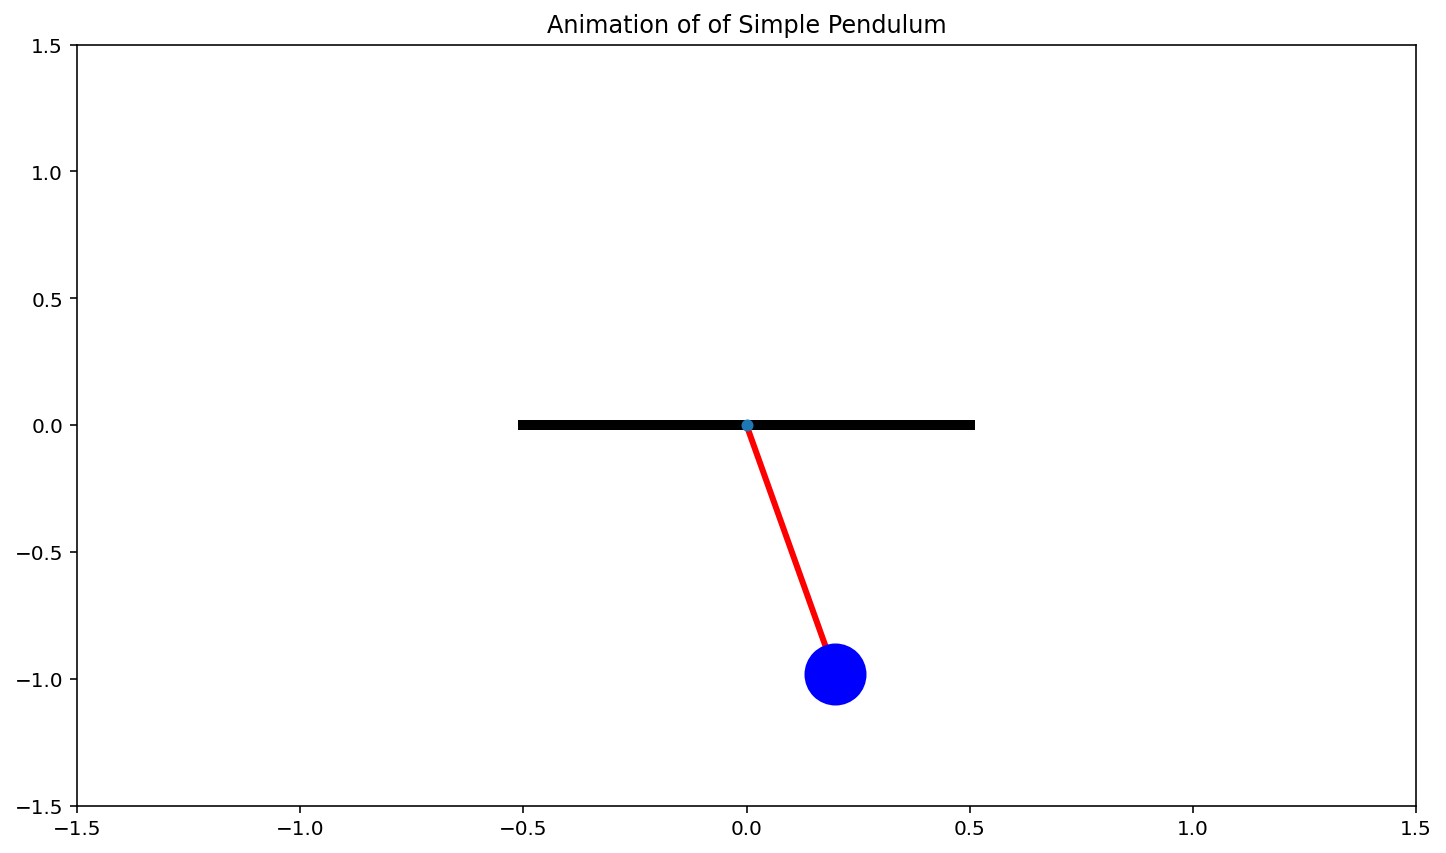

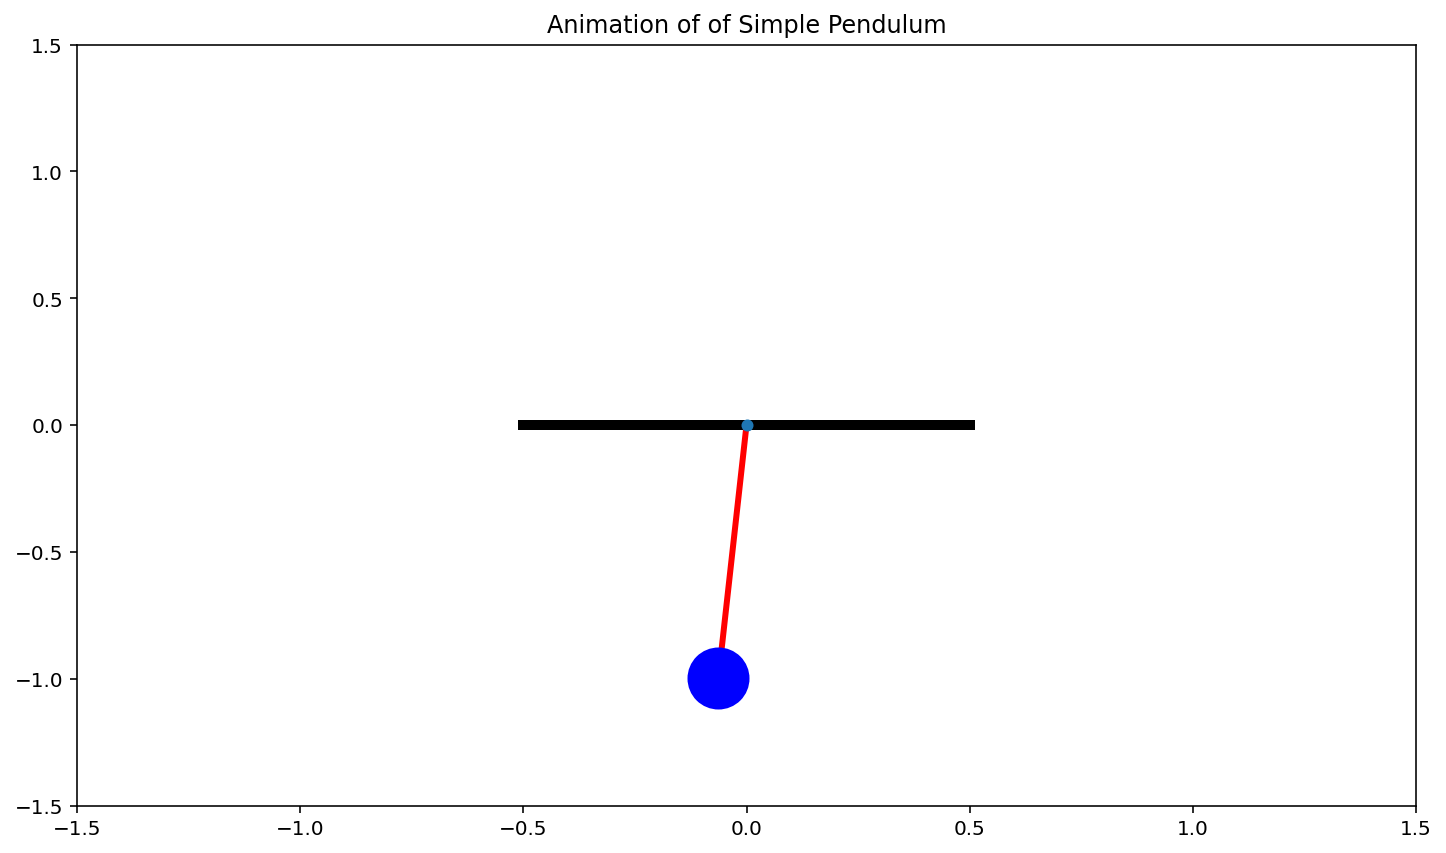

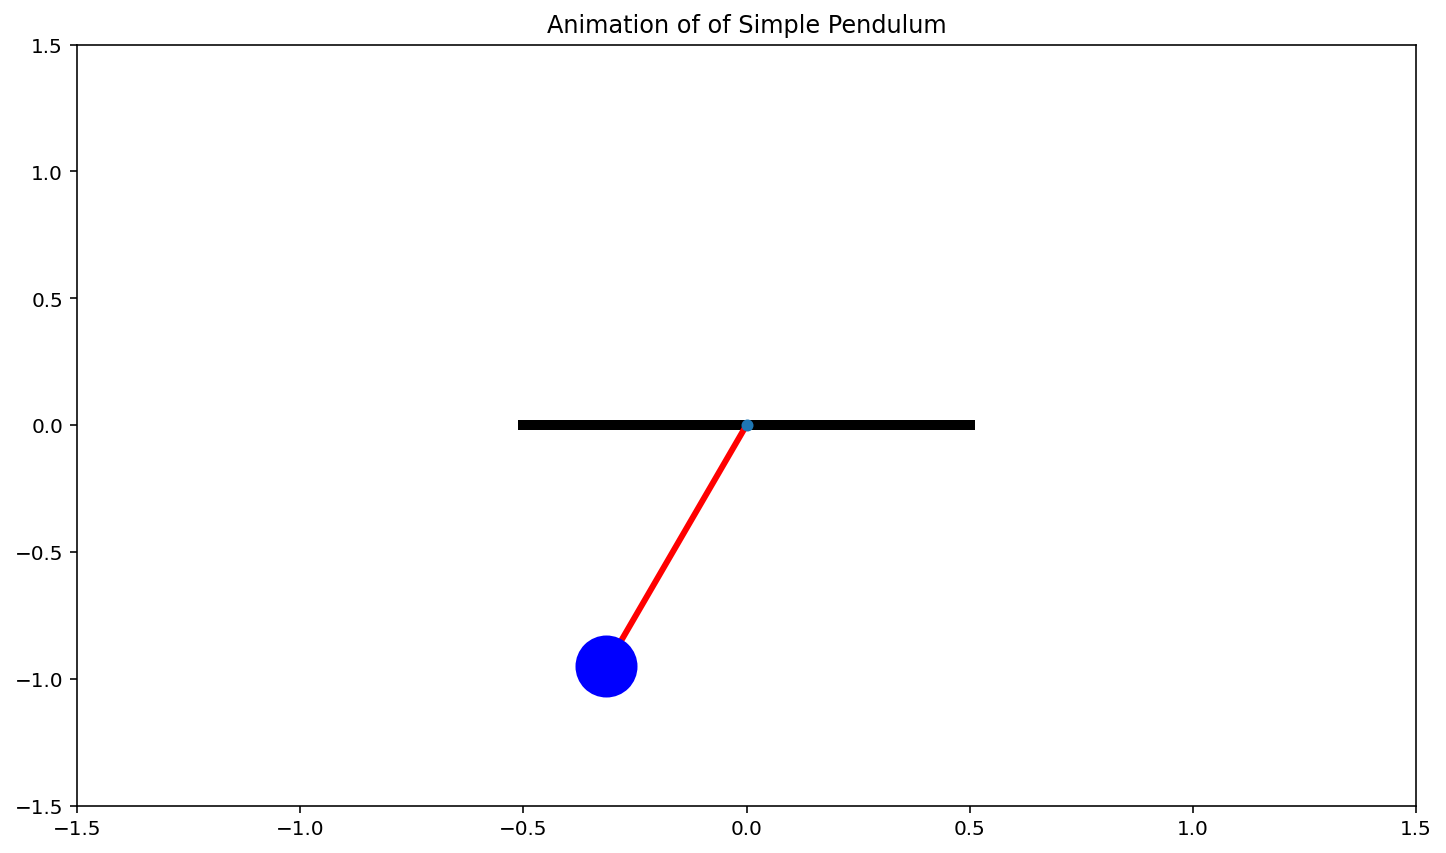

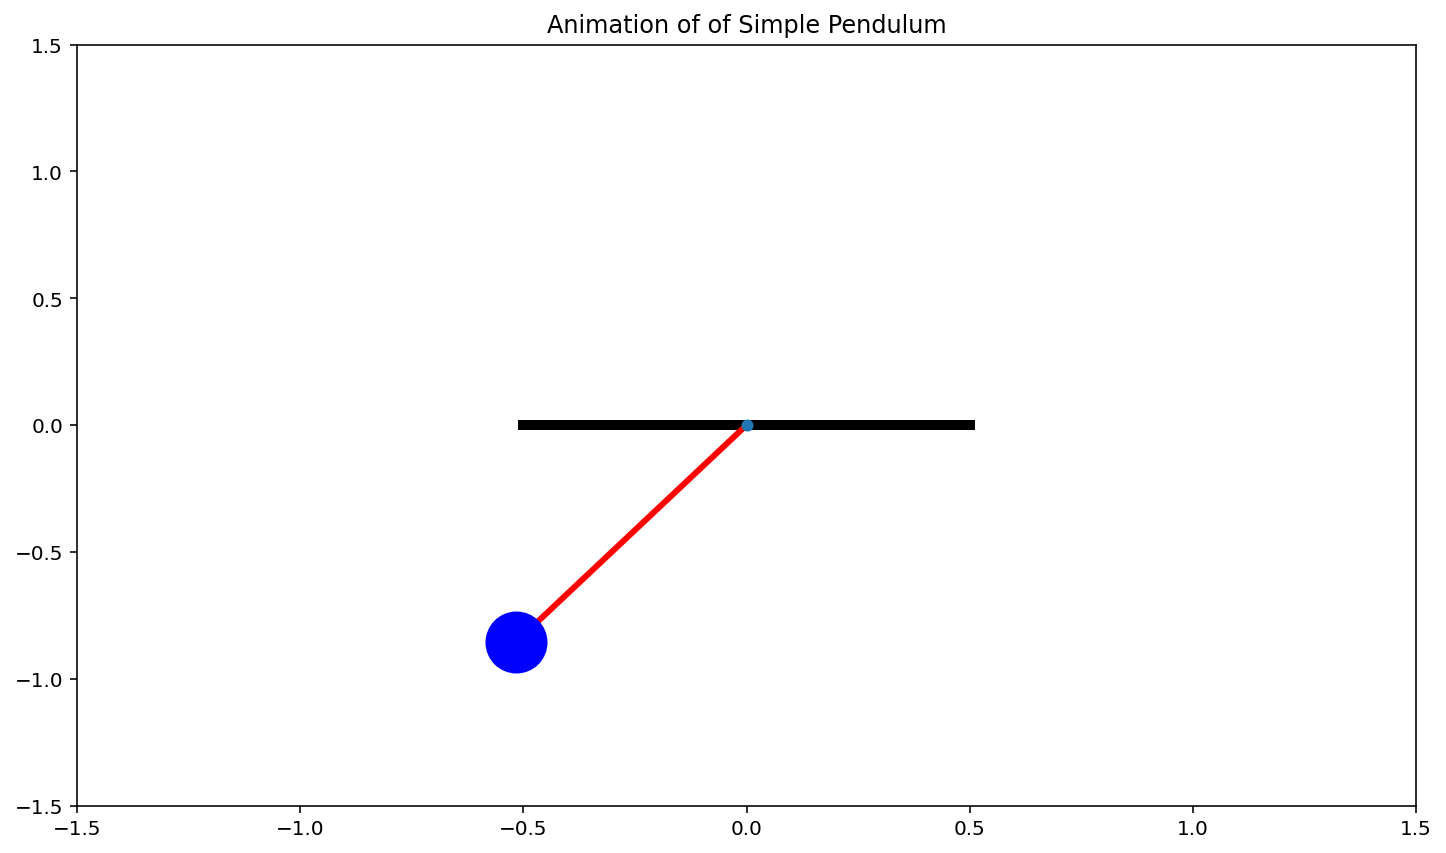

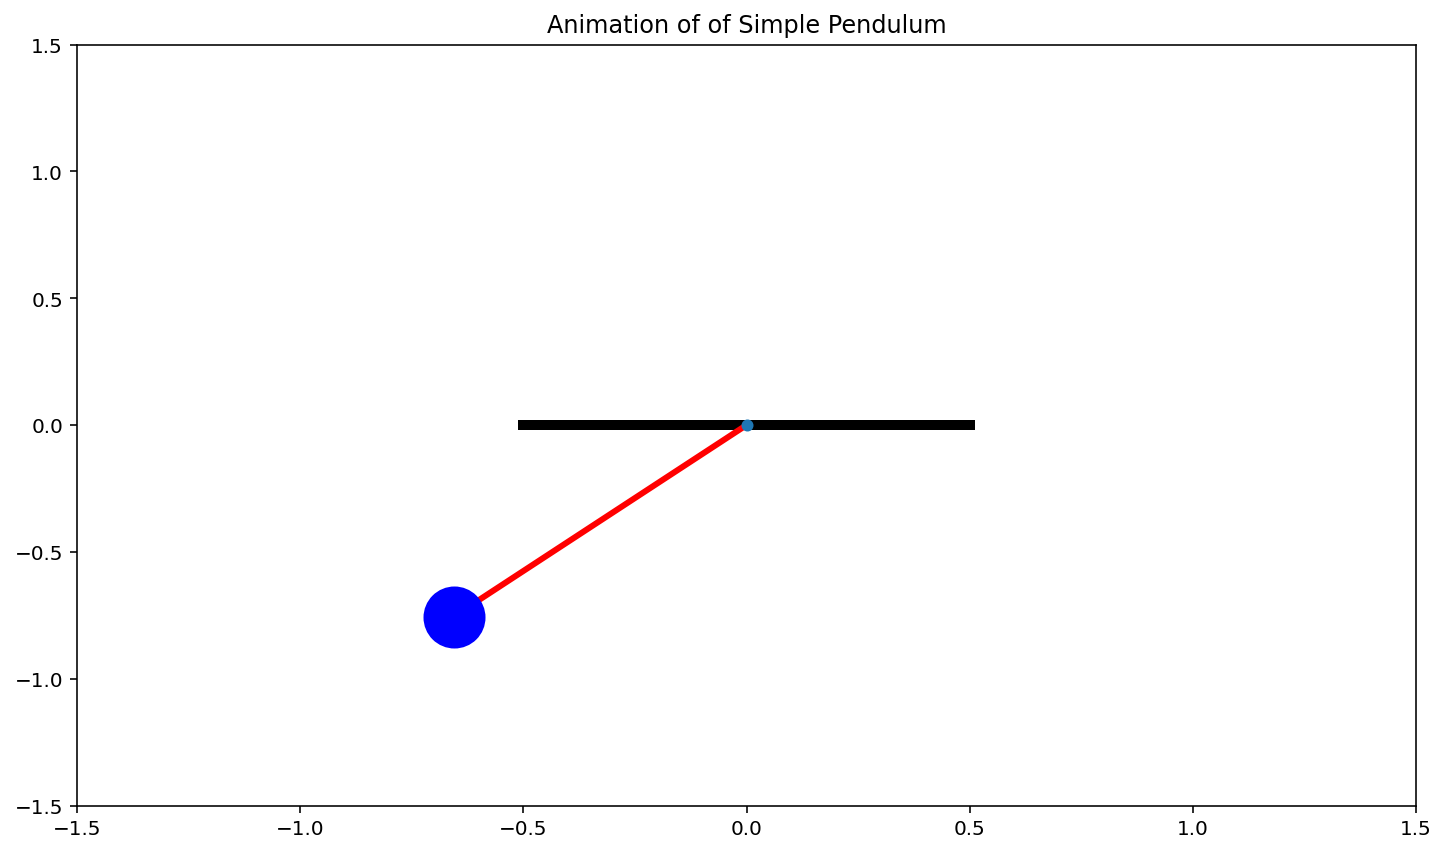

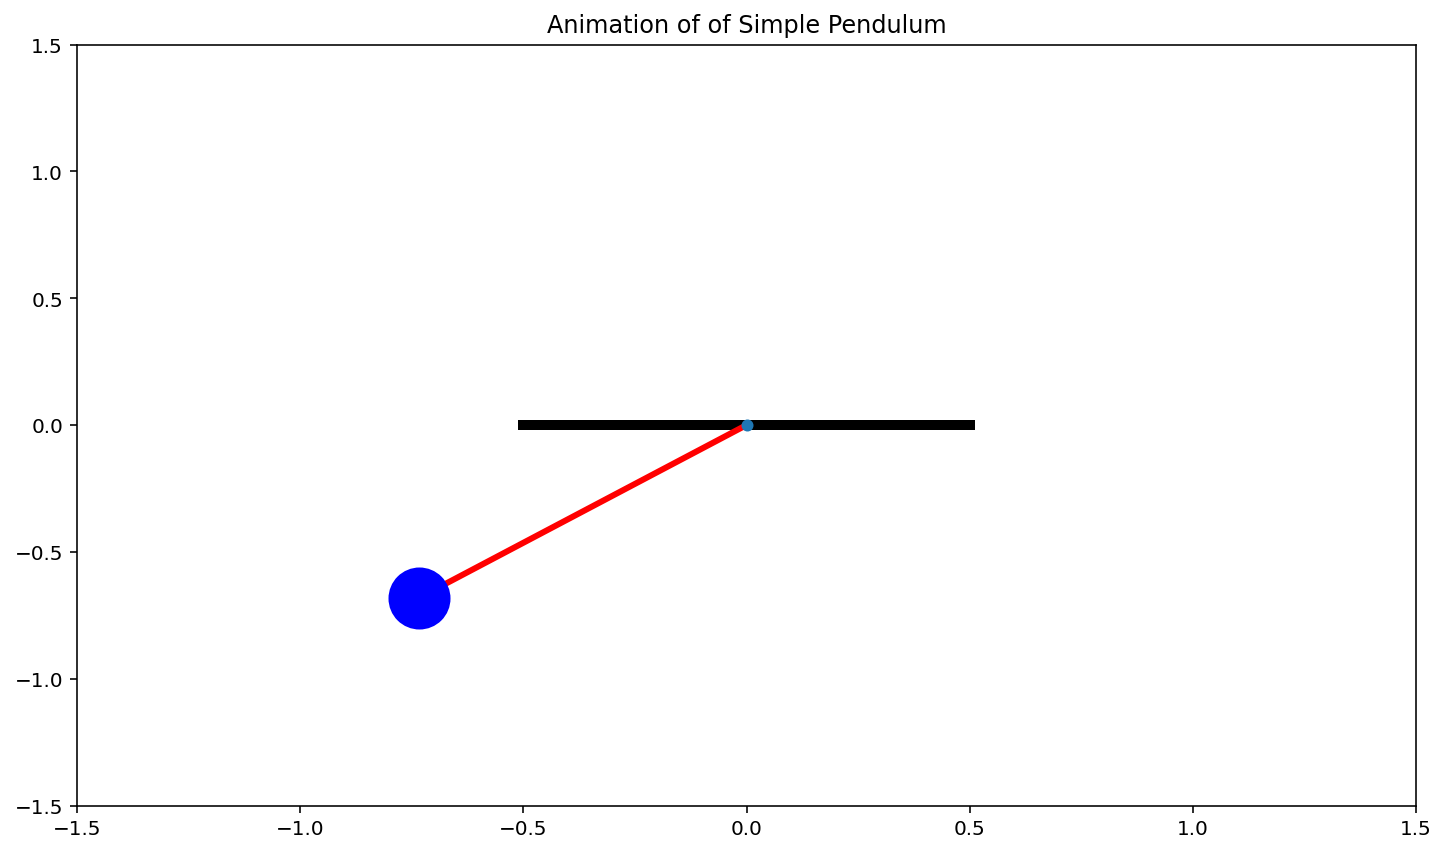

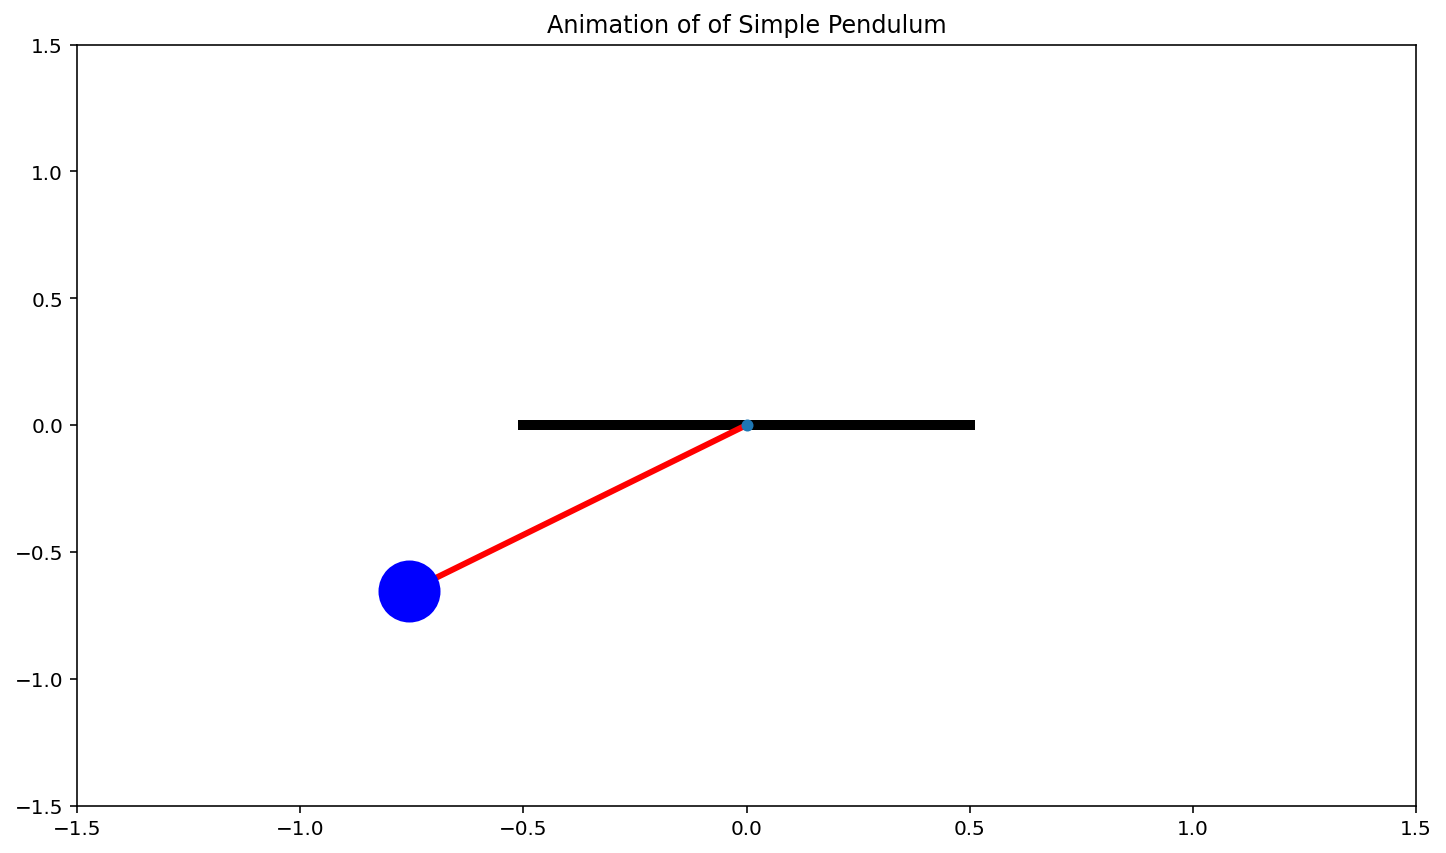

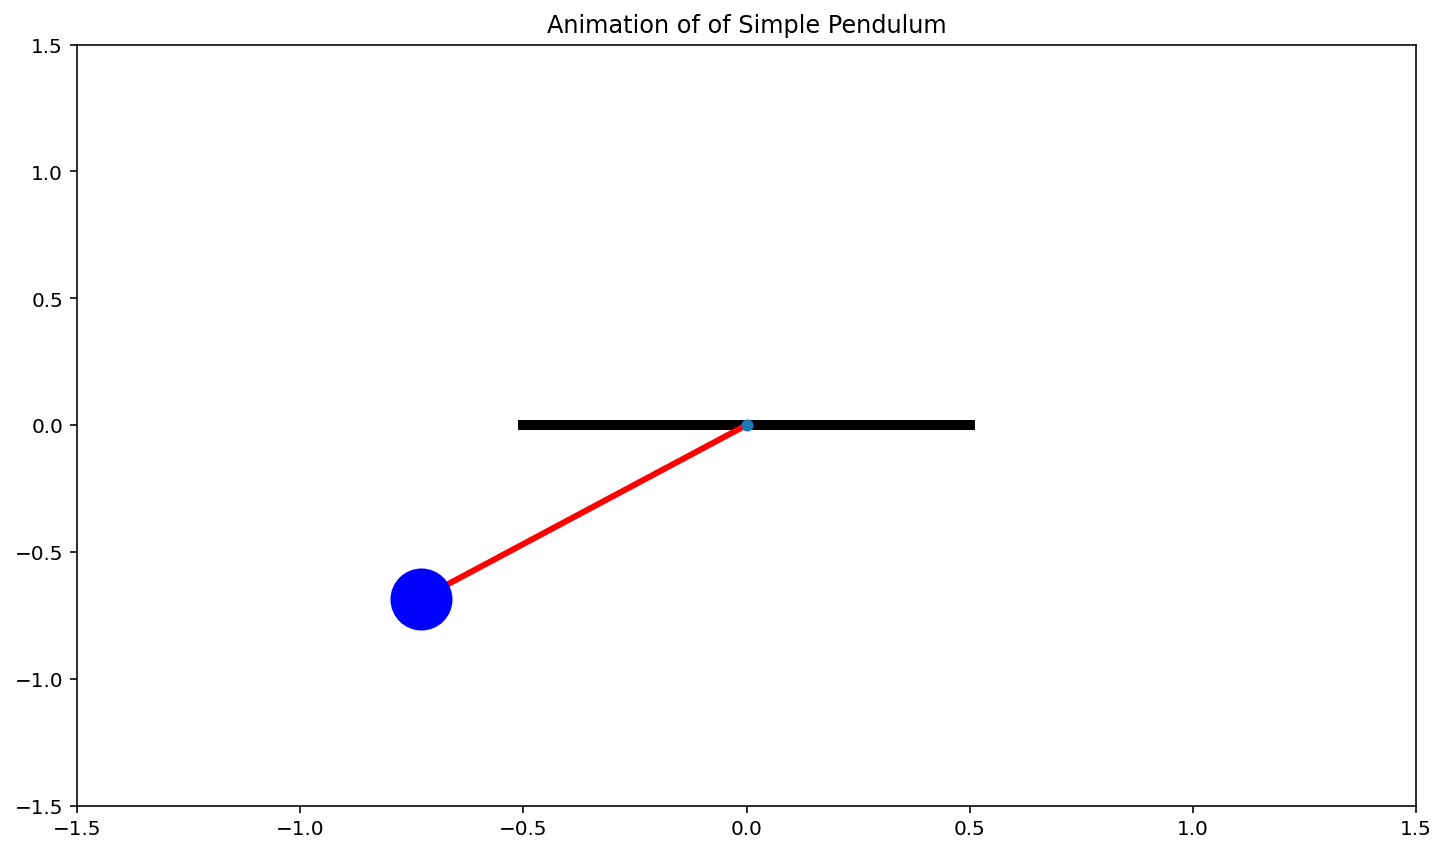

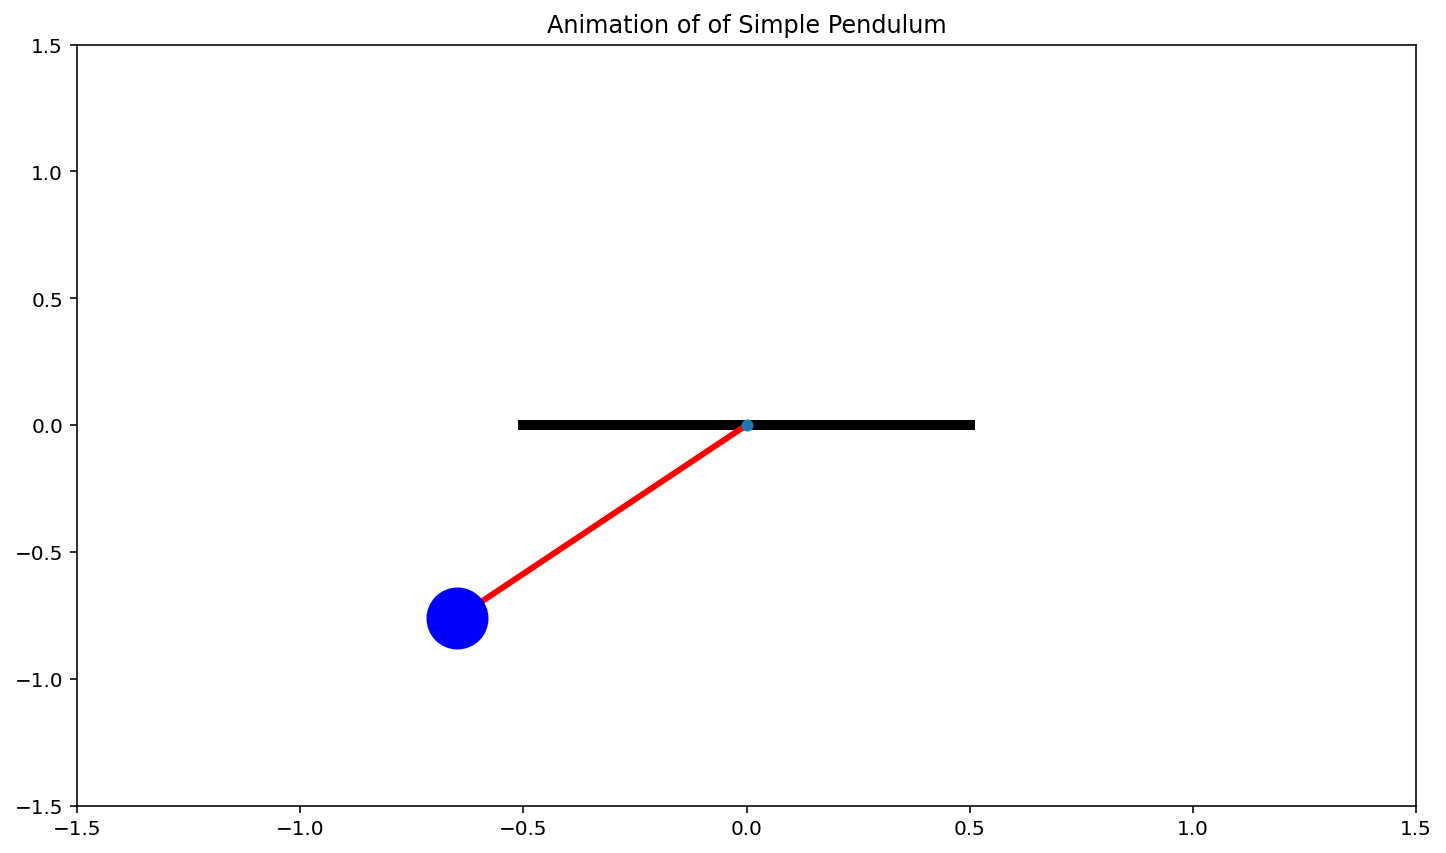

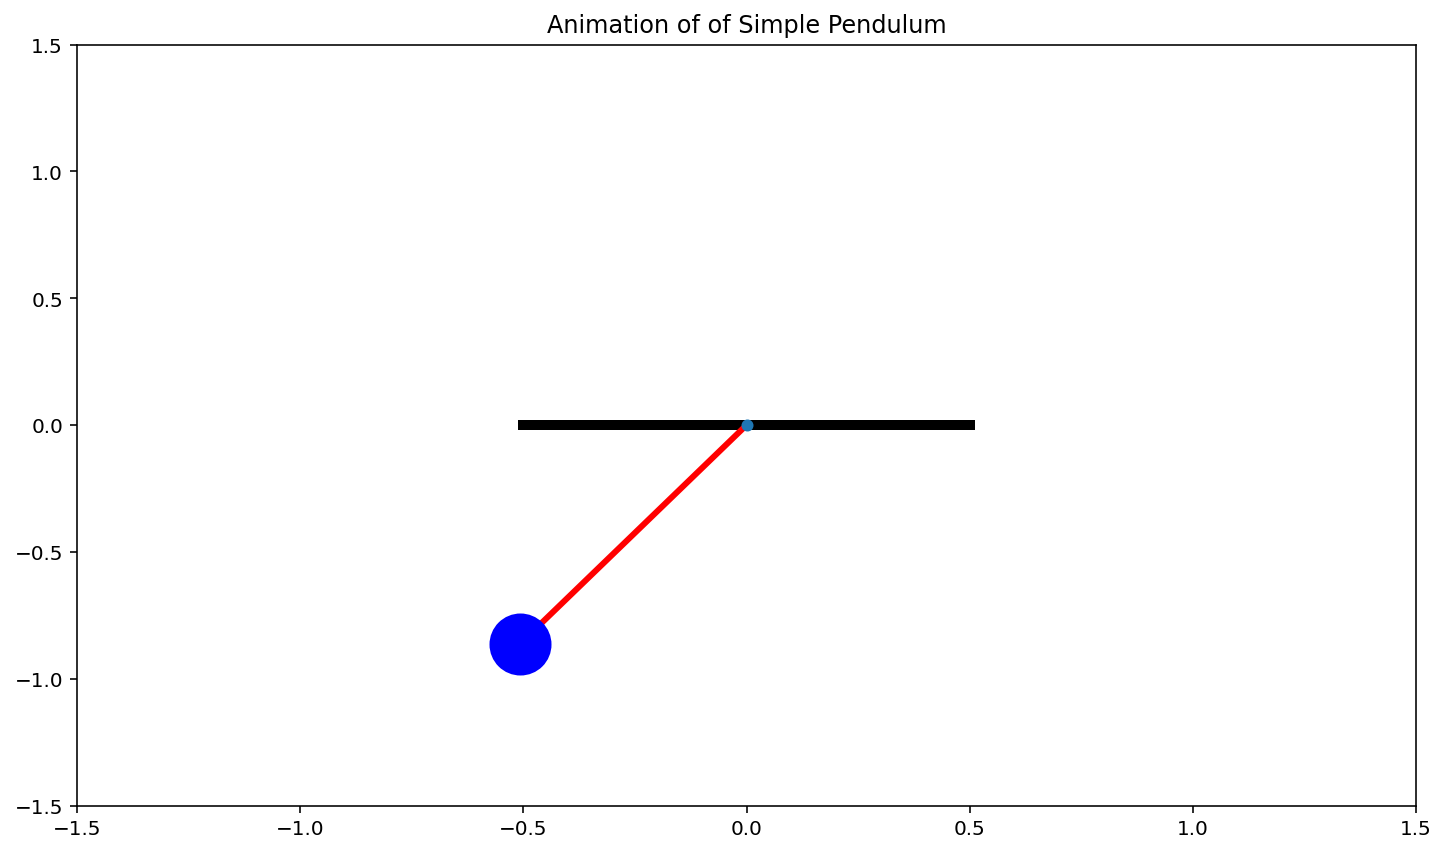

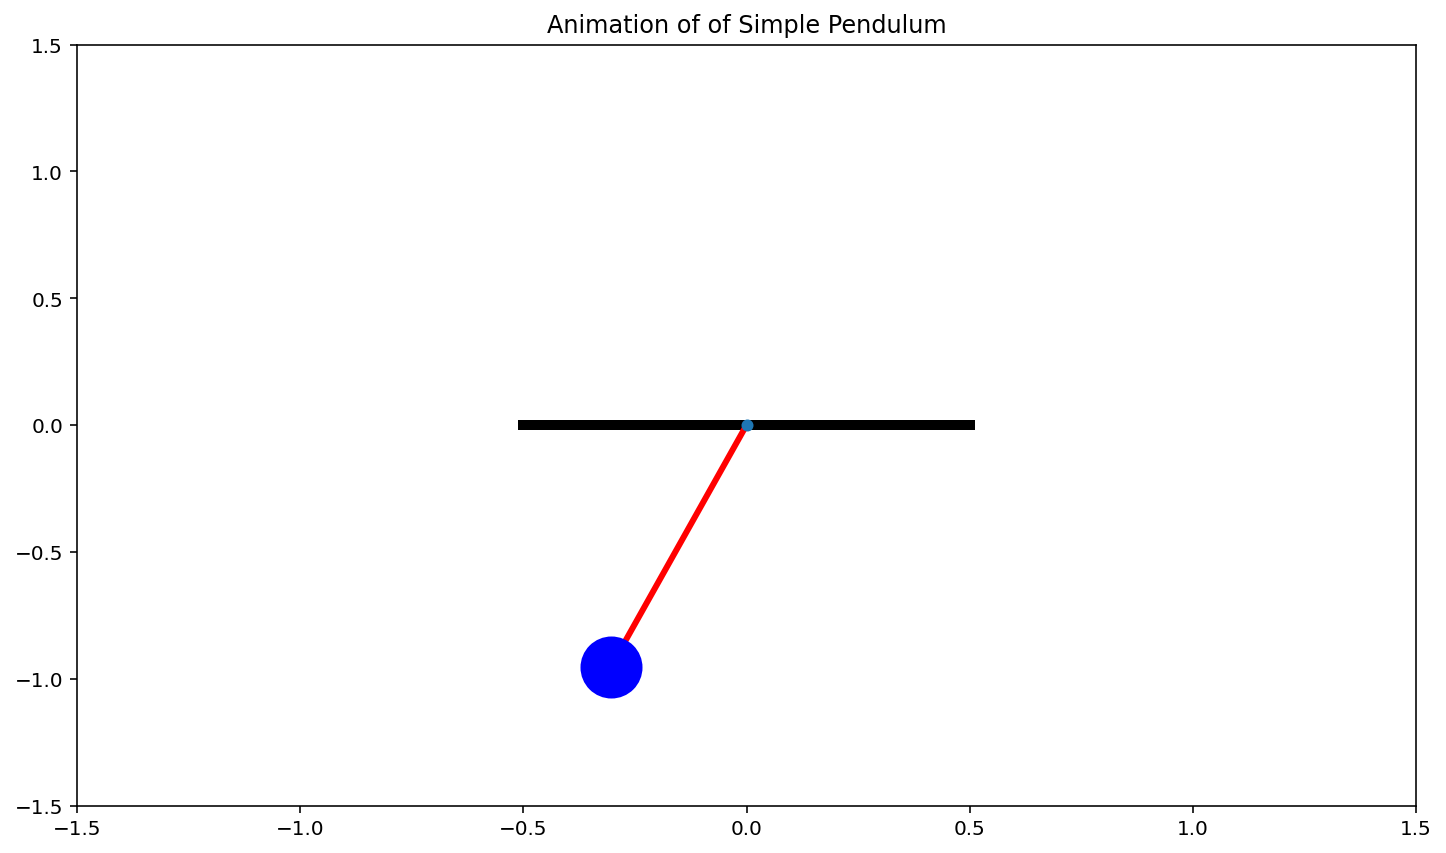

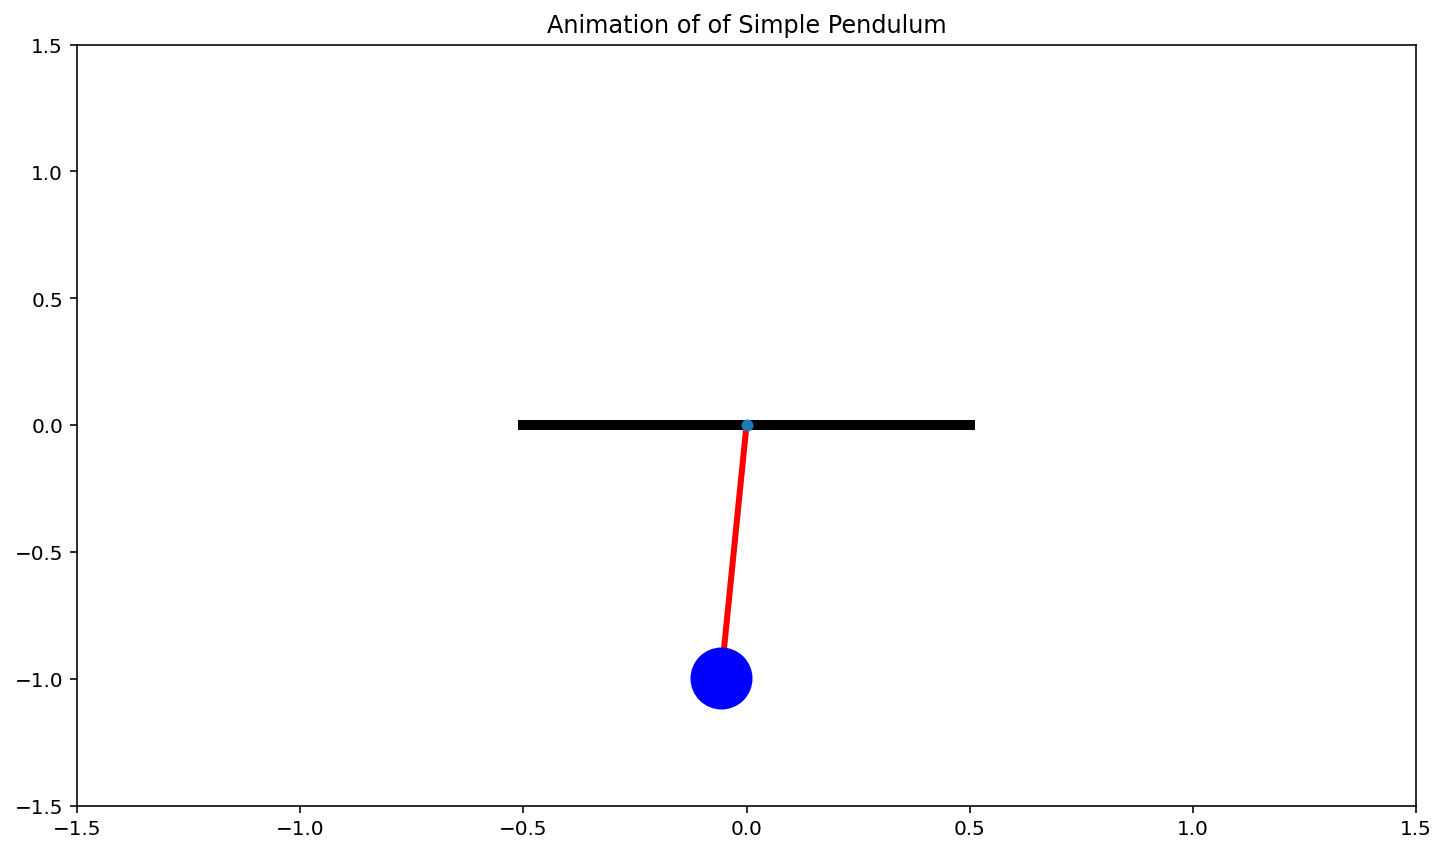

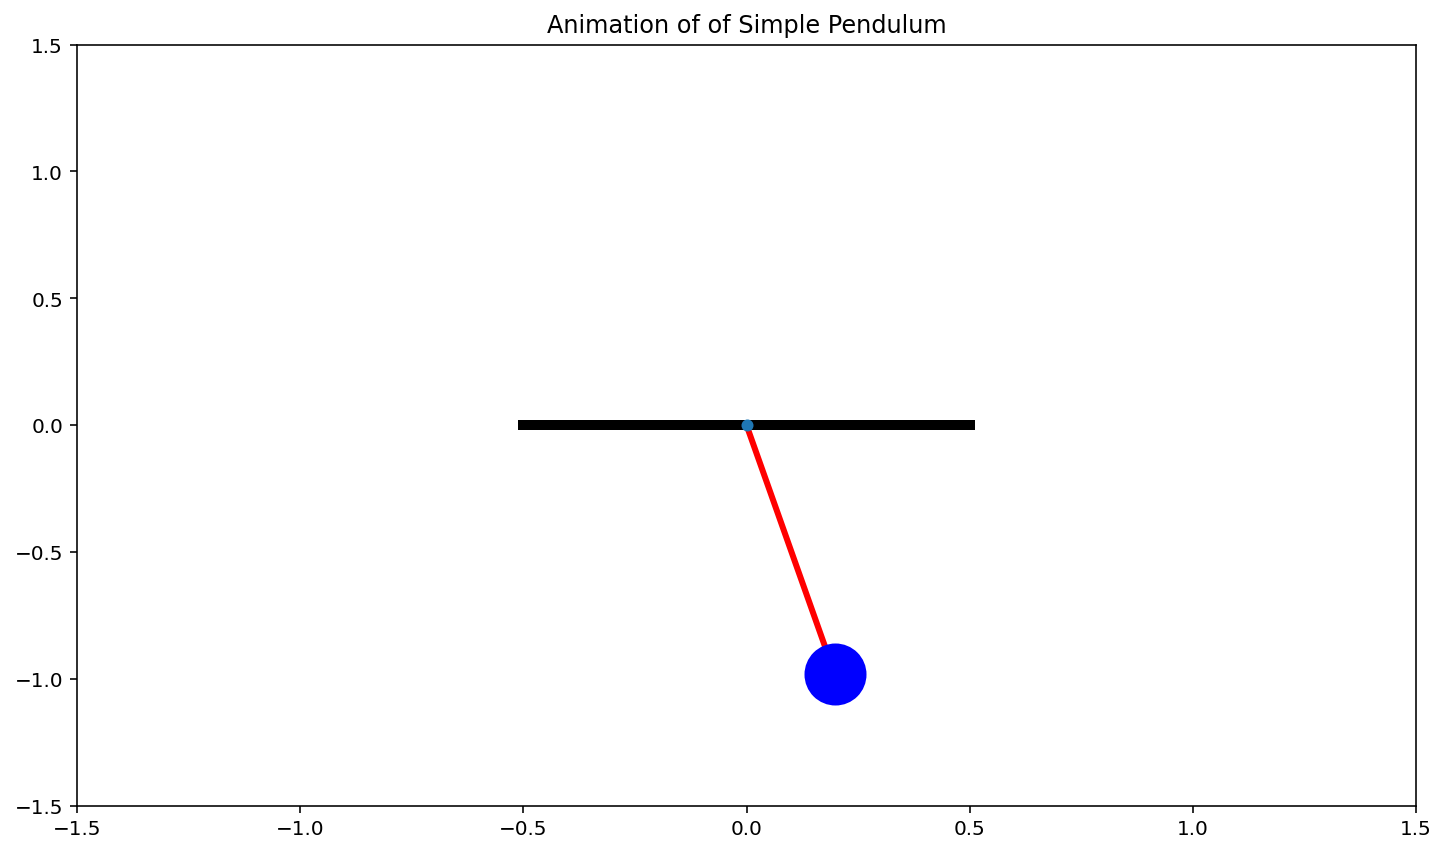

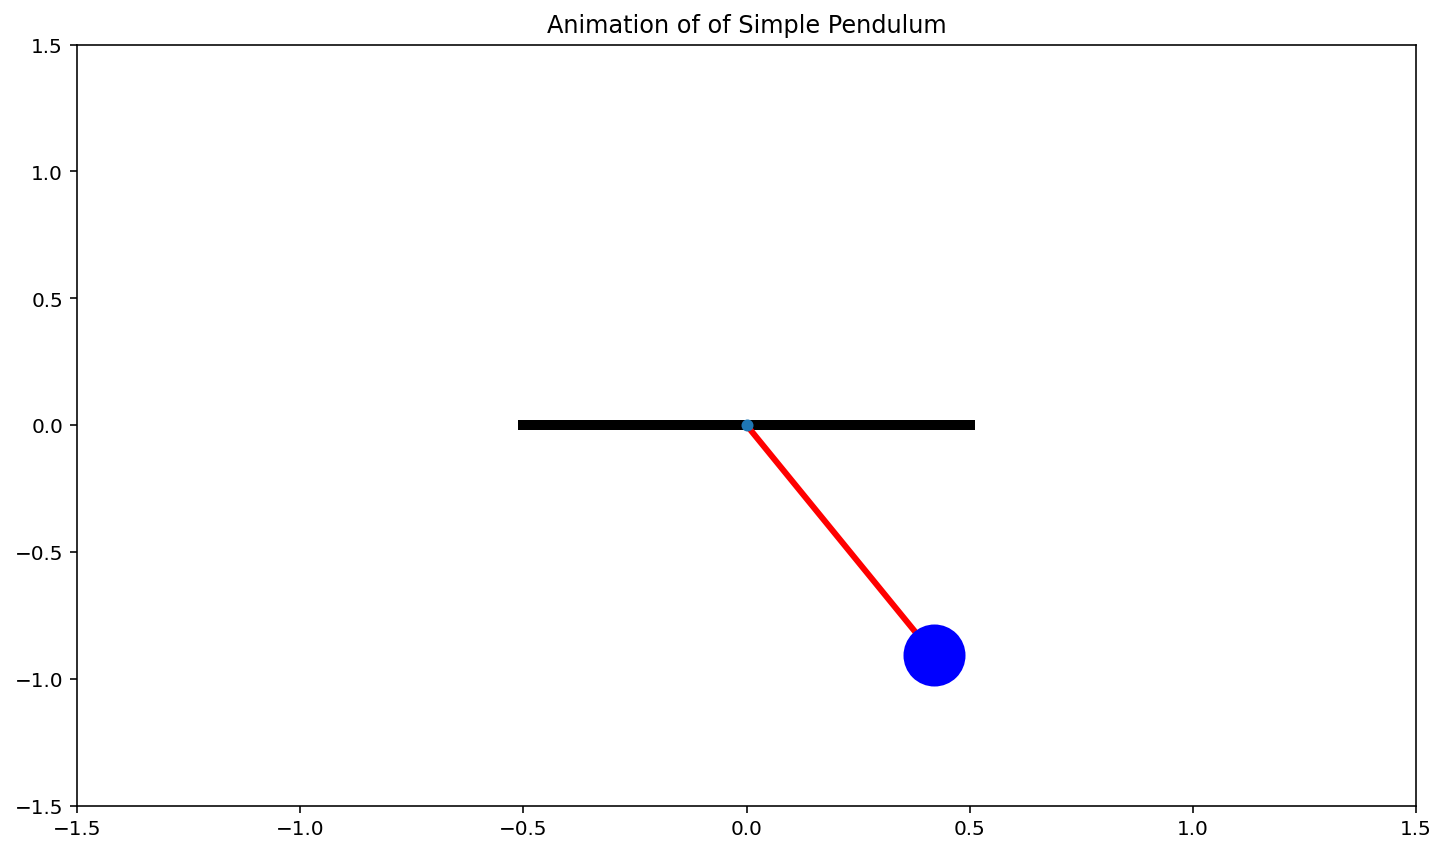

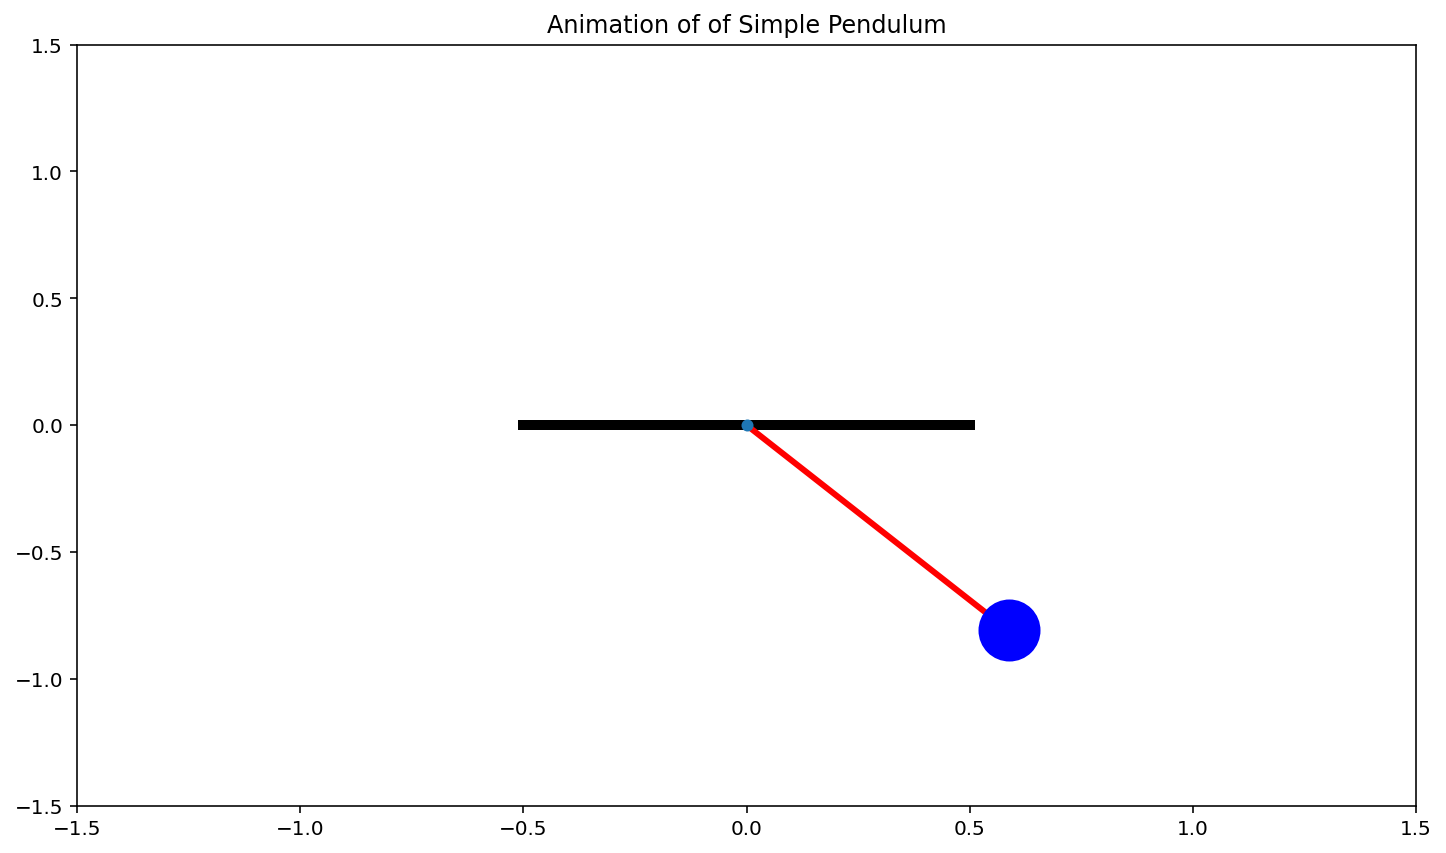

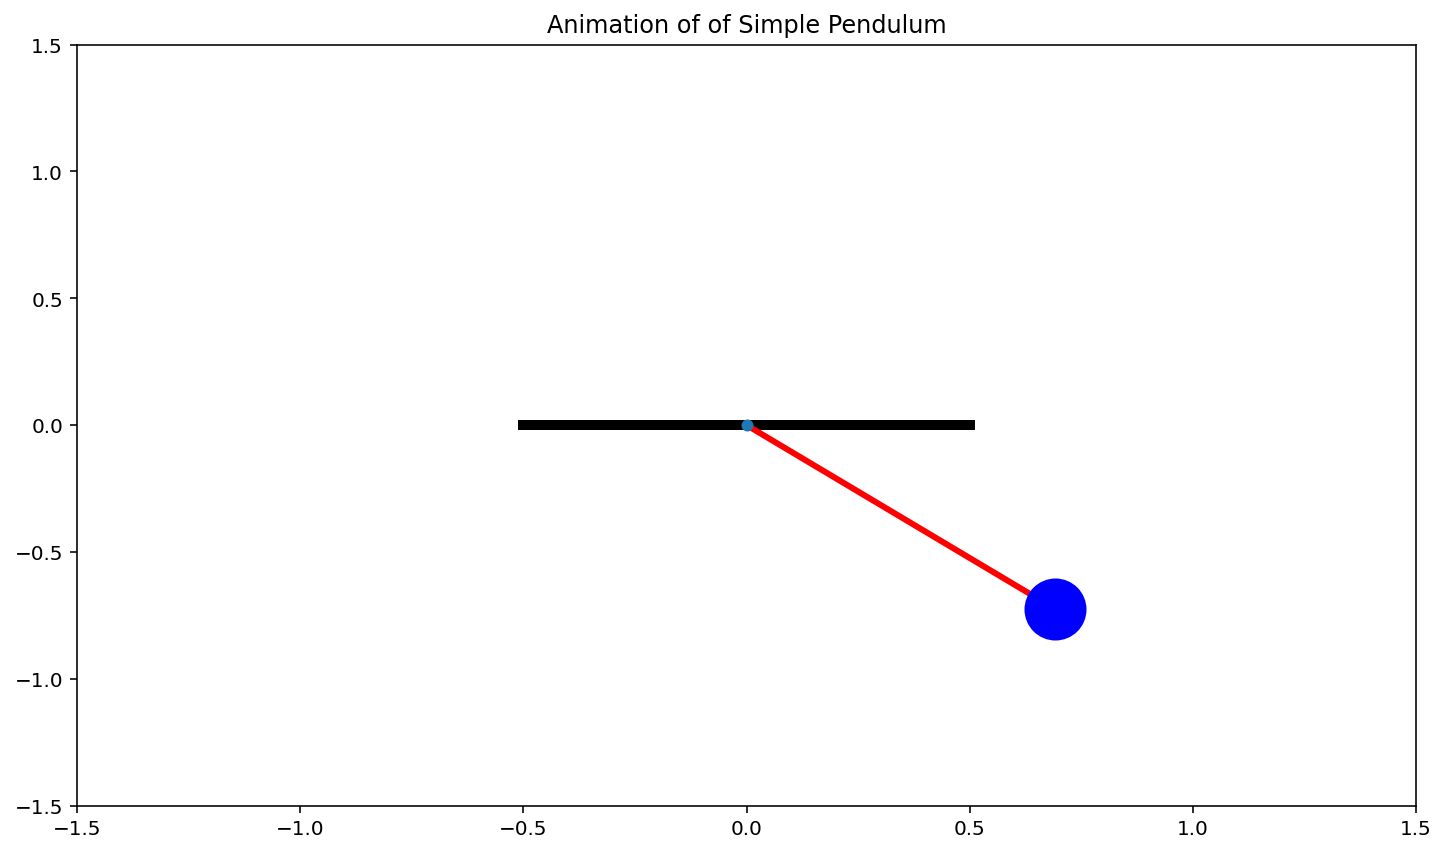

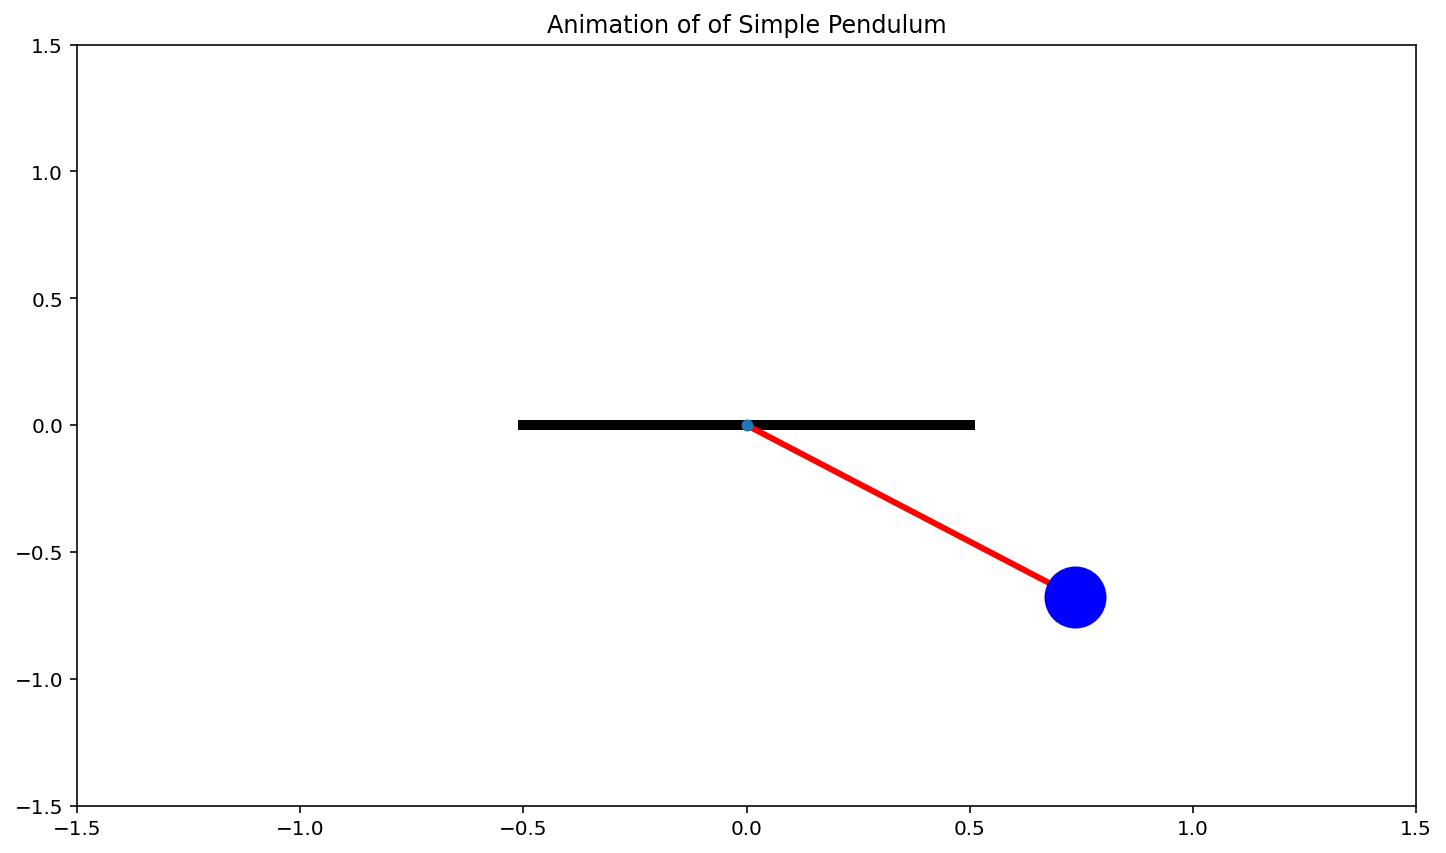

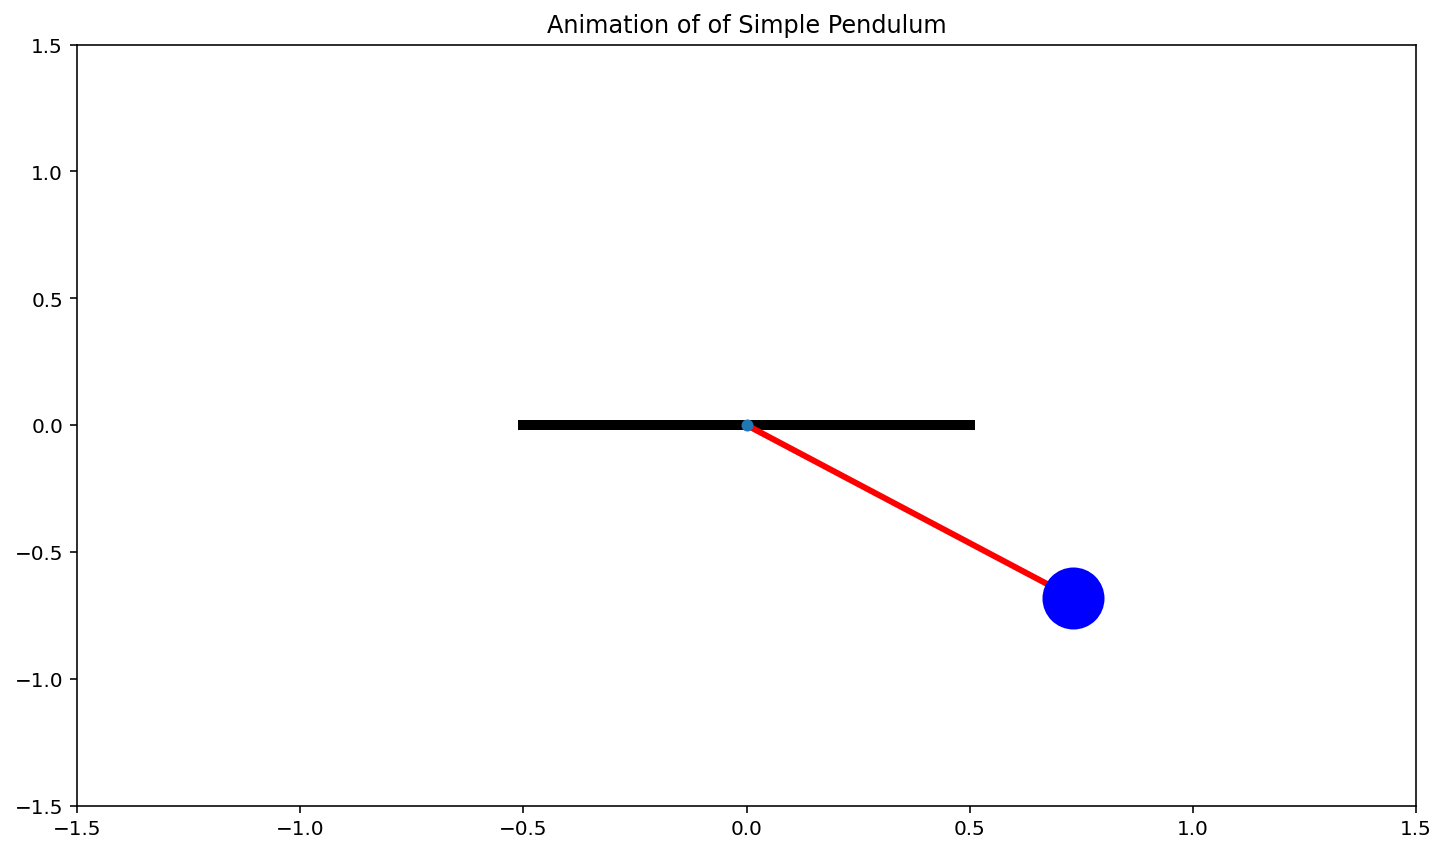

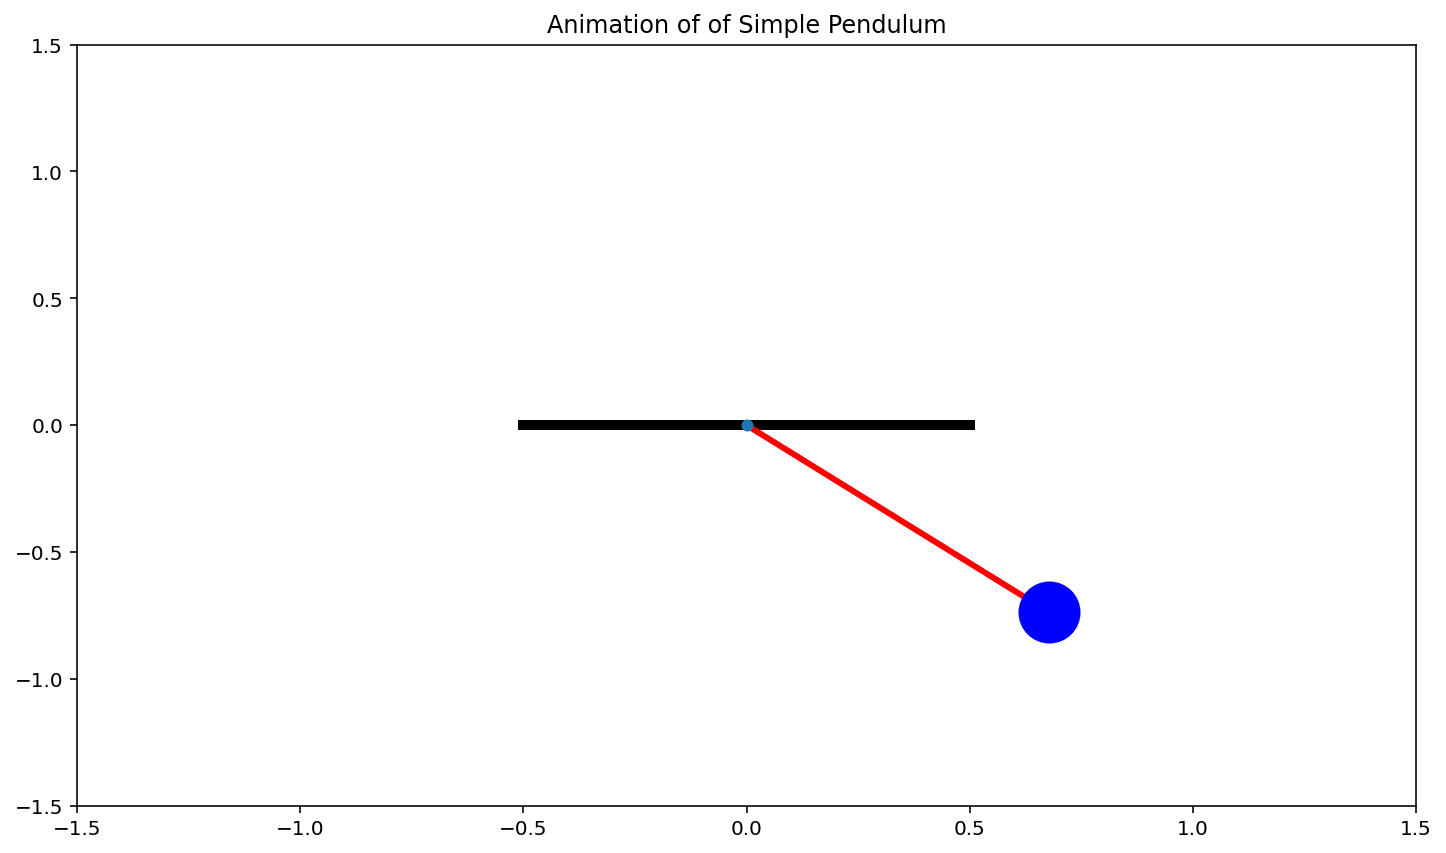

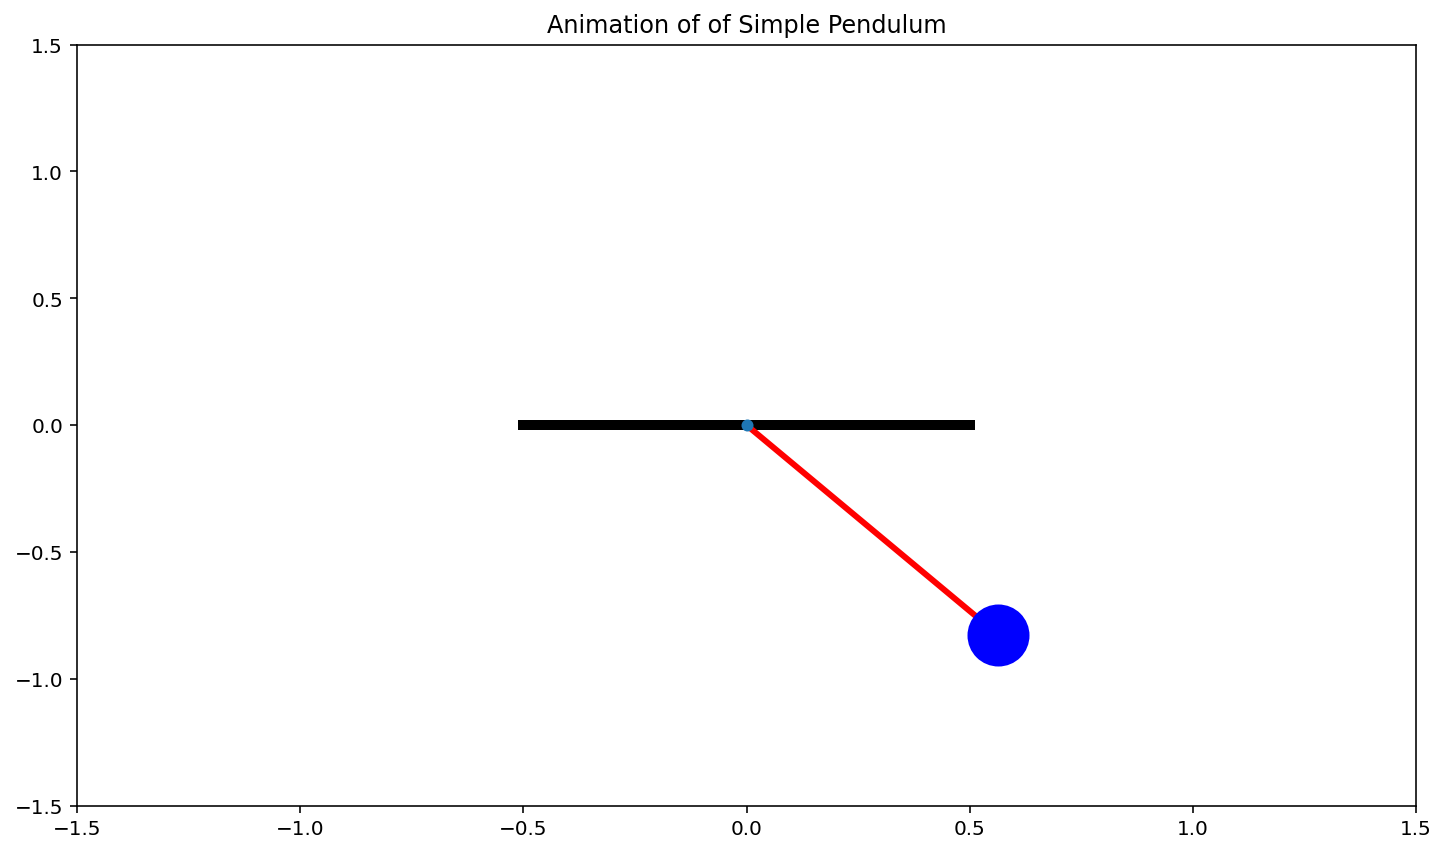

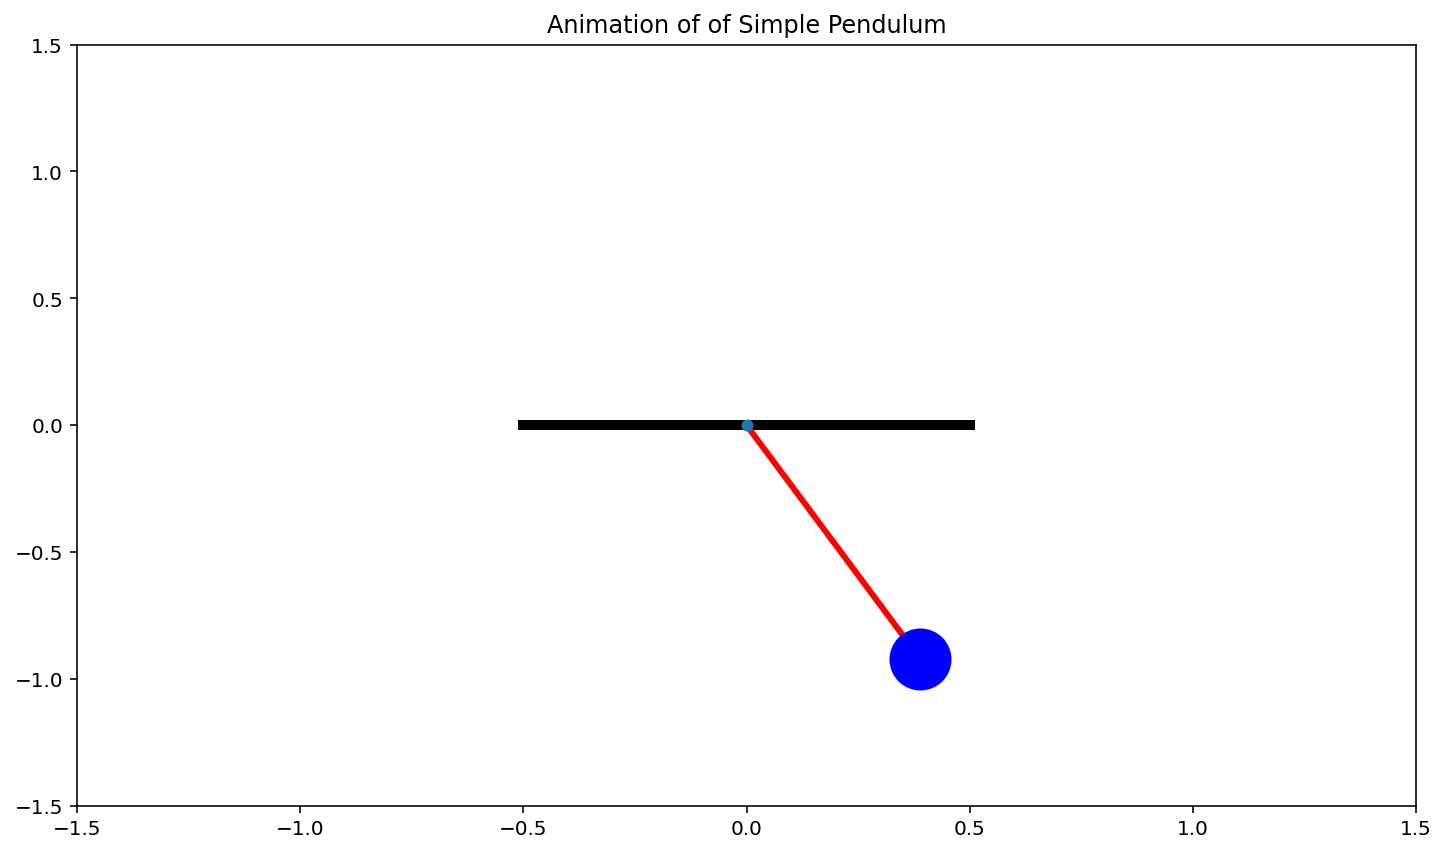

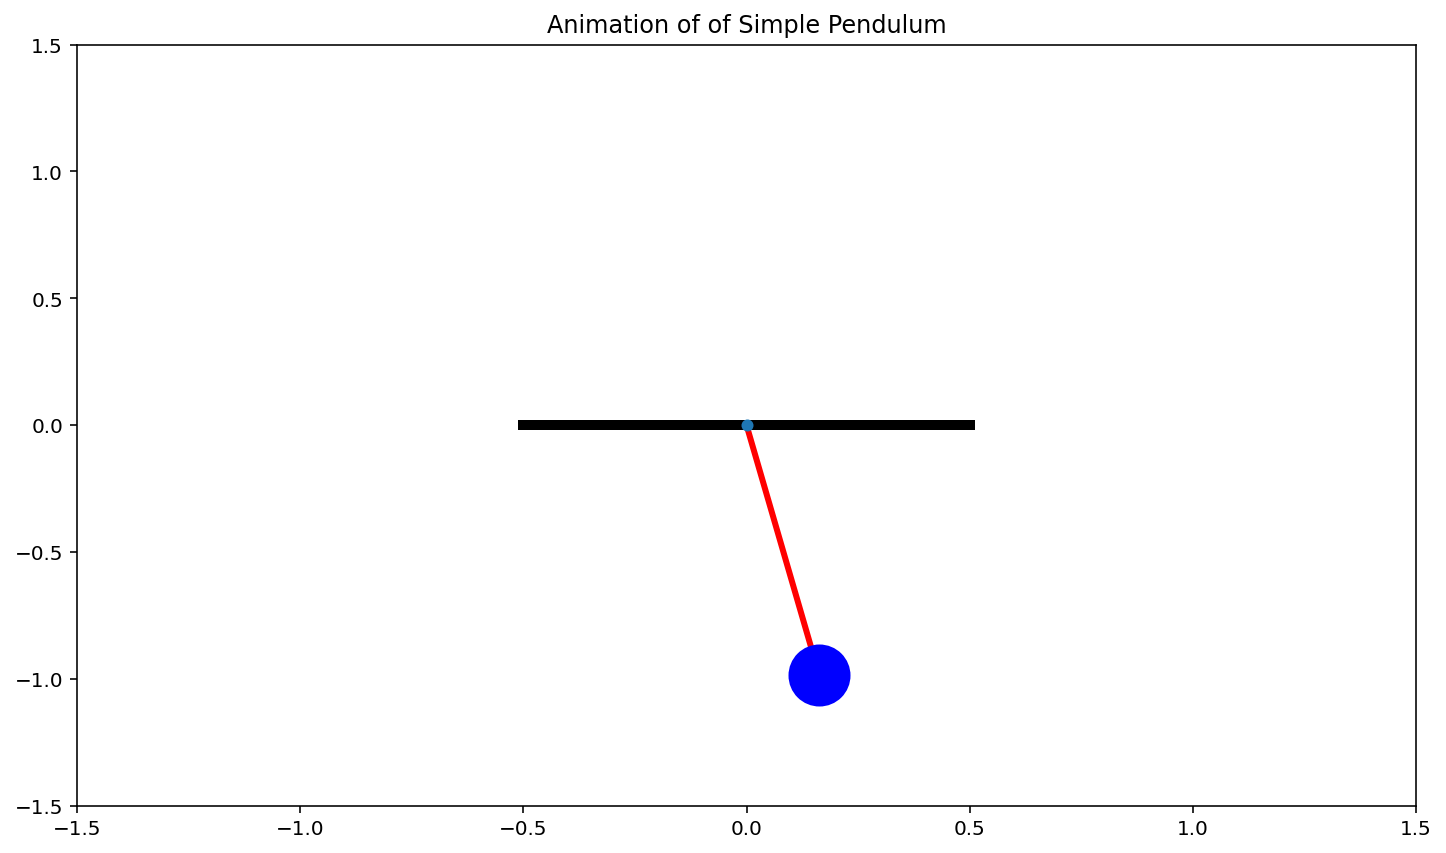

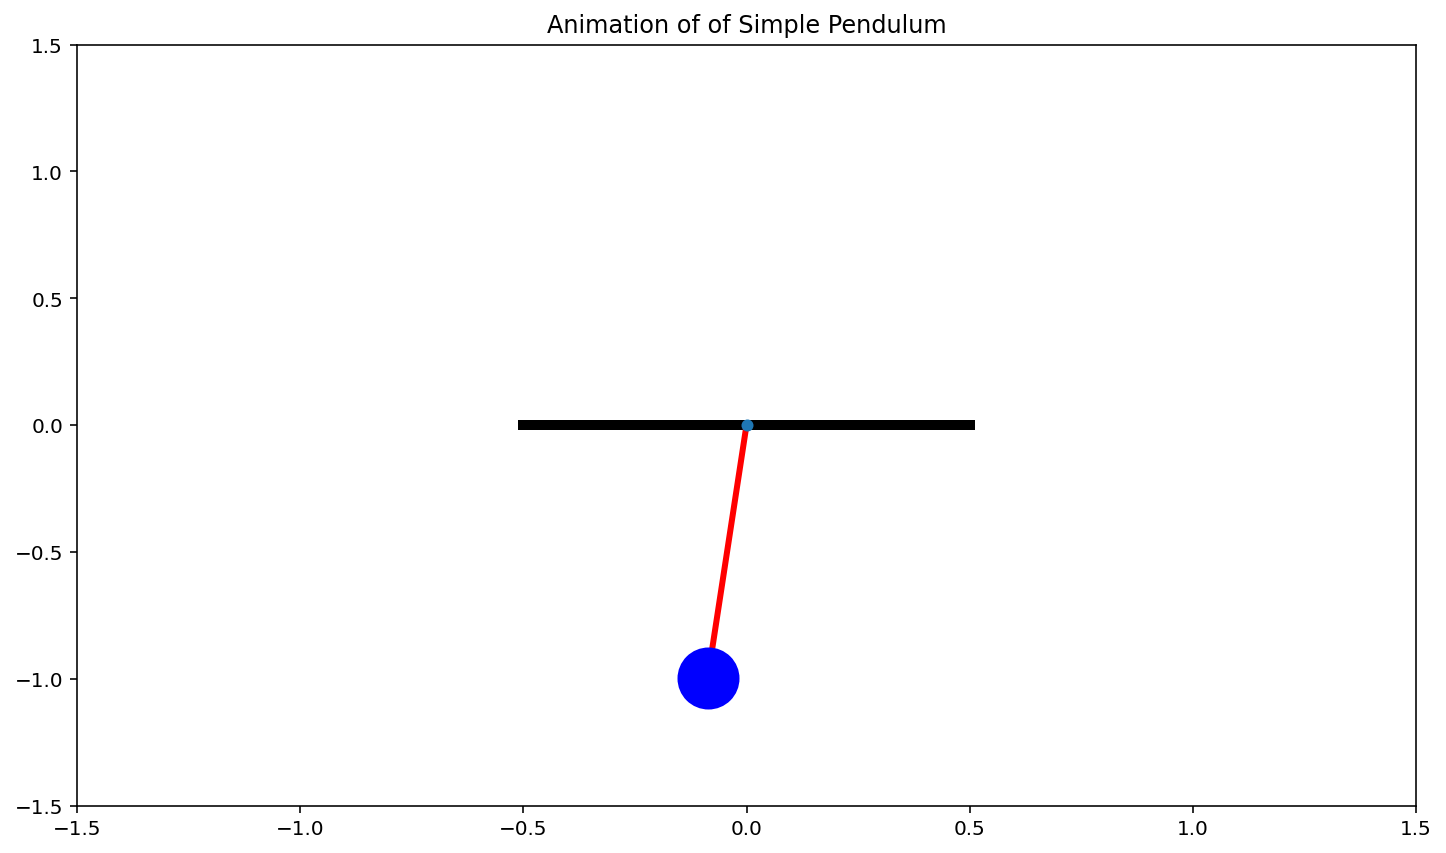

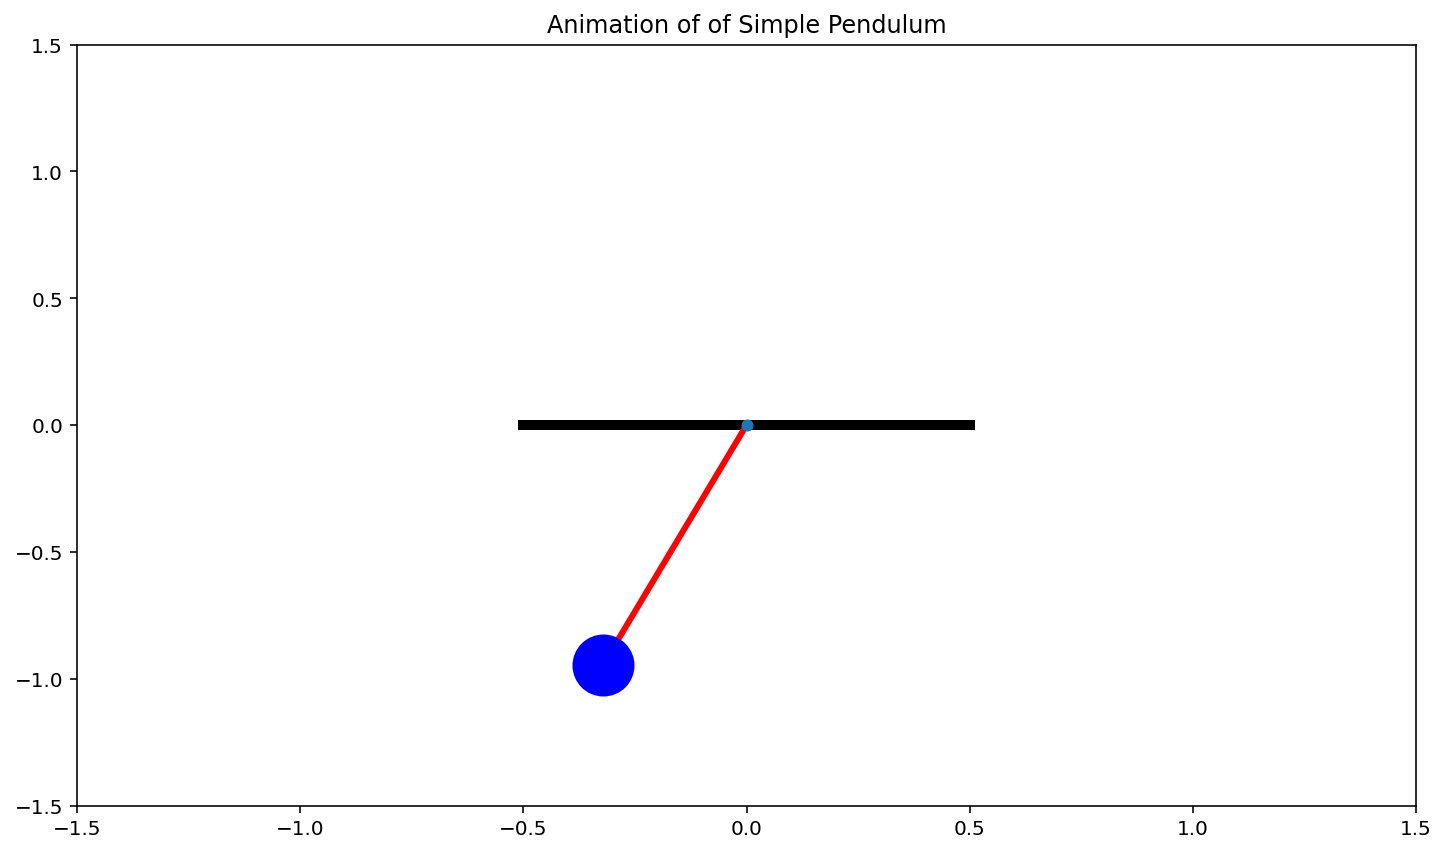

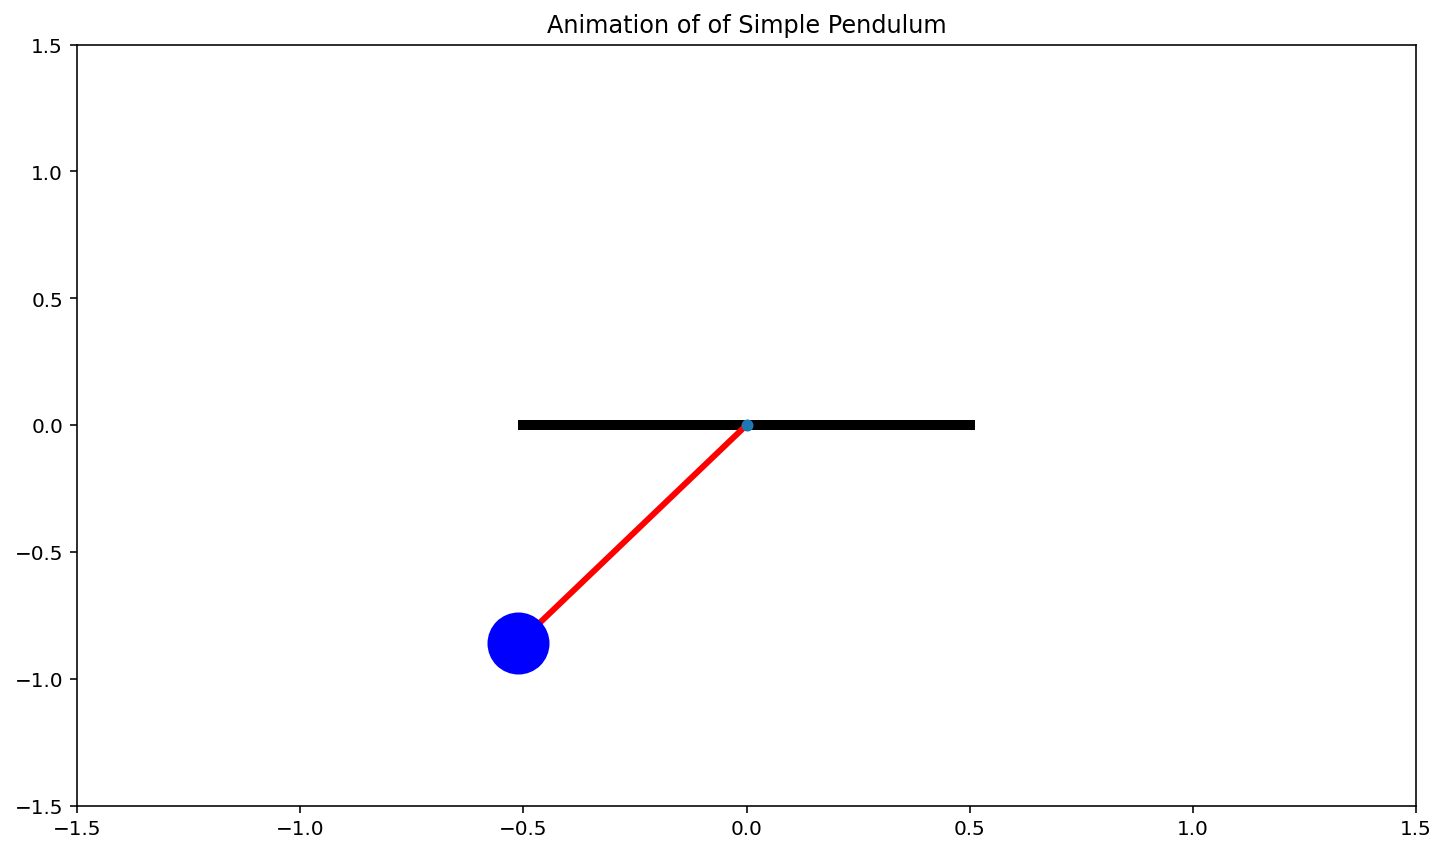

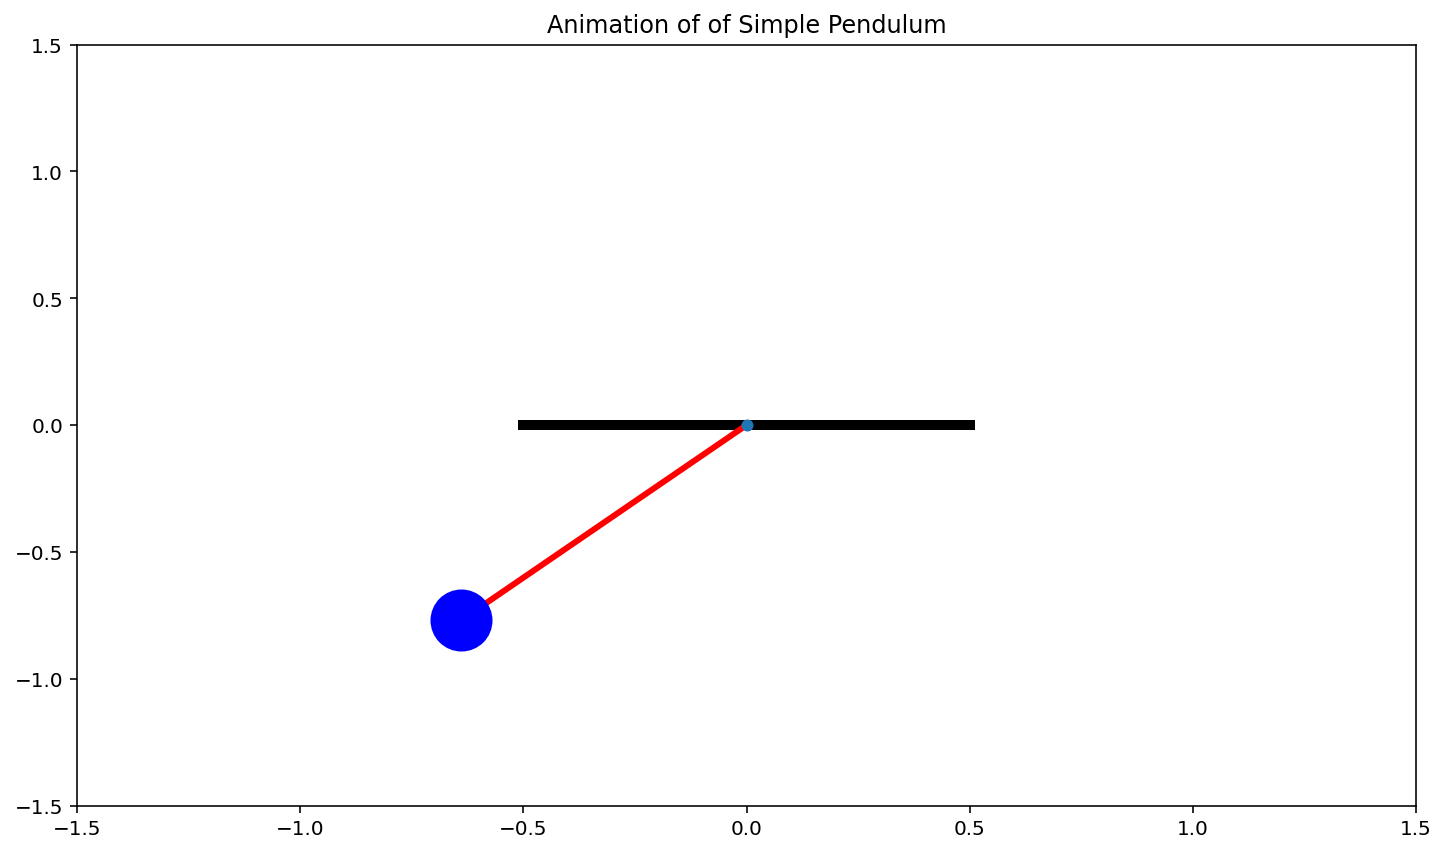

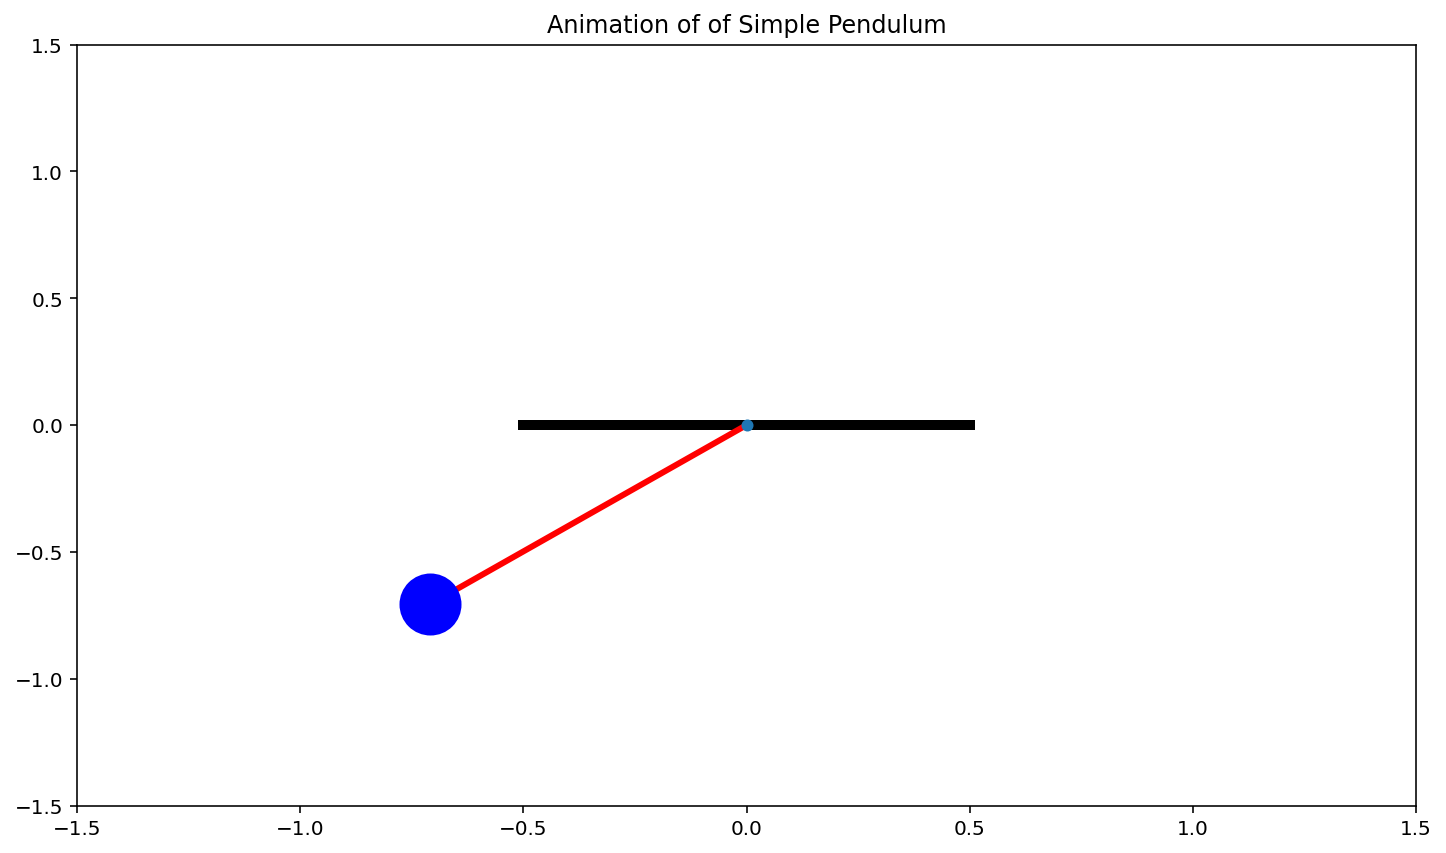

In [1]:
import numpy as np 
from scipy.integrate import odeint
import math 
import matplotlib.pyplot as plt 
"""
damping: effects that reduce the amplitude of the vibrations
"""

def ode_func(theta,t,b,g,l,m):

	theta1=theta[0]
	theta2=theta[1]
	#first ode
	dtheta1_dt=theta2
	#second ode
	dtheta2_dt=-((b/m)*(theta2))-((g/l)*math.sin(theta1));
	dtheta_dt=[dtheta1_dt,dtheta2_dt]
	return dtheta_dt
b=0.05 # damping coeffient(material property that indicate the material to bounce back)
# material with high damping coefficient used as the shock absorbers
g=9.81 # acceleration due to the gravity
l=1 #length of the string
m=1 #mass of the bob

#intial conditions
theta_0=[0,3]
# time plot
t=np.linspace(0,20,200)
#T = len(t)
# solvimg the ode
theta = odeint(ode_func,theta_0,t,args=(b,g,l,m))
plt.figure(1)
plt.plot(t,theta[:,0],'b--',label=r'$\frac{d\theta_1}{dt}=\theta2$')
plt.plot(t,theta[:,1],'r--',label=r'$\frac{d\theta_2}{dt}=-\frac{b}{m}\theta_2-\frac{g}{L}sin\theta_1$')
plt.xlabel('time(s)')
plt.ylabel('plot')
plt.legend(loc='best')
plt.show()
ite = 1
# Create a loop for the animation
for t in theta[:,0]:
	x0=0
	y0=0
	x1=(l*math.sin(t))
	y1 = -(l*math.cos(t))
	filename = str(ite)+'.png'
	ite=ite+1

	#plotting
	plt.figure()
	plt.plot([-0.5,0.5],[0,0],'black',linewidth=5) # plotting the base line of the pendulum
	plt.plot([x0,x1],[y0,y1],linewidth=3,color='r') 
	plt.plot(x0,y0,'o',markersize=5) # highlighting the point
	plt.plot(x1,y1,'o',markersize=30,color='blue') # highlighting the point
	plt.xlim([-1.5,1.5]) #defining the x limit.
	plt.ylim([-1.5,1.5]) # defining the y limit.
	plt.title('Animation of of Simple Pendulum')
	plt.savefig(filename)